# Trabajo práctico 1: Reservas de hotel
**Grupo 10**

*   De Matías Pose, Ignacio
*   Duzac, Juan Martín
*   Pico, Carolina
*   Bigey, Pierre


En esta notebook vamos a trabajar cada una de las etapas del proceso de un problema real de ciencia de datos y resolverlo.
Mediante un conjunto de datos de reservas de hotel provisto por la cátedra, aplicaremos técnicas de análisis exploratorio, preprocesamiento de datos y entrenarémos modelos de clasificación para predecir si una reserva será o no cancelada.

# Librerias

In [1]:
#Drive para montar los csv
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#Modelo Lineal
from sklearn.linear_model import LinearRegression

#Metricas para evaluar modelos
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.impute import SimpleImputer

#Exploración inicial del dataset

In [3]:
df_hotels_train_original = pd.read_csv("/content/drive/MyDrive/datasets/Tp1OrgDatos/hotels_train.csv")
df_hotels_test_original = pd.read_csv("/content/drive/MyDrive/datasets/Tp1OrgDatos/hotels_test.csv")


In [4]:
df_hotels_train_copy = df_hotels_train_original.copy()
df_hotels_test_copy = df_hotels_test_original.copy()

In [5]:
df_hotels_train_copy.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'id', 'is_canceled'],
      dtype='object')

## Primera mirada del dataset
Observamos las primeras filas del dataset para tener idea de como está compuesto

In [6]:
df_hotels_train_copy.head()

hotel  lead_time  arrival_date_year arrival_date_month  \
0    City Hotel         49               2016          September   
1  Resort Hotel          4               2015            October   
2    City Hotel         25               2016            October   
3    City Hotel         26               2016           December   
4    City Hotel        104               2017              March   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        37                          5   
1                        44                         31   
2                        42                         13   
3                        51                         12   
4                        12                         19   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        1                     2       1       0.0  ...   
1                        0                     1       2       0.0  ...   
2                        0                     1       2       2.0  ...   
3                        2                     5       2       0.0  ...   
4                        2                     5       2       0.0  ...   

   agent company days_in_waiting_list    customer_type    adr  \
0    9.0     NaN                    0        Transient  115.5   
1    NaN     NaN                    0        Transient   42.0   
2    9.0     NaN                    0        Transient  229.0   
3  154.0     NaN                    0        Transient   75.0   
4   20.0     NaN                    0  Transient-Party   75.0   

   required_car_parking_spaces  total_of_special_requests  \
0                            0                          1   
1                            1                          0   
2                            0                          2   
3                            0                          0   
4                            0                          1   

   reservation_status_date                                    id is_canceled  
0               2016-08-25  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689           1  
1               2015-11-01  b1428f80-c56c-4ae4-91a9-6962edae08b1           0  
2               2016-10-14  2226c018-ea20-4c4e-8f71-ea66aee70d7c           0  
3               2016-11-29  314f56dc-2e4d-4298-9bdd-27bb008bffff           1  
4               2017-03-26  28c75445-c603-413a-babf-ad377018b592           0  

[5 rows x 32 columns]

In [7]:
df_hotels_train_copy.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'id', 'is_canceled'],
      dtype='object')

Se extrae informacion sobre la copia del dataset con el objetivo de conocer los datos y sus tipos.

In [8]:
df_hotels_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

Verificamos si hay filas repetidas

In [9]:
df_hotels_train_original[df_hotels_train_original.duplicated(keep=False)]

Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status_date, id, is_canceled]
Index: []

[0 rows x 32 columns]

### Valores nulos

In [10]:
df_hotels_train_copy.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


Acá ya podemos observar sin entrar en específico a cada variable, la cantidad de nulos por columna. Luego analizaremos esto con mayor profundidad.

## Variables cualitativas

|Columna|Tipo de Variable|Descripción|
|----------|--------------|---------------|
|Agent|Categórica|ID de la agencia de viaje que hizo la reserva|
|ArrivalDateMonth|Categórica|Mes de la fecha de llegada con 12 categorías: “January” a “December”|
|AssignedRoomType|Categórica|Código para el tipo de habitación reservada|
|Company|Categórica|ID de la compañía o entidad que hizo o es responsable del pago de la reserva or responsible|
|Country|Categórica|País de origen. Las categorías son representadas en el formato ISO 3155–3:2013|
|CustomerType|Categórica|Tipo de reserva|
|DepositType|Categórica|Indicación de si un cliente hizo un depósito para garantizar la reserva|
|DistributionChannel|Categórica|Canal de distribución de la reserva|
|Hotel|Categórica|Nombre del hotel|
|IsCanceled|Categórica binaria|Valor que indica si una reserva se canceló o no|
|ID|Categórica|Número de identificación único en la reserva|
|IsRepeatedGuest|Categórica binaria|Valor que indica si un cliente es repetido|
|MarketSegment|Categórica|Designación de segmento de mercado|
|Meal|Categórica|Tipo de comida reservada|
|ReservedRoomType|Categórica|Código del tipo de habitación reservada|


### Analizamos la cantidad de apariciones de cada una de las variables

Generamos un DataFrame para la manipulación de los datos:

In [11]:
variables_cualitativas = pd.DataFrame(data = df_hotels_train_copy, columns = ["agent", "arrival_date_month", "assigned_room_type", "company","country","customer_type",
                                                                              "deposit_type","distribution_channel","hotel","is_canceled","id","is_repeated_guest",
                                                                              "market_segment","meal","reserved_room_type"])
variables_cualitativas

agent arrival_date_month assigned_room_type  company country  \
0        9.0          September                  D      NaN     USA   
1        NaN            October                  A      NaN     PRT   
2        9.0            October                  F      NaN     CHE   
3      154.0           December                  A      NaN     PRT   
4       20.0              March                  A      NaN     FRA   
...      ...                ...                ...      ...     ...   
61908  240.0            January                  D      NaN     ESP   
61909    NaN          September                  A      NaN     FRA   
61910    NaN                May                  A    153.0     FRA   
61911   96.0            October                  A      NaN     PRT   
61912    9.0              April                  D      NaN     ISR   

         customer_type deposit_type distribution_channel         hotel  \
0            Transient   No Deposit                TA/TO    City Hotel   
1            Transient   No Deposit               Direct  Resort Hotel   
2            Transient   No Deposit                TA/TO    City Hotel   
3            Transient   Non Refund                TA/TO    City Hotel   
4      Transient-Party   No Deposit                TA/TO    City Hotel   
...                ...          ...                  ...           ...   
61908        Transient   No Deposit                TA/TO  Resort Hotel   
61909        Transient   No Deposit                TA/TO    City Hotel   
61910        Transient   No Deposit            Corporate    City Hotel   
61911        Transient   Non Refund                TA/TO  Resort Hotel   
61912        Transient   No Deposit                TA/TO    City Hotel   

       is_canceled                                    id  is_repeated_guest  \
0                1  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689                  0   
1                0  b1428f80-c56c-4ae4-91a9-6962edae08b1                  0   
2                0  2226c018-ea20-4c4e-8f71-ea66aee70d7c                  0   
3                1  314f56dc-2e4d-4298-9bdd-27bb008bffff                  0   
4                0  28c75445-c603-413a-babf-ad377018b592                  0   
...            ...                                   ...                ...   
61908            1  32bffef5-5404-4e86-9f39-fd2282e1ad7f                  0   
61909            0  cc922a1c-356e-42a5-a984-0b1af03c2f5c                  0   
61910            0  76fb0e83-59df-43ee-9c33-aec51030ed45                  0   
61911            1  01906859-1094-4e37-b13e-b015b594d159                  0   
61912            1  7137e599-4442-41fb-b147-4aba9f344e38                  0   

      market_segment meal reserved_room_type  
0          Online TA   BB                  D  
1             Groups   BB                  A  
2          Online TA   BB                  F  
3             Groups   BB                  A  
4      Offline TA/TO   BB                  A  
...              ...  ...                ...  
61908      Online TA   BB                  A  
61909      Online TA   SC                  A  
61910       Aviation   BB                  A  
61911         Groups   BB                  A  
61912      Online TA   HB                  D  

[61913 rows x 15 columns]

#### **Hotel**

Esta variable indica el tipo de hotel, se divide en:

*   Resort hotel
*   City hotel



In [12]:
variables_cualitativas.hotel.value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable hotel '}, xlabel='Hotel', ylabel='Frecuencia'>

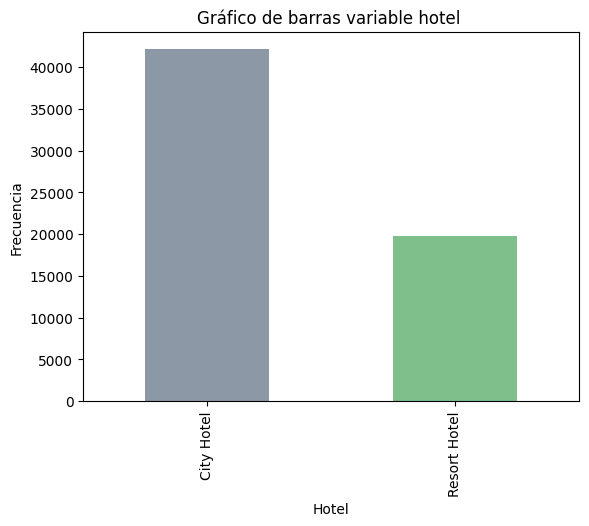

In [13]:
colores=[(0.1, 0.2, 0.3),(0, 0.5, 0.1)]
variables_cualitativas.hotel.value_counts().plot.bar(alpha=0.5 , color=colores, title="Gráfico de barras variable hotel " , xlabel="Hotel" , ylabel="Frecuencia")

<Figure size 200x200 with 0 Axes>

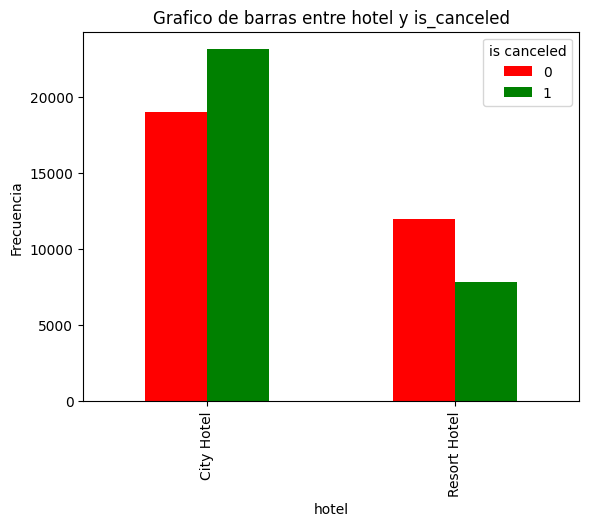

In [14]:

table = pd.crosstab(df_hotels_train_copy['hotel'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(2, 2))

ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre hotel y is_canceled')
plt.legend(title='is canceled')

plt.show()

Ahora realizamos el gráfico pero en porcentaje

<Figure size 200x200 with 0 Axes>

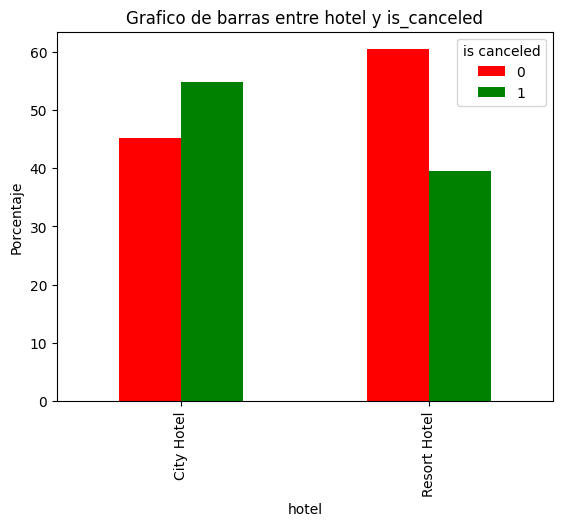

In [15]:
table = pd.crosstab(df_hotels_train_copy['hotel'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(2, 2))
table_percentage = table.div(table.sum(1), axis=0) * 100

ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre hotel y is_canceled')
plt.legend(title='is canceled')

plt.show()

Observamos que según el hotel hay mayor porcentaje de cancelaciones (City hotel) o no cancelaciones (Resort Hotel)

#### **arrival_date_month** 

Esta variable indica el mes de llegada

In [16]:
variables_cualitativas.arrival_date_month.value_counts()

August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

Hay que tener en cuenta en esta variable que 2015 y 2017 no incluyen algunos meses. Los dos mayores meses Agosto y Julio son los únicos dos meses incluidos en los 3 años. Mayo es el mes con mas arribos que solo se incluye en 2016 y 2017

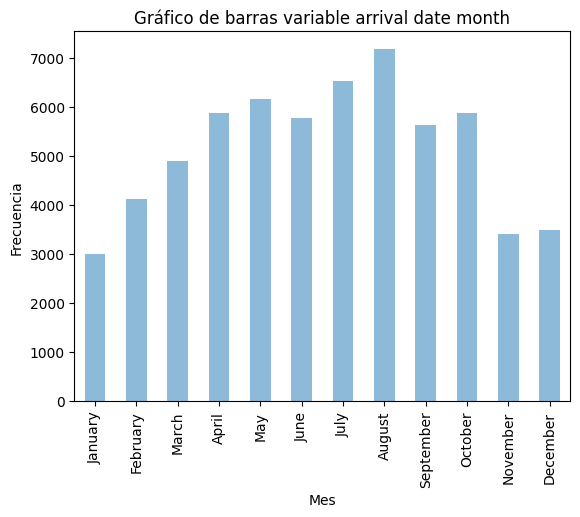

In [17]:
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# apply the mapping to the 'arrival_date_month' column, calculate the frequency counts, and plot the results
counts = variables_cualitativas.arrival_date_month.map(month_dict).value_counts().sort_index()
ax = counts.plot(kind='bar', alpha=0.5, title="Gráfico de barras variable arrival date month", xlabel="Mes", ylabel="Frecuencia")

# update the x-axis labels using the month names
labels = [month for month in month_dict.keys()]
ax.set_xticklabels(labels)

plt.show()

<Figure size 1x1 with 0 Axes>

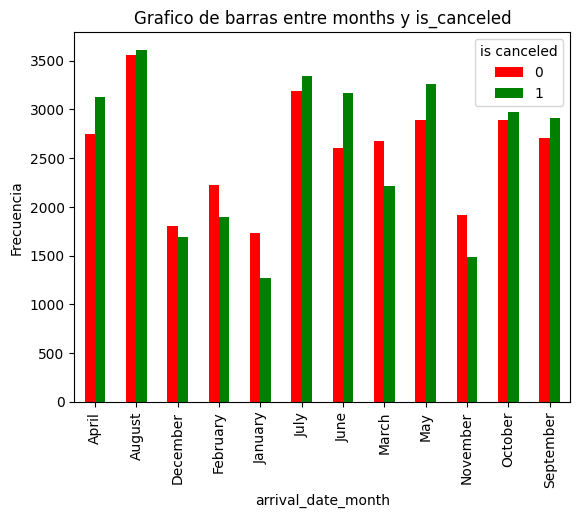

In [18]:
table = pd.crosstab(df_hotels_train_copy['arrival_date_month'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre months y is_canceled')
plt.legend(title='is canceled')

plt.show()

Gráfico en porcentaje

<Figure size 1x1 with 0 Axes>

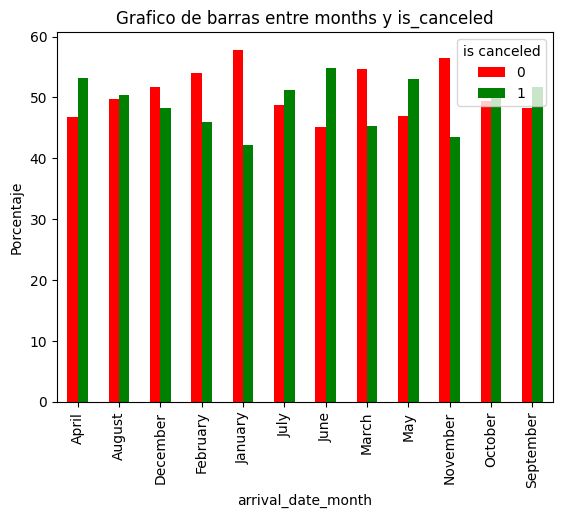

In [19]:
table = pd.crosstab(df_hotels_train_copy['arrival_date_month'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Porcentaje')

plt.title('Grafico de barras entre months y is_canceled')
plt.legend(title='is canceled')

plt.show()

#### **meal**


Es una variable indica el tipo de paquete de comidas encargado por el huesped para la reserva.



*   BB - Bed & Breakfast
*   HB - Halfboard (Breakfast and one other meal - usually dinner)
*   FB - Fullboard (Breakfast, lunch and dinner)
*   Undefined/SC - No meal package 

Es probable que juntar SC y Undefined en una misma variable sea conveniente para futuros analisis y entrenamientos de modelos.

In [20]:
variables_cualitativas.meal.value_counts()

BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable meal '}, xlabel='Paquete de comida', ylabel='Frecuencia'>

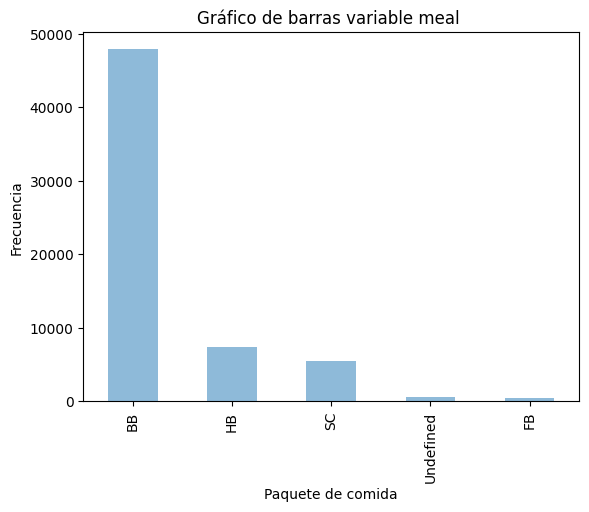

In [21]:
variables_cualitativas.meal.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable meal " , xlabel="Paquete de comida" , ylabel="Frecuencia")

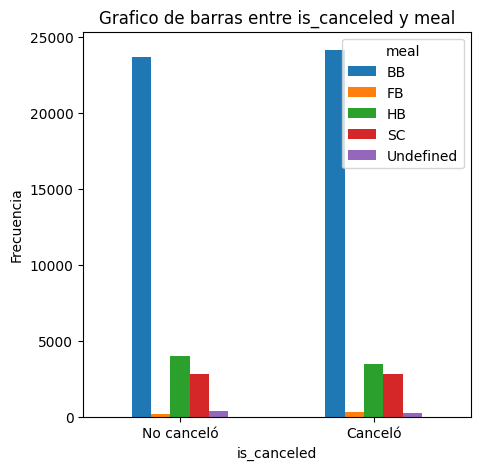

In [22]:

table = pd.crosstab(df_hotels_train_copy['is_canceled'], df_hotels_train_copy['meal'])

fig, ax = plt.subplots(figsize=(5,5))

table.plot(kind='bar', stacked=False, ax=ax)

ax.set_xticklabels(['No canceló', 'Canceló'], rotation=0)
ax.set_xlabel('is_canceled')
ax.set_ylabel('Frecuencia')
plt.title('Grafico de barras entre is_canceled y meal')
plt.show()

Observamos como el plan de comidas no parece tener relación con si una reserva está o no cancelada.

<Figure size 1x1 with 0 Axes>

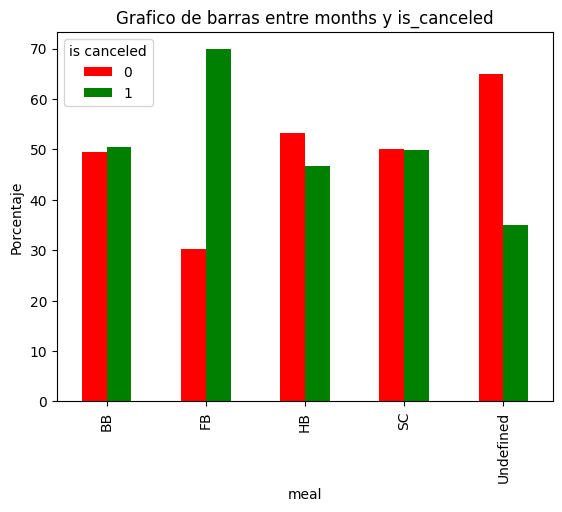

In [23]:
table = pd.crosstab(df_hotels_train_copy['meal'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Porcentaje')

plt.title('Grafico de barras entre months y is_canceled')
plt.legend(title='is canceled')

plt.show()

#### **country**

Esta variable indica el país de origen

In [24]:
variables_cualitativas.country.value_counts()

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

In [25]:
variables_cualitativas.country.value_counts().sort_values(ascending=False).head(20)

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
ITA     1911
IRL     1617
BRA     1152
BEL     1124
USA     1021
NLD      982
CHE      847
CN       597
AUT      581
CHN      545
SWE      481
POL      430
RUS      337
ISR      322
NOR      302
Name: country, dtype: int64

El paper nos indica que es normal para los hoteles no conocer la correcta nacionalidad del huesped hasta el momento del checkin. Por lo que sería interesante analizar esta variable en conjunto con el dato de si se realizo el check in.

<Axes: title={'center': 'Top 20 paises en cantidad de reservas'}, xlabel='País', ylabel='Frecuencia'>

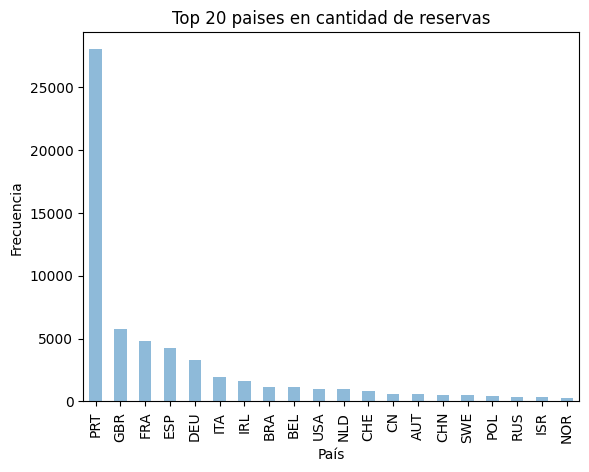

In [26]:
variables_cualitativas.country.value_counts().sort_values(ascending=False).head(20).plot.bar(alpha=0.5 , title="Top 20 paises en cantidad de reservas" , xlabel="País" , ylabel="Frecuencia")

<Figure size 1x1 with 0 Axes>

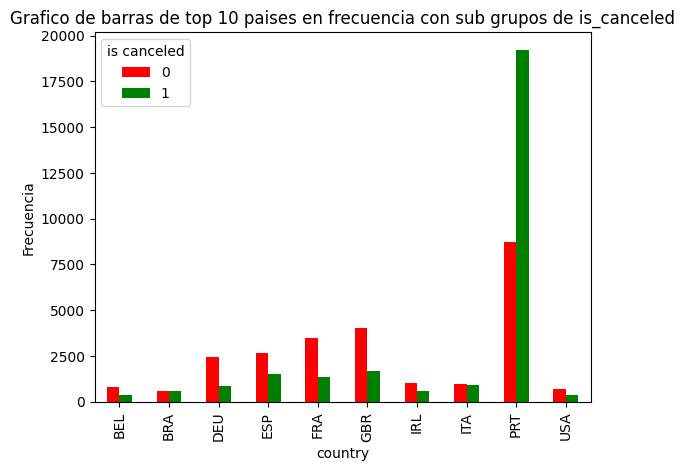

In [27]:
top_10_paises = df_hotels_train_copy['country'].value_counts().head(10)
df_top_10_paises = df_hotels_train_copy[df_hotels_train_copy['country'].isin(top_10_paises.index)]

table = pd.crosstab(df_top_10_paises['country'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras de top 10 paises en frecuencia con sub grupos de is_canceled')
plt.legend(title='is canceled')

plt.show()

Se puede observar que la mayoría de las reservas de portugal si son canceladas, mientras que las provenientes de otros paises dentro del top 10, o estan más parejas o tienen mayor cantidad de no canceladas.
Igualmente la frecuencia de portugal nos desvirtua la escala, por lo que pasemos a graficar lo mismo pero en porcentajes.

<Figure size 1x1 with 0 Axes>

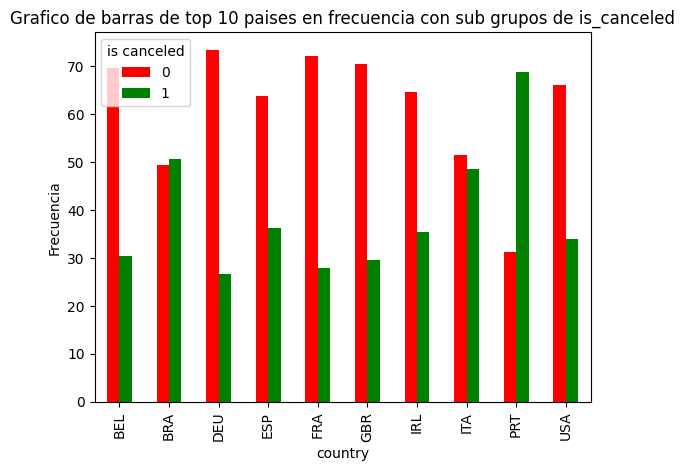

In [28]:
top_10_paises = df_hotels_train_copy['country'].value_counts().head(10)
df_top_10_paises = df_hotels_train_copy[df_hotels_train_copy['country'].isin(top_10_paises.index)]

table = pd.crosstab(df_top_10_paises['country'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))
table_percentage = table.div(table.sum(1), axis=0) * 100

ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras de top 10 paises en frecuencia con sub grupos de is_canceled')
plt.legend(title='is canceled')

plt.show()

Observamos como los paises distintos a portugal se comportan opuesto a portugal, por lo que una variable como is_portuguese podría llegar a ser útil, y la tendremos en cuenta.

Por otro lado Brasil e italia, esta bastante parejo cercano a un 50/50

#### is_portuguese

In [29]:
df_train_con_is_portuguese = df_hotels_train_copy.copy()
# Sacamos los Na antes de rellenar todo con 1
df_train_con_is_portuguese = df_train_con_is_portuguese.dropna(subset=['country'])
df_train_con_is_portuguese['is_portuguese'] = [1]*len(df_train_con_is_portuguese)


df_train_con_is_portuguese.loc[df_hotels_train_copy['country'] != 'PRT', 'is_portuguese'] = 0


df_train_con_is_portuguese.is_portuguese.value_counts()

<ipython-input-29-3d8b7727535f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_con_is_portuguese['is_portuguese'] = [1]*len(df_train_con_is_portuguese)


0    33742
1    27950
Name: is_portuguese, dtype: int64

<Figure size 1x1 with 0 Axes>

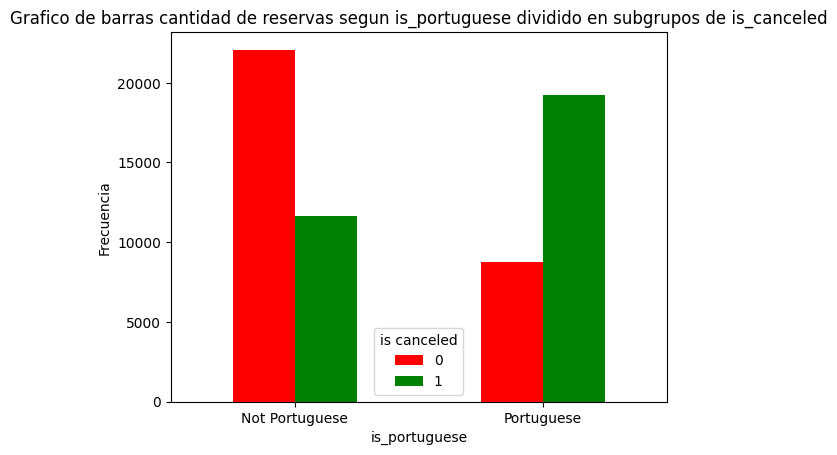

In [30]:
table = pd.crosstab(df_train_con_is_portuguese['is_portuguese'], df_train_con_is_portuguese['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')
ax.set_xticklabels(['Not Portuguese', 'Portuguese'], rotation=0)

plt.title('Grafico de barras cantidad de reservas segun is_portuguese dividido en subgrupos de is_canceled')
plt.legend(title='is canceled')

plt.show()

En este gráfico apreciamos claramente este efecto "opuesto" mencionado de la cancelación de una reserva según si el cliente es o no portugues.
Al mismo tiempo bajo esta variable se perdería información de ciertos paises que tenían una relación mas pareja entre cancelación y no cancelación como Brasil.

In [31]:
df_hotels_train_copy['is_portuguese'] = df_train_con_is_portuguese['is_portuguese']
df_hotels_test_copy['is_portuguese'] = df_train_con_is_portuguese['is_portuguese']

#### **market_segment**

Esta variable nos indica el segmento de mercado, TA hace referencia a Travel agents y TO a Tour operators.
Como vemos hay ciertas reservas con Undefined pero son muy pocas. 

In [32]:
variables_cualitativas.market_segment.value_counts()

Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64

Observamos 2 filas con el valor Undefined, luego serán tratadas en la sección de valores nulos.

<Axes: title={'center': 'Gráfico de barras variable market segment '}, xlabel='segmento de mercado', ylabel='Frecuencia'>

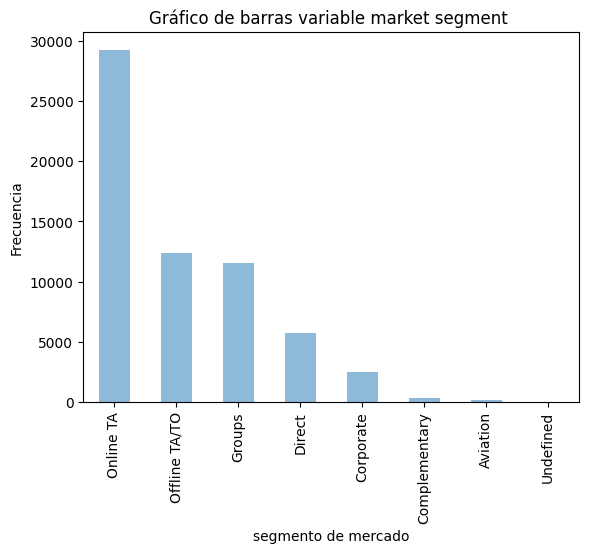

In [33]:
variables_cualitativas.market_segment.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable market segment " , xlabel="segmento de mercado" , ylabel="Frecuencia")

<Figure size 1x1 with 0 Axes>

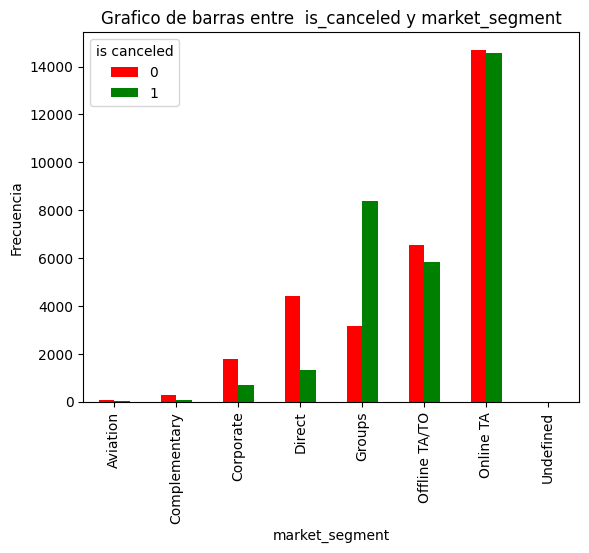

In [34]:
table = pd.crosstab(df_hotels_train_copy['market_segment'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre  is_canceled y market_segment')
plt.legend(title='is canceled')

plt.show()

Observemos el mismo gráfico en porcentajes, para que la frecuencia de Online TA, no impacte tanto visualmente

<Figure size 1x1 with 0 Axes>

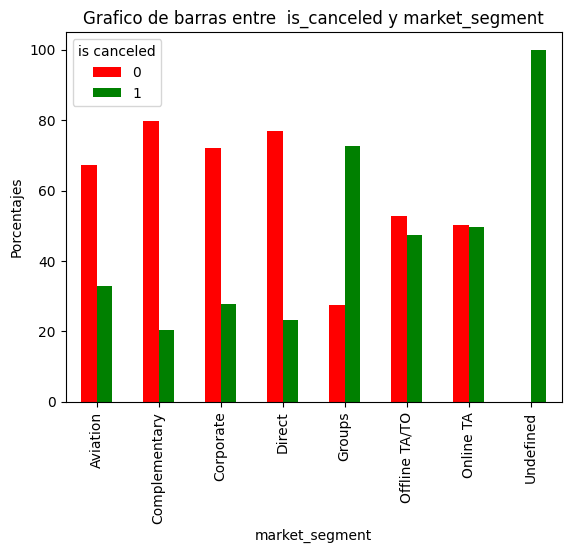

In [35]:
table = pd.crosstab(df_hotels_train_copy['market_segment'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Porcentajes')


plt.title('Grafico de barras entre  is_canceled y market_segment')
plt.legend(title='is canceled')

plt.show()

Las categorías offline TA/TO y Online TA (Que son las de mayor frecuencia) no tienen mucha diferencia porcentual entre cancelado y no cancelado. Mientras que las demás si, pero hay que tener en cuenta ciertas categorías como Aviation, Comlementary y Corporate pueden llegar a tener poca data y por lo tanto que este porcentaje pueda parecer más llamativo de lo que debería.

Groups es la tercera en frecuencia y al mismo tiempo denota una diferencia significativa entre los subgrupos de is_canceled

Por último undifined presenta solo 2 filas y estas serán tratadas mas adelante en valores nulos.

#### **distribution_channel**

Esta variable nos indica el canal de distribución de la reserva

In [36]:
variables_cualitativas.distribution_channel.value_counts()

TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64

TA refiere a Travel Agent y TO a Tour operators.

<Axes: title={'center': 'Gráfico de barras variable distribution channel '}, xlabel='Canal de distribución', ylabel='Frecuencia'>

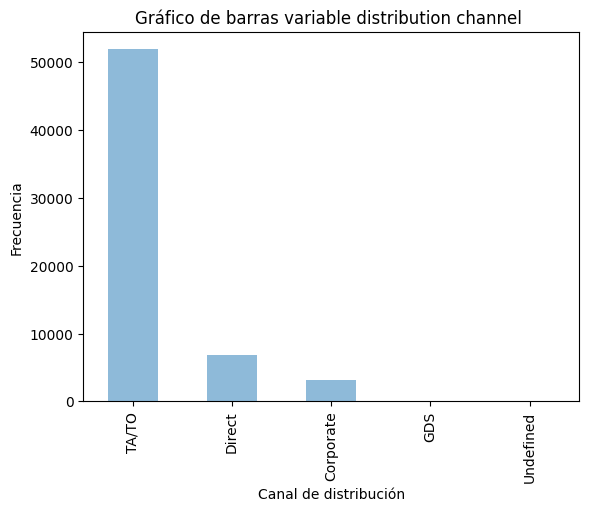

In [37]:
variables_cualitativas.distribution_channel.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable distribution channel " , xlabel="Canal de distribución" , ylabel="Frecuencia")

<Figure size 1x1 with 0 Axes>

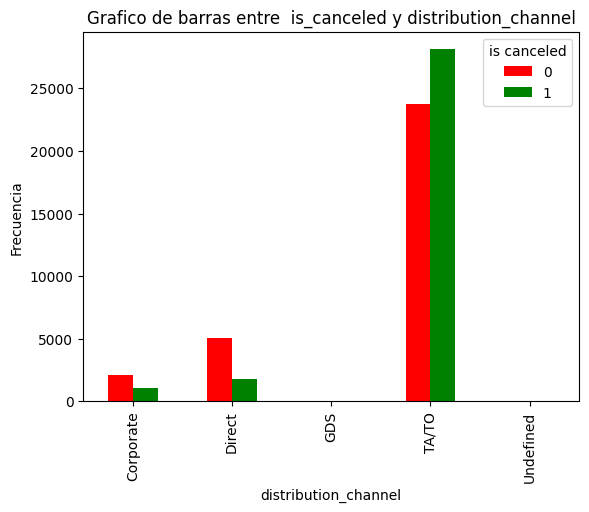

In [38]:
table = pd.crosstab(df_hotels_train_copy['distribution_channel'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre  is_canceled y distribution_channel')
plt.legend(title='is canceled')

plt.show()

En porcentajes

<Figure size 1x1 with 0 Axes>

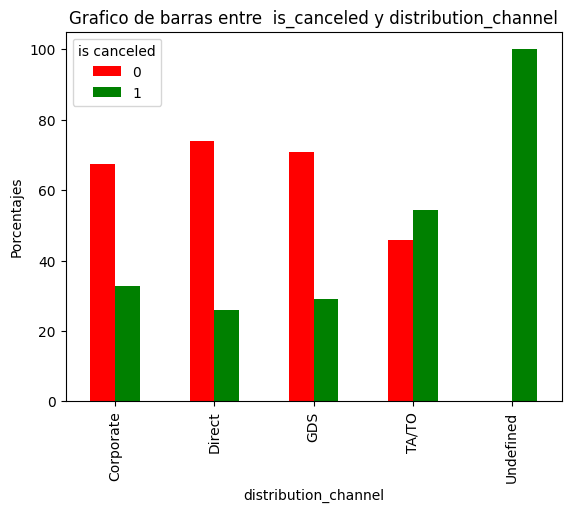

In [39]:
table = pd.crosstab(df_hotels_train_copy['distribution_channel'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Porcentajes')


plt.title('Grafico de barras entre  is_canceled y distribution_channel')
plt.legend(title='is canceled')

plt.show()

#### **is_repeated_guest**

Esta variable nos indica si el huesped es repetido. Toma los valores de 1 si está repetido o 0 si no. Puede resultar muy interesante a la hora de analizar cancelaciones.

In [40]:
variables_cualitativas.is_repeated_guest.value_counts()

0    60180
1     1733
Name: is_repeated_guest, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable is repeated guest '}, xlabel='Huesped repetido', ylabel='Frecuencia'>

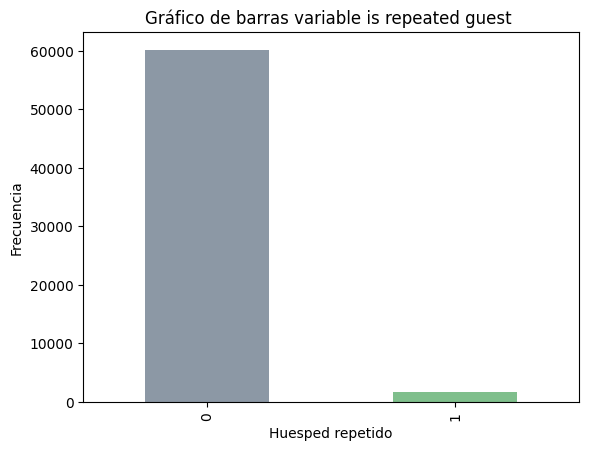

In [41]:
colores=[(0.1, 0.2, 0.3),(0, 0.5, 0.1)]
variables_cualitativas.is_repeated_guest.value_counts().plot.bar(alpha=0.5 , color=colores, title="Gráfico de barras variable is repeated guest " , xlabel="Huesped repetido" , ylabel="Frecuencia")

<Figure size 1x1 with 0 Axes>

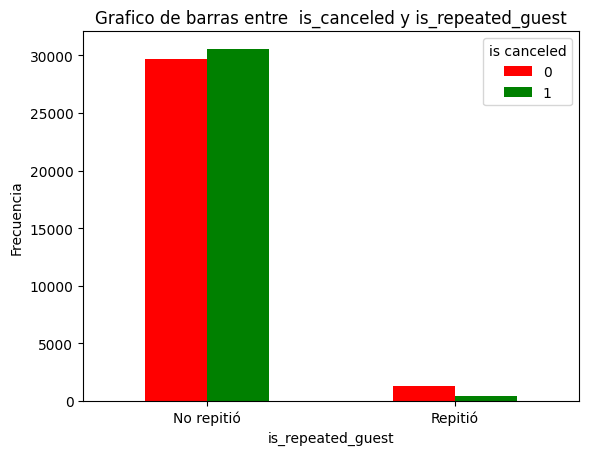

In [42]:
table = pd.crosstab(df_hotels_train_copy['is_repeated_guest'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])
ax.set_xticklabels(['No repitió', 'Repitió'], rotation=0)
ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre  is_canceled y is_repeated_guest')
plt.legend(title='is canceled')

plt.show()

Observemos esto porcentualmente

<Figure size 1x1 with 0 Axes>

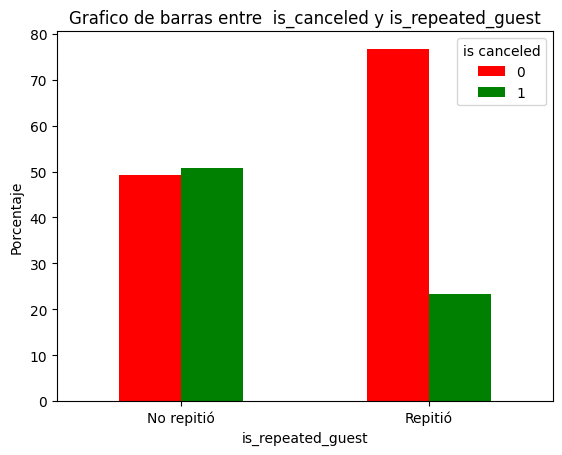

In [43]:
table = pd.crosstab(df_hotels_train_copy['is_repeated_guest'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_xticklabels(['No repitió', 'Repitió'], rotation=0)
ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre  is_canceled y is_repeated_guest')
plt.legend(title='is canceled')

plt.show()

Hay una clara relación en si un cliente ya tuvo una reserva anteriormente, y si la actual esta o no cancelada.
Por lo que vemos las reservas actuales de clientes que tuvieron reservas previas en su mayoría no estan canceladas.

#### **deposit_type**


Esta variable indica si el cliente hizo un depósito para asegurar la  reserva. Puede tomar los valores de:

*   No deposit - Ningún depósito fue hecho
*   Non refund - se depositó el valor total del costo total de la estadía.   
*   Refundable - se depositó un valor menor al costo total de la estadía


In [44]:
variables_cualitativas.deposit_type.value_counts()

No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64

Podemos observar que hay muy pocos Refundable.

<Axes: title={'center': 'Gráfico de barras variable deposit type '}, xlabel='tipo deposito', ylabel='Frecuencia'>

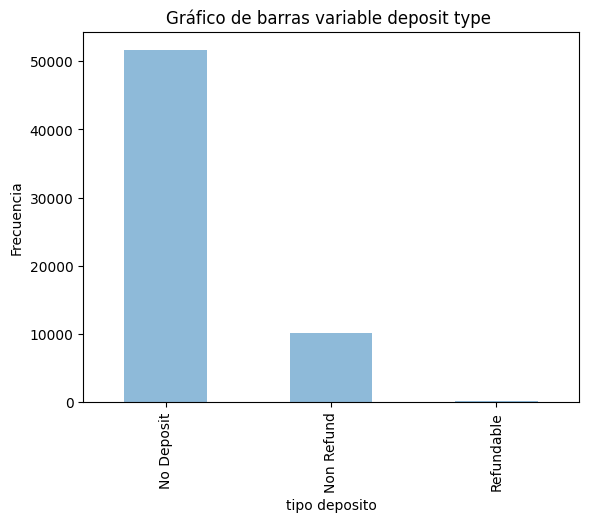

In [45]:
variables_cualitativas.deposit_type.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable deposit type " , xlabel="tipo deposito" , ylabel="Frecuencia")

<Figure size 1x1 with 0 Axes>

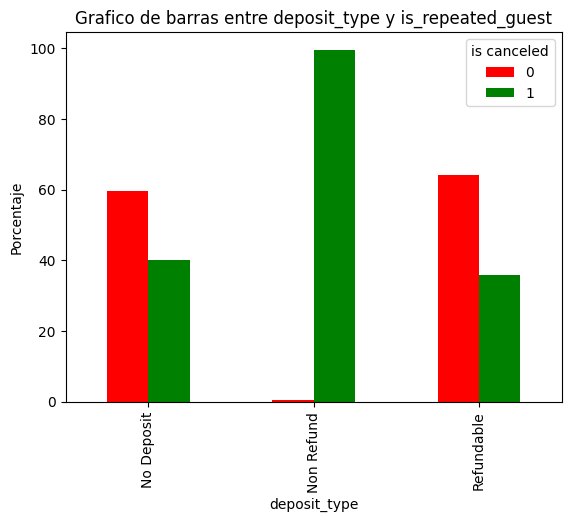

In [46]:
table = pd.crosstab(df_hotels_train_copy['deposit_type'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])


ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre deposit_type y is_repeated_guest')
plt.legend(title='is canceled')

plt.show()

Observamos algo llamativo a partir de este gráfico, las personas que realizar un deposito del valor total del costo de la estadía, tienen la reserva cancelada.

Contrario a lo que esperaríamos mediante la lógica, debido a que si alguien ya pago el total, por que cancelaría la reserva.

####**deposit_boolean**
Si hizo un depósito (total o parcial) va 1. Sino 0

In [47]:

df_hotels_train_copy['deposit_boolean'] = [1]*len(df_hotels_train_copy)

df_hotels_train_copy.loc[df_hotels_train_copy['deposit_type'] == 'No Deposit', 'deposit_boolean'] = 0


df_hotels_test_copy['deposit_boolean'] = [1]*len(df_hotels_test_copy)

df_hotels_test_copy.loc[df_hotels_test_copy['deposit_type'] == 'No Deposit', 'deposit_boolean'] = 0

df_hotels_train_copy.deposit_boolean.value_counts()


0    51685
1    10228
Name: deposit_boolean, dtype: int64

In [48]:
df_filtrado_deposit = df_hotels_train_copy[df_hotels_train_copy['deposit_boolean'] == 1]

df_filtrado_deposit.deposit_boolean.value_counts()

df_filtrado_deposit.is_canceled.value_counts()

1    10141
0       87
Name: is_canceled, dtype: int64

In [49]:
(df_filtrado_deposit.is_canceled.sum()) / (df_filtrado_deposit.deposit_boolean.sum())

0.9914939382088385

Más del 99% de los clientes que eligieron depositar dinero canceló.

<Figure size 200x200 with 0 Axes>

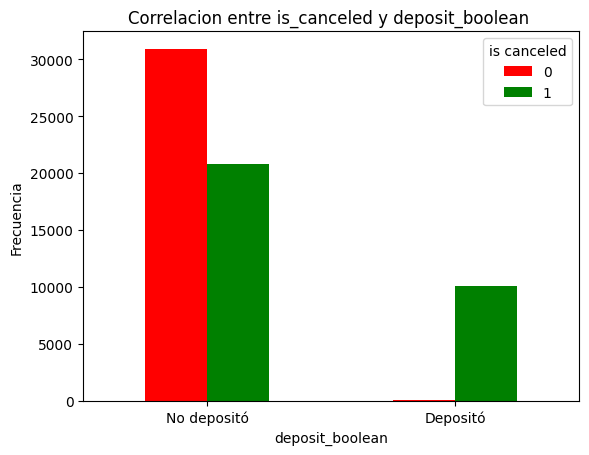

In [50]:
table = pd.crosstab(df_hotels_train_copy['deposit_boolean'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(2, 2))

ax = table.plot.bar(stacked=False, color=['red', 'green'])


ax.set_xticklabels(['No depositó', 'Depositó'], rotation=0)
ax.set_ylabel('Frecuencia')


plt.title('Correlacion entre is_canceled y deposit_boolean ')
plt.legend(title='is canceled')

plt.show()


Podemos observar como este fenómeno va en contra de lo que se creería mediante la lógica, ya que pensaríamos que al depositar, el cliente sería menos propensos a cancelar.

#### **reserved_room_type** 

Esta variable indica el código del tipo de habitación reservada

In [51]:
variables_cualitativas.reserved_room_type.value_counts()

A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        7
L        1
Name: reserved_room_type, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable reserved room type '}, xlabel='tipo de habitacion reservada', ylabel='Frecuencia'>

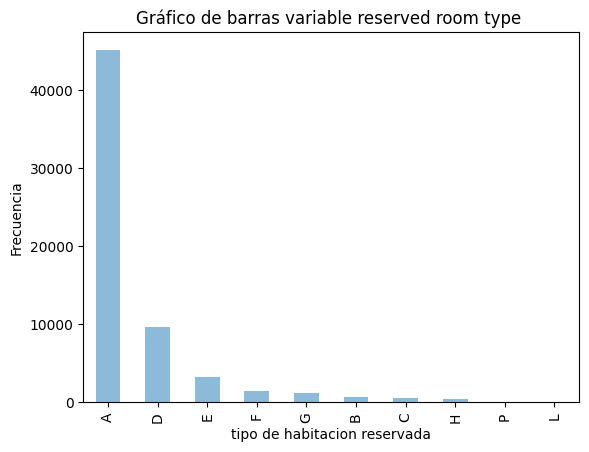

In [52]:
variables_cualitativas.reserved_room_type.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable reserved room type " , xlabel="tipo de habitacion reservada" , ylabel="Frecuencia")

<Figure size 1x1 with 0 Axes>

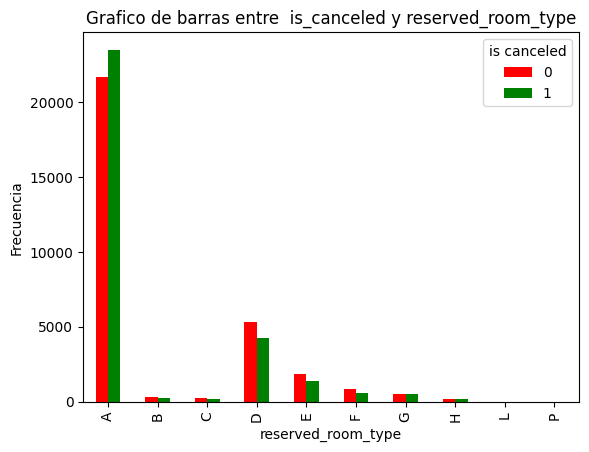

In [53]:
table = pd.crosstab(df_hotels_train_copy['reserved_room_type'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre  is_canceled y reserved_room_type')
plt.legend(title='is canceled')

plt.show()

En porcentaje

<Figure size 1x1 with 0 Axes>

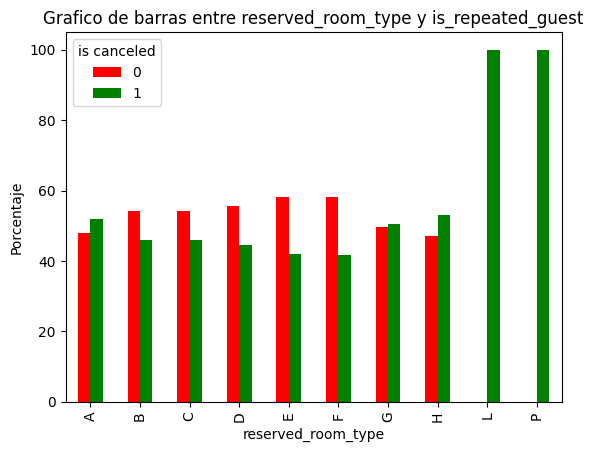

In [54]:
table = pd.crosstab(df_hotels_train_copy['reserved_room_type'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])


ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre reserved_room_type y is_repeated_guest')
plt.legend(title='is canceled')


#### **assigned_room_type**

Esta variable indica el código del tipo de habitación asignada. Podemos analizar si afecta el hecho de reservar un tipo de habitación y que se te asigne otro.

In [55]:
variables_cualitativas.assigned_room_type.value_counts()

A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1056
H      384
I      145
K      119
P        7
L        1
Name: assigned_room_type, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable assigned room type '}, xlabel='tipo de habitacion asignada', ylabel='Frecuencia'>

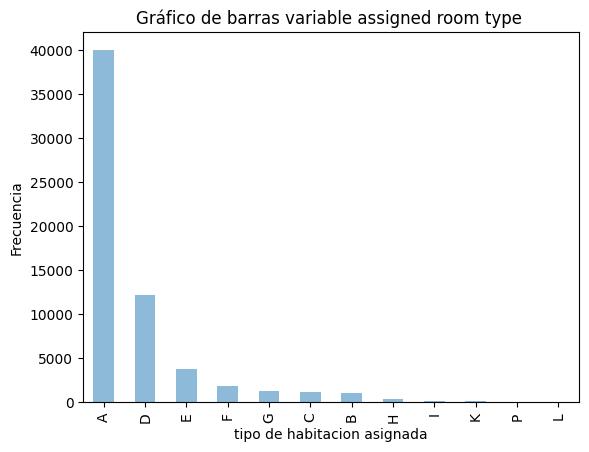

In [56]:
variables_cualitativas.assigned_room_type.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable assigned room type " , xlabel="tipo de habitacion asignada" , ylabel="Frecuencia")

<Figure size 1x1 with 0 Axes>

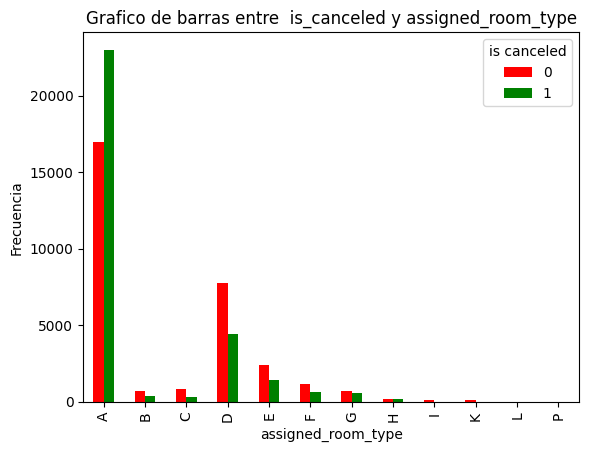

In [57]:
table = pd.crosstab(df_hotels_train_copy['assigned_room_type'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre  is_canceled y assigned_room_type')
plt.legend(title='is canceled')

plt.show()



Estaría interesante ver la relación de si un cliente canceló con una variable que indique si se le realizó cambio de tipo de habitacón respecto a la reservada

<Figure size 1x1 with 0 Axes>

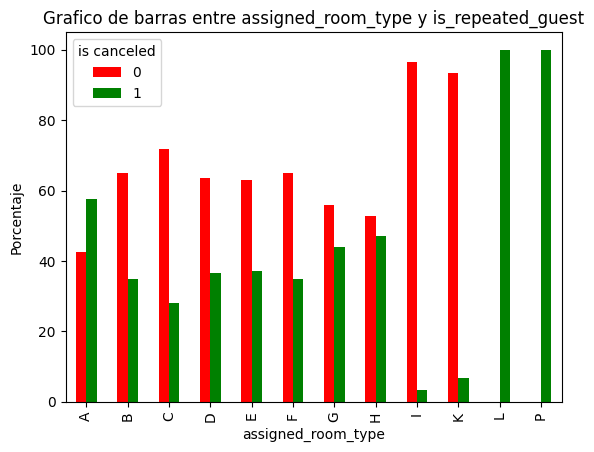

In [58]:
table = pd.crosstab(df_hotels_train_copy['assigned_room_type'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])


ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre assigned_room_type y is_repeated_guest')
plt.legend(title='is canceled')


#### had_room_type_change

In [59]:
df_train_con_had_change = df_hotels_train_copy.copy()
df_train_con_had_change['had_room_type_change'] = [1]*len(df_train_con_had_change)

df_train_con_had_change.loc[df_train_con_had_change['reserved_room_type'] == df_train_con_had_change['assigned_room_type'], 'had_room_type_change'] = 0


df_train_con_had_change.had_room_type_change.value_counts()

0    55489
1     6424
Name: had_room_type_change, dtype: int64

La mayoría no tuvo cambios en la habítacion asignada respecto a la reservada. Pero veamos como afecta el hecho de que se les haya cambiado la habitación.


<Figure size 1x1 with 0 Axes>

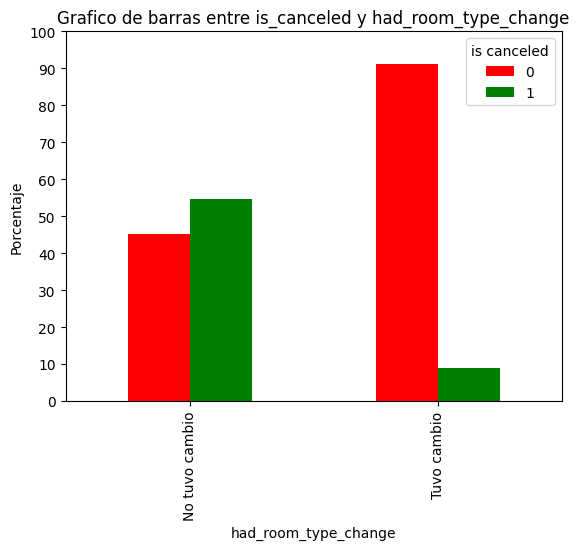

In [60]:
table = pd.crosstab(df_train_con_had_change['had_room_type_change'], df_train_con_had_change['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_xticklabels(['No tuvo cambio','Tuvo cambio'])
ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre is_canceled y had_room_type_change')
plt.legend(title='is canceled')
plt.yticks(range(0, 101, 10))

plt.show()

Observamos como la mayoría de los clientes que tuvo un cambio en la habitación, no tiene la reserva cancelada.
Será que los cambios de habitación por manejos administrativos del hotel se realizan en su gran mayoría se realizan al momento que hace check in el cliente? Y al haber hecho check in, esa reserva ya no será una reserva cancelada.

#### **agent** 

Esta variable indica el ID de la agencia de viaje que efectuó la reserva

In [61]:
variables_cualitativas.agent.value_counts().head(20)

9.0      17004
240.0     7386
1.0       4424
14.0      1700
6.0       1639
7.0       1581
250.0     1346
241.0      770
3.0        739
8.0        732
37.0       726
28.0       696
19.0       662
21.0       547
40.0       455
314.0      449
229.0      448
29.0       421
242.0      388
12.0       334
Name: agent, dtype: int64

<Figure size 1x1 with 0 Axes>

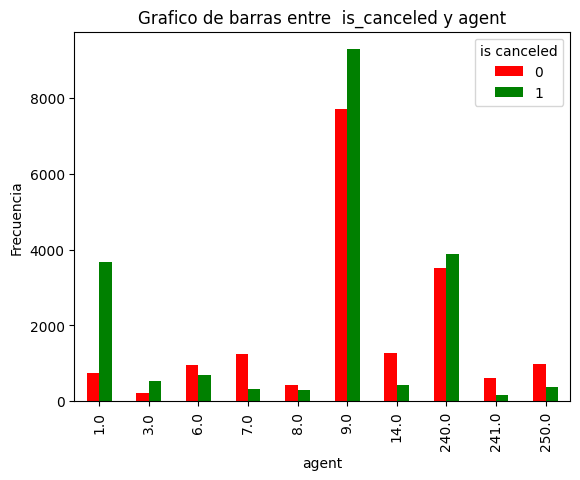

In [62]:
top_10_agent = df_hotels_train_copy['agent'].value_counts().head(10)
df_top_10_agent = df_hotels_train_copy[df_hotels_train_copy['agent'].isin(top_10_agent.index)]

table = pd.crosstab(df_top_10_agent['agent'], df_top_10_agent['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre  is_canceled y agent')
plt.legend(title='is canceled')

plt.show()

<Figure size 500x500 with 0 Axes>

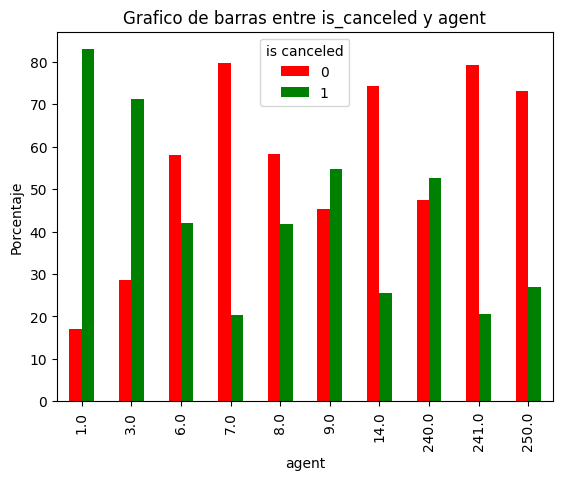

In [63]:
top_10_agent = df_hotels_train_copy['agent'].value_counts().head(10)
df_top_10_agent = df_hotels_train_copy[df_hotels_train_copy['agent'].isin(top_10_agent.index)]

table = pd.crosstab(df_top_10_agent['agent'], df_top_10_agent['is_canceled'])
plt.figure(figsize=(5, 5))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre is_canceled y agent')
plt.legend(title='is canceled')

plt.show()

Observamos como para algunas agencias hay mayor cantidad de cancelaciones mientras que para otras, mayor cantidad de no cancelaciones.

#### **company**


Esta variable indica el ID de la entidad responsable de abonar la reserva

In [64]:
df_hotels_train_copy.company.value_counts().head(5)

40.0     390
223.0    364
67.0     169
45.0     118
153.0    106
Name: company, dtype: int64

<Figure size 1x1 with 0 Axes>

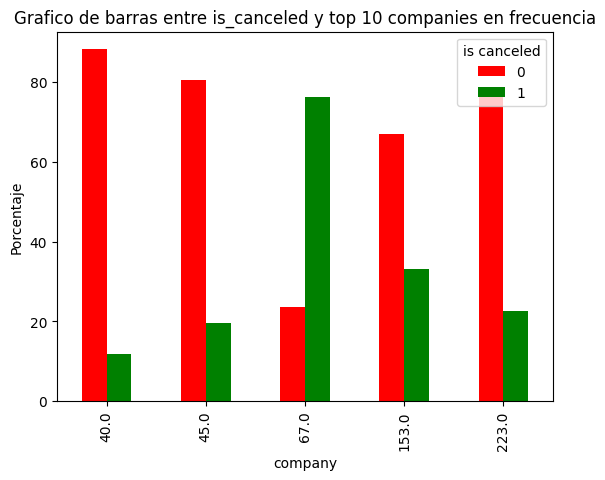

In [65]:
top_5_companies = df_hotels_train_copy['company'].value_counts().head(5)
df_top_5_companies = df_hotels_train_copy[df_hotels_train_copy['company'].isin(top_5_companies.index)]

table = pd.crosstab(df_top_5_companies['company'], df_top_5_companies['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre is_canceled y top 10 companies en frecuencia')
plt.legend(title='is canceled')

plt.show()

La mayoría de las compañias en el top 10 de frecuencia estan asignadas a reservas no canceladas, excepto por la company 51, donde esta bastante parejo.
Y la company de id 67, presenta el fenómeno opuesto.

####**company_boolean**

In [66]:
df_hotels_train_copy['company_boolean'] = [1]*len(df_hotels_train_copy)

df_hotels_train_copy.loc[df_hotels_train_copy['company'] == 0, 'company_boolean'] = 0

df_hotels_test_copy['company_boolean'] = [1]*len(df_hotels_test_copy)

df_hotels_test_copy.loc[df_hotels_test_copy['company'] == 0, 'company_boolean'] = 0

df_hotels_train_copy.company_boolean.value_counts()


1    61913
Name: company_boolean, dtype: int64

In [67]:
df_filtrado_company = df_hotels_train_copy[df_hotels_train_copy['company_boolean'] == True]

df_filtrado_company.company_boolean.value_counts()

df_filtrado_company.is_canceled.value_counts()

0    30972
1    30941
Name: is_canceled, dtype: int64

In [68]:
(df_filtrado_company.is_canceled.sum()) * 100 / (df_filtrado_company.company_boolean.sum())

49.9749648700596

<Figure size 1x1 with 0 Axes>

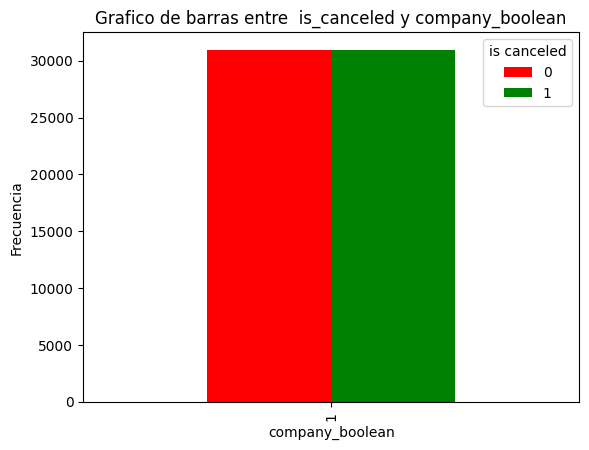

In [69]:
table = pd.crosstab(df_hotels_train_copy['company_boolean'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre  is_canceled y company_boolean')
plt.legend(title='is canceled')

plt.show()

#### **customer_type**





Puede tomar los valores de:

*   Contract - cuando la reserva tiene un allotment o cualquier otro tipo de contrato asociado.
*   Group - cuando la reserva esta asociada a un grupo
*   Transient - cuando la reserva no esta asociada ni a un contrato, ni a un grupo, ni a ninguna otra reserva transiente.
*   Transient-Party cuando la reserva es transiente pero esta asociada al menos a otra reserva transiente

In [70]:
variables_cualitativas.customer_type.value_counts()

Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable customer type '}, xlabel='tipo de huesped', ylabel='Frecuencia'>

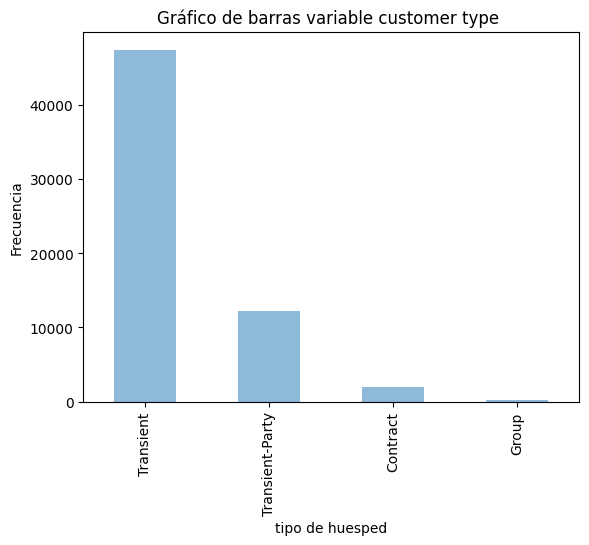

In [71]:
variables_cualitativas.customer_type.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable customer type " , xlabel="tipo de huesped" , ylabel="Frecuencia")

<Figure size 1x1 with 0 Axes>

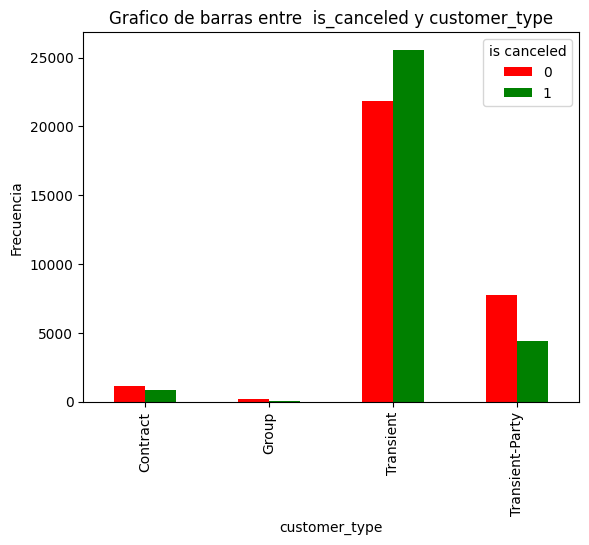

In [72]:
table = pd.crosstab(df_hotels_train_copy['customer_type'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))


ax = table.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Frecuencia')


plt.title('Grafico de barras entre  is_canceled y customer_type')
plt.legend(title='is canceled')

plt.show()



En porcentaje

<Figure size 1x1 with 0 Axes>

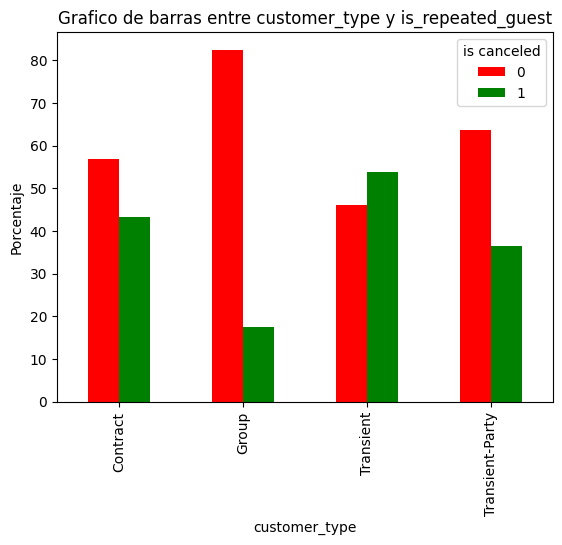

In [73]:
table = pd.crosstab(df_hotels_train_copy['customer_type'], df_hotels_train_copy['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])


ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre customer_type y is_repeated_guest')
plt.legend(title='is canceled')

#### **id**

Esta variable indica el número de identificación único en la reserva

In [74]:
variables_cualitativas.id.head()

0    7aa4cc6b-b92c-4061-b21d-4f9e0cac4689
1    b1428f80-c56c-4ae4-91a9-6962edae08b1
2    2226c018-ea20-4c4e-8f71-ea66aee70d7c
3    314f56dc-2e4d-4298-9bdd-27bb008bffff
4    28c75445-c603-413a-babf-ad377018b592
Name: id, dtype: object

Verificamos si hay clientes repetidos

In [75]:
df_hotels_train_original[df_hotels_train_original.duplicated(keep=False, subset = ['id'])]

Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status_date, id, is_canceled]
Index: []

[0 rows x 32 columns]

#### **is_canceled** 

Es la variable que estaremos tratando de predecir, indica si la reserva esta (1) o no cancelada (0)

In [76]:
df_hotels_train_original.is_canceled.value_counts()

0    30972
1    30941
Name: is_canceled, dtype: int64

Observamos que esta bastante parejo en cantidad entre reservas canceladas y no canceladas

<Axes: title={'center': 'Gráfico de barras variable is canceled '}, xlabel='is_canceled', ylabel='Frecuencia'>

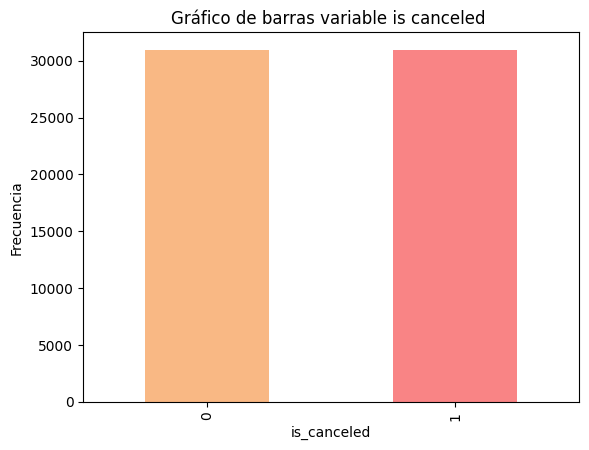

In [77]:
colores=[(0.960, 0.447, 0.039),(0.960, 0.039, 0.050)]
variables_cualitativas.is_canceled.value_counts().plot.bar(alpha=0.5 , color=colores, title="Gráfico de barras variable is canceled " , xlabel="is_canceled" , ylabel="Frecuencia")

### Valores nulos respecto a las variables cualitativas

Entre estos tipos de variables, tenemos 3 que poseen valores nulos, las cuales son:

**country: 221** 

**agent: 7890** 

**company: 58761**

Además deberemos analizar que hacemos con los valores como Undefined, SC, valores que no tienen sentido, etc.

#### Country

Primero comenzamos revisando las filas que tienen estos valores nulos:



*   Para la variable **Country**



In [78]:
cantidad_de_countries_nulos= variables_cualitativas.country.isna().sum()
cantidad_de_countries_nulos

221

In [79]:
#Porcentaje de nulos
(cantidad_de_countries_nulos * 100) / variables_cualitativas.shape[0]

0.3569524978599002

Son muy pocos. Representan menos del 1%. Analizar si podemos encontrar una relación con Agent o con Company. En ese caso quizás conviene completar con datos parecidos (multivariada). Sino completar con "Otro país".

Como vemos hay 221 reservas con NaN como país.

Es un poco porcentaje, pero analizemos si es que estos pocos nulos tienen una alta tasa de cancelamiento.

In [80]:
cantidad_reservas_canceladas_con_paises_nulos = (df_hotels_train_copy[df_hotels_train_copy['country'].isna()]['is_canceled'] == 0).sum()
cantidad_reservas_no_canceladas_con_paises_nulos = (df_hotels_train_copy[df_hotels_train_copy['country'].isna()]['is_canceled'] == 1).sum()
df_hotels_train_copy[df_hotels_train_copy['country'].isna()]['is_canceled'].value_counts()

0    172
1     49
Name: is_canceled, dtype: int64

In [81]:
#Porcentaje de cancelaciones con paises NaN
(cantidad_reservas_canceladas_con_paises_nulos * 100) / cantidad_de_countries_nulos

77.82805429864253

In [82]:
#Porcentaje de  no cancelaciones con paises NaN
(cantidad_reservas_no_canceladas_con_paises_nulos * 100) / cantidad_de_countries_nulos

22.171945701357465

Por más que haya un 77% de reservas que no son canceladas cuando el país es nulo, son muy poca cantidad de datos como para asumir algo. Por lo que eliminaremos las filas con paises nulos.

In [83]:
df_hotels_train_copy=df_hotels_train_copy.dropna(subset=['country'])
df_hotels_train_copy['country'].isna().sum()

0

#### is_portuguese

A is_portuguese le rellenamos los valores faltantes con 1, que sería el caso más frecuente.

In [84]:
df_hotels_train_copy['is_portuguese'] = df_hotels_train_copy['is_portuguese'].fillna(1)
df_hotels_train_copy['is_portuguese'].isna().sum()

0

In [85]:
df_hotels_test_copy['is_portuguese'] = df_hotels_test_copy['is_portuguese'].fillna(1)
df_hotels_test_copy['is_portuguese'].isna().sum()

0

####Agent



*   Para la variable **agent**



In [86]:
cantidad_de_agents_nulos = variables_cualitativas.agent.isna().sum()
cantidad_de_agents_nulos



7890

In [87]:
#Porcentaje de nulos
(cantidad_de_agents_nulos * 100) / variables_cualitativas.shape[0]

12.743688724500508

Procedemos a agregar una categoría nueva: "Sin agente", representada con el id 0.
Es el 13% aproximadamente. Es un porcentaje no despreciable. 

In [88]:
df_hotels_train_copy['agent'] = df_hotels_train_copy['agent'].fillna(0)
df_hotels_test_copy['agent'] = df_hotels_test_copy['agent'].fillna(0)

Analizemos un gráfico visto anteriormente, pero con los nuevos datos.

<Figure size 1x1 with 0 Axes>

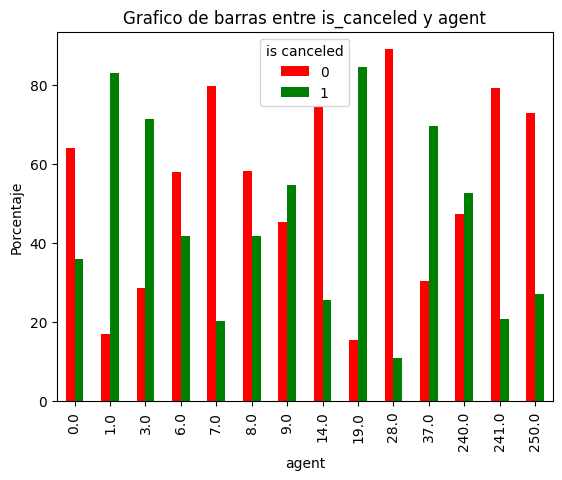

In [89]:
top_14_agent = df_hotels_train_copy['agent'].value_counts().head(14)
df_top_14_agent = df_hotels_train_copy[df_hotels_train_copy['agent'].isin(top_14_agent.index)]

table = pd.crosstab(df_top_14_agent['agent'], df_top_14_agent['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre is_canceled y agent')
plt.legend(title='is canceled')

plt.show()

Observamos como la mayoría de reservas sin agente, no son canceladas.

#### Company


*   Para la variable **company**






In [90]:
cantidad_de_company_nulos = variables_cualitativas.company.isna().sum()

Variable con mucha cantidad de nulos en relación con la cantidad de filas, vemos que el 94,9% de las reservas tienen company null

In [91]:
#Porcentaje de nulos
(cantidad_de_company_nulos * 100) / variables_cualitativas.shape[0]

94.90898518889409

A pesar de que el 94% de los datos son nulos en el paper se aclara, que esto hace referencia a que la reserva no tiene una compañia asociada. Este nulo no hace referencia a valor faltante o mal cargado, por lo que decidimos dejar una categoria SIN COMPANY, representada por el id 0.

Valores nulos en company antes:

In [92]:
cantidad_de_company_nulos = variables_cualitativas.company.isna().sum()
cantidad_de_company_nulos

58761

<Figure size 1x1 with 0 Axes>

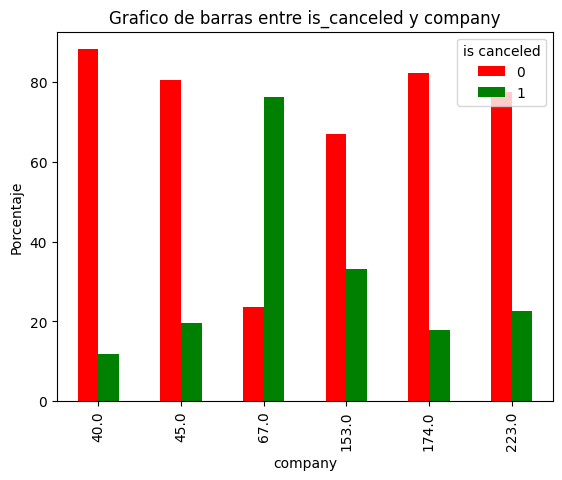

In [93]:
top_6_company = df_hotels_train_copy['company'].value_counts().head(6)
df_top_6_company = df_hotels_train_copy[df_hotels_train_copy['company'].isin(top_6_company.index)]

table = pd.crosstab(df_top_6_company['company'], df_top_6_company['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre is_canceled y company')
plt.legend(title='is canceled')

plt.show()

In [94]:
df_top_6_company.company.value_counts()

40.0     390
223.0    364
67.0     169
45.0     118
153.0    106
174.0     73
Name: company, dtype: int64

Observamos como ciertas companias tienen alta diferencia de porcentaje, pero como vemos gracias al value_counts tenemos poca data, y esta diferencia de porcentajes no es tan fiable como para marcar un hallazgo.

Analizemos tambien con las reservas sin companias, Procedemos a asignar el id 0 a las companias con valor nulo

In [95]:
#Rellenamos na con 0
df_hotels_train_copy['company'] = df_hotels_train_copy['company'].fillna(0)
df_hotels_test_copy['company'] = df_hotels_test_copy['company'].fillna(0)

<Figure size 1x1 with 0 Axes>

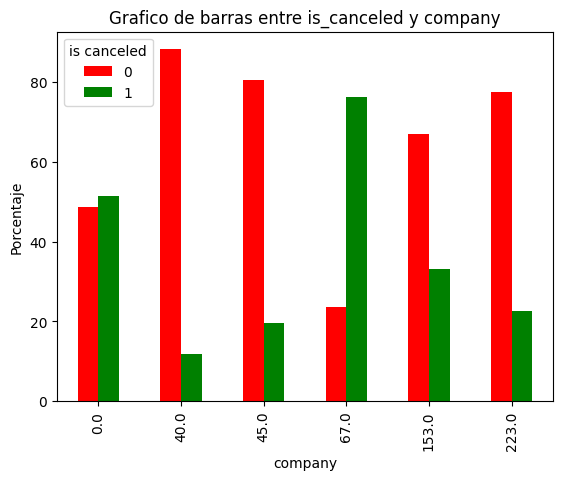

In [96]:
top_6_company = df_hotels_train_copy['company'].value_counts().head(6)
df_top_6_company = df_hotels_train_copy[df_hotels_train_copy['company'].isin(top_6_company.index)]

table = pd.crosstab(df_top_6_company['company'], df_top_6_company['is_canceled'])
plt.figure(figsize=(0.01, 0.01))

table_percentage = table.div(table.sum(1), axis=0) * 100
ax = table_percentage.plot.bar(stacked=False, color=['red', 'green'])

ax.set_ylabel('Porcentaje')


plt.title('Grafico de barras entre is_canceled y company')
plt.legend(title='is canceled')

plt.show()

#### Analisis de caracteres especiales que representen nulo en las features

Analizamos presencia de "-" como valor

In [97]:
tienen_caracter_invalido = variables_cualitativas.astype('str').eq('-').any(0)
tienen_caracter_invalido

agent                   False
arrival_date_month      False
assigned_room_type      False
company                 False
country                 False
customer_type           False
deposit_type            False
distribution_channel    False
hotel                   False
is_canceled             False
id                      False
is_repeated_guest       False
market_segment          False
meal                    False
reserved_room_type      False
dtype: bool

Analizamos si una variable cualitativa fue cargada como valor numérico 0 para representar un Null. Finalmente solo lo encontramos en las 2 columnas que tiene sentido que haya 0s.

In [98]:
(variables_cualitativas == 0).any().to_frame('Valor 0')

Valor 0
agent                   False
arrival_date_month      False
assigned_room_type      False
company                 False
country                 False
customer_type           False
deposit_type            False
distribution_channel    False
hotel                   False
is_canceled              True
id                      False
is_repeated_guest        True
market_segment          False
meal                    False
reserved_room_type      False

  Analizamos presencia de "Undefined"

In [99]:
tienen_undefined = variables_cualitativas.astype('str').eq('Undefined').any(0)
tienen_undefined



agent                   False
arrival_date_month      False
assigned_room_type      False
company                 False
country                 False
customer_type           False
deposit_type            False
distribution_channel     True
hotel                   False
is_canceled             False
id                      False
is_repeated_guest       False
market_segment           True
meal                     True
reserved_room_type      False
dtype: bool

*Distribution Channel*, *Market Segment* y *Meal* tienen undefined

Analizamos presencia de valores SC. Vemos que la única variable con SC es Meal. SC puede ser reemplazado por Undefined, significan lo mismo.

In [100]:
tienen_sc = variables_cualitativas.astype('str').eq('SC').any(0)
tienen_sc

agent                   False
arrival_date_month      False
assigned_room_type      False
company                 False
country                 False
customer_type           False
deposit_type            False
distribution_channel    False
hotel                   False
is_canceled             False
id                      False
is_repeated_guest       False
market_segment          False
meal                     True
reserved_room_type      False
dtype: bool

Ahora procederemos a analizar cada una de estas variables (que presentan valores nulos o no definidos) y realizaremos los cambios pertinentes

####**Distribution Channel**

In [101]:
distribution_tiene_undefined = variables_cualitativas.distribution_channel.astype('str').eq('Undefined').sum()
distribution_tiene_undefined

4

Al ser solo 4 filas de 61913, eliminaremos las columnas de Distribution channel con valores nulos.

In [102]:
df_hotels_train_copy = df_hotels_train_copy[df_hotels_train_copy["distribution_channel"].str.contains("Undefined") == False]
df_hotels_train_copy["distribution_channel"].astype('str').eq('Undefined').sum()


0

####**Meal**

In [103]:
meal_tiene_undefined = variables_cualitativas.meal.astype('str').eq('Undefined').sum()
meal_tiene_sc = variables_cualitativas.meal.astype('str').eq('SC').sum()
print ("Undefined:",meal_tiene_undefined)
print ("SC:",meal_tiene_sc)
total_nulos= meal_tiene_undefined + meal_tiene_sc
print ("Total= " ,total_nulos)

Undefined: 591
SC: 5556
Total=  6147


In [104]:
#Porcentaje de nulos
(total_nulos * 100) / variables_cualitativas.shape[0]

9.928447983460662

Reemplazamos los valores de SC Por Undefined, ya que represetan lo mismo. (Ningun plan de comidas asignado)

In [105]:
df_hotels_train_copy['meal']=df_hotels_train_copy['meal'].replace('SC','Undefined')
df_hotels_train_copy.reset_index(drop=True, inplace=True)

df_hotels_test_copy['meal']=df_hotels_test_copy['meal'].replace('SC','Undefined')
df_hotels_test_copy.reset_index(drop=True, inplace=True)

In [106]:
meal_tiene_undefined_ahora = df_hotels_train_copy.meal.astype('str').eq('Undefined').sum()
meal_tiene_sc_ahora = df_hotels_train_copy.meal.astype('str').eq('SC').sum()
print ("Undefined:",meal_tiene_undefined_ahora)
print ("SC:",meal_tiene_sc_ahora)
print ("Total= " ,meal_tiene_undefined_ahora + meal_tiene_sc_ahora)

Undefined: 6140
SC: 0
Total=  6140


Aca el valor Undefined representa que no le aplica ninguno de los otros planes de comida, no es un valor faltante.

####**Market Segment**

In [107]:
market_tiene_undefined = variables_cualitativas.market_segment.astype('str').eq('Undefined').sum()
market_tiene_undefined

2

Al ser solo 2 filas que contienen market segment nulo de 61913, procedemos a eliminarlas.

In [108]:
df_hotels_train_copy = df_hotels_train_copy[df_hotels_train_copy["market_segment"].str.contains("Undefined") == False]
df_hotels_train_copy.market_segment.astype('str').eq('Undefined').sum()

0

In [109]:
df_hotels_train_copy['company'] = df_hotels_train_copy['company'].fillna(0)

Valores nulos en company ahora:

In [110]:
cantidad_de_company_nulos_copy = df_hotels_train_copy.company.isna().sum()
cantidad_de_company_nulos_copy

0

Ya no hay valores nulos. Al ser IDs, no nos parece relevante calcular la mediana, media, etc.

## Variables cuantitativas



|Columna|Tipo de Variable|Descripción|
|----------|--------------|---------------|
|ADR|Numérica|Tarifa diaria promedio (Average Daily Rate) definida por American Hotel & Lodging Association|
|Adults|Entero|Número de adultos|
|ArrivalDateDayOfMonth|Entero|Día del mes de la fecha de llegada|
|ArrivalDateWeekNumber|Entero|Número de la semana de la fecha de llegada|
|ArrivalDateYear|Entero|Año de la fecha de llegada|
|Babies|Entero|Número de bebés|
|BookingChanges|Entero|Número de cambios hechos en la reserva desde el día en que se hizo hasta el check-in o cancelación de la misma|
|Children|Entero|Número de niños|
|DaysInWaitingList|Entero|Número de días en que la reserva estuvo en la lista de espera|
|LeadTime|Entero|Número de días que pasaron entre la fecha de entrada de la reserva al PMS (Property Management System) y la fecha de llegada|
|PreviousBookingsNotCanceled|Entero|Número de reservas previas sin cancelar|
|PreviousCancellations|Entero|Número de reservas previas canceladas|
|RequiredCardParkingSpaces|Entero|Número de estacionamientos requeridos por el cliente|
|ReservationStatusDate|Categórica|Fecha del último estado actualizado de la reserva|
|StaysInWeekNights|Entero|Número de noches de semana en la reserva|
|StaysInWeekendNights|Entero|Número de noches de fin de semana en la reserva|
|TotalOfSpecialRequests|Entero|Número de requerimientos especiales del huespéd|


### Analizamos la cantidad de apariciones de cada una de las variables

Generamos un nuevo DataFrame para poder analizarlas: 


In [111]:
variables_cuantitativas = pd.DataFrame(data = df_hotels_train_copy, columns = ["adr", "adults", "arrival_date_day_of_month", "arrival_date_week_number","arrival_date_year",
                                                                                  "babies","booking_changes","children","days_in_waiting_list","lead_time","previous_cancellations",
                                                                                  "previous_bookings_not_canceled","required_car_parking_spaces","reservation_status_date",
                                                                                  "stays_in_week_nights","stays_in_weekend_nights","total_of_special_requests","is_canceled"])
variables_cuantitativas

adr  adults  arrival_date_day_of_month  arrival_date_week_number  \
0      115.50       1                          5                        37   
1       42.00       2                         31                        44   
2      229.00       2                         13                        42   
3       75.00       2                         12                        51   
4       75.00       2                         19                        12   
...       ...     ...                        ...                       ...   
61683   48.00       2                         27                         4   
61684  149.00       1                          2                        36   
61685   95.00       1                          8                        19   
61686   36.05       2                         10                        41   
61687  143.29       2                         17                        17   

       arrival_date_year  babies  booking_changes  children  \
0                   2016       0                0       0.0   
1                   2015       0                0       0.0   
2                   2016       0                0       2.0   
3                   2016       0                0       0.0   
4                   2017       0                0       0.0   
...                  ...     ...              ...       ...   
61683               2017       0                0       0.0   
61684               2016       0                0       0.0   
61685               2017       0                0       0.0   
61686               2015       0                0       0.0   
61687               2016       0                1       0.0   

       days_in_waiting_list  lead_time  previous_cancellations  \
0                         0         49                       0   
1                         0          4                       0   
2                         0         25                       0   
3                         0         26                       0   
4                         0        104                       0   
...                     ...        ...                     ...   
61683                     0         24                       0   
61684                     0          0                       0   
61685                     0         10                       0   
61686                     0        143                       0   
61687                     0         57                       0   

       previous_bookings_not_canceled  required_car_parking_spaces  \
0                                   0                            0   
1                                   0                            1   
2                                   0                            0   
3                                   0                            0   
4                                   0                            0   
...                               ...                          ...   
61683                               0                            0   
61684                               0                            0   
61685                               0                            0   
61686                               0                            0   
61687                               0                            0   

      reservation_status_date  stays_in_week_nights  stays_in_weekend_nights  \
0                  2016-08-25                     2                        1   
1                  2015-11-01                     1                        0   
2                  2016-10-14                     1                        0   
3                  2016-11-29                     5                        2   
4                  2017-03-26                     5                        2   
...                       ...                   ...                      ...   
61683              2017-01-23                     2                        0   
61684              2016-09-03             

#### **ADR**

Esta variable indica la tarifa diaria promedio (Average Daily Rate) definida por American Hotel & Lodging Association

In [112]:
variables_cuantitativas.adr.value_counts()

62.00     2396
75.00     1500
90.00     1439
65.00     1188
80.00     1085
          ... 
65.86        1
246.50       1
109.71       1
72.09        1
131.47       1
Name: adr, Length: 6142, dtype: int64

In [113]:
variables_cuantitativas.adr.sort_values()

21044     -6.38
2337       0.00
51894      0.00
5228       0.00
27314      0.00
          ...  
59851    402.00
8653     426.25
53810    437.00
50065    450.00
55265    510.00
Name: adr, Length: 61688, dtype: float64

Vemos que hay un solo valor negativo, que podría llegar a ser un dato mal cargado o mal calculado, debido a que gastar negativo no tendría sentido en este contexto. Por lo que lo reemplazaremos por la media

In [114]:
variables_cuantitativas.adr.describe()

count    61688.000000
mean       102.533874
std         47.708637
min         -6.380000
25%         70.000000
50%         95.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

In [115]:
mean = df_hotels_train_copy['adr'].mean()
df_hotels_train_copy.loc[df_hotels_train_copy['adr'] < 0, 'adr'] = mean

[Text(0.5, 1.0, 'Distribución de adr (average daily rate)'),
 Text(0.5, 0, 'Cantidad promedio diaría gastada por el cliente'),
 Text(0, 0.5, 'Frecuencia')]

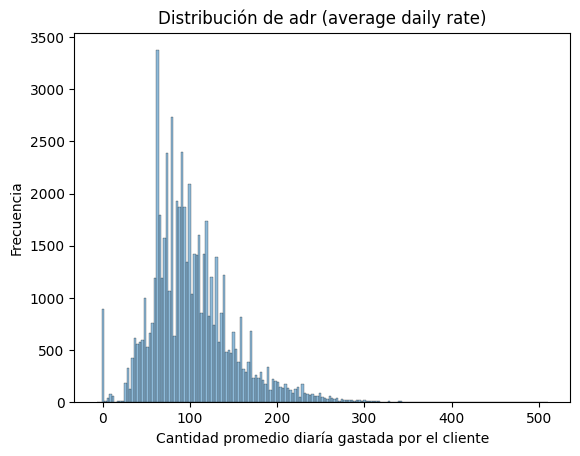

In [116]:
sns.histplot(data=variables_cuantitativas['adr'], alpha = 0.5).set(title="Distribución de adr (average daily rate)",xlabel="Cantidad promedio diaría gastada por el cliente",ylabel="Frecuencia")

Analizemos esta variable con el target.

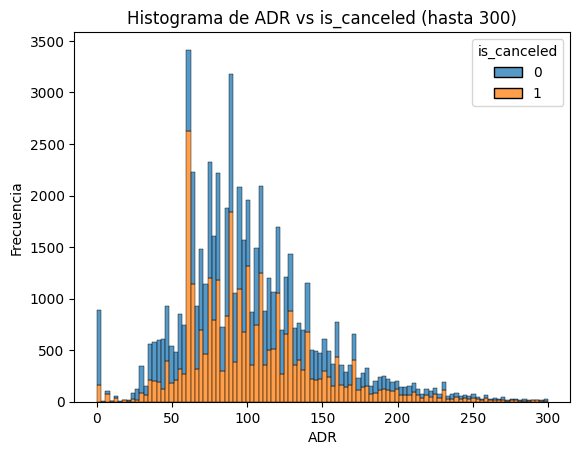

In [117]:
df_filtered = df_hotels_train_copy[df_hotels_train_copy['adr'] <= 300]

# Crear un histograma con dos colores
sns.histplot(data=df_filtered, x='adr', hue='is_canceled', multiple='stack', kde=False)

# Configurar el eje X y Y y el título
plt.xlabel('ADR')
plt.ylabel('Frecuencia')
plt.title('Histograma de ADR vs is_canceled (hasta 300)')

# Mostrar el gráfico
plt.show()

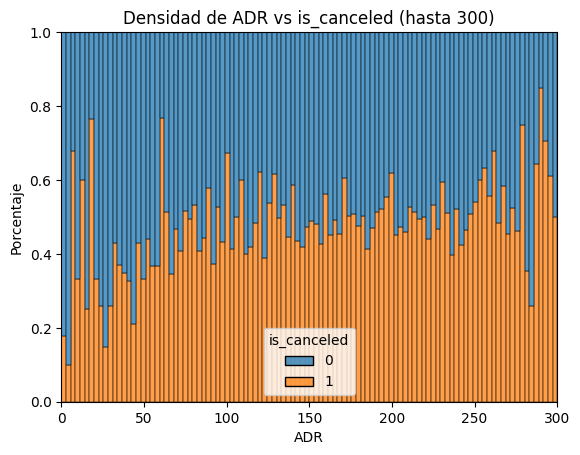

In [118]:
# Filtrar los valores de adr hasta un máximo de 300
df_filtered = df_hotels_train_copy[df_hotels_train_copy['adr'] <= 300]

# Crear un histograma con dos colores, dividido por el número total de observaciones
sns.histplot(data=df_filtered, x='adr', hue='is_canceled', multiple='fill', kde=False, stat='density')

# Configurar el eje X y Y y el título
plt.xlabel('ADR')
plt.ylabel('Porcentaje')
plt.title('Densidad de ADR vs is_canceled (hasta 300)')

# Mostrar el gráfico
plt.show()

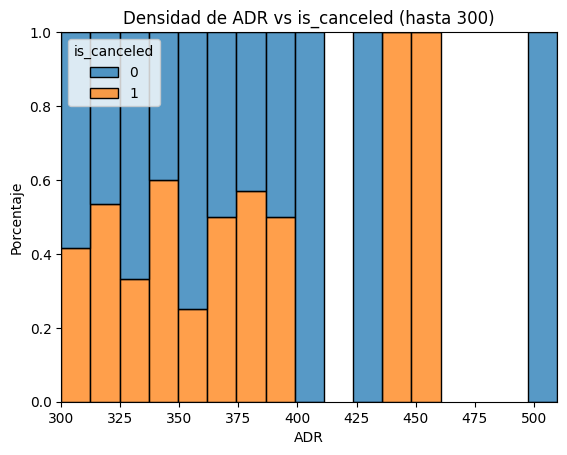

In [119]:
# Filtrar los valores de adrmayor a 300
df_filtered = df_hotels_train_copy[df_hotels_train_copy['adr'] >= 300]

# Crear un histograma con dos colores, dividido por el número total de observaciones
sns.histplot(data=df_filtered, x='adr', hue='is_canceled', multiple='fill', kde=False, stat='density')

# Configurar el eje X y Y y el título
plt.xlabel('ADR')
plt.ylabel('Porcentaje')
plt.title('Densidad de ADR vs is_canceled (hasta 300)')

# Mostrar el gráfico
plt.show()

#### **lead_time**

Esta variable indica el número de días que pasaron entre la fecha de entrada de la reserva al PMS (Property Management System) y la fecha de llegada

In [120]:
variables_cuantitativas.lead_time.value_counts()

0      2714
1      1498
2       882
3       802
4       783
       ... 
371       1
375       1
399       1
424       1
400       1
Name: lead_time, Length: 472, dtype: int64

[Text(0.5, 1.0, 'Distribución de lead time'),
 Text(0.5, 0, 'lead time'),
 Text(0, 0.5, 'Frecuencia')]

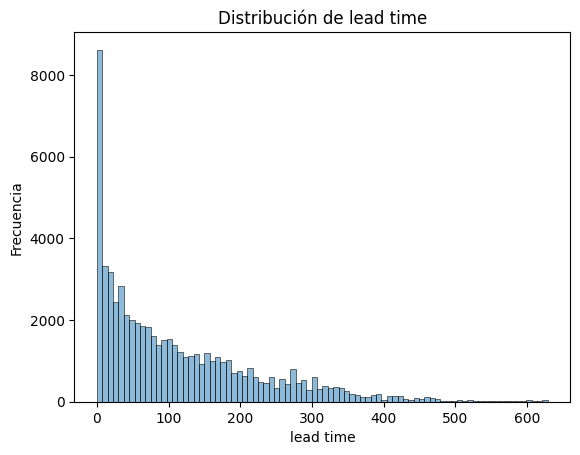

In [121]:
sns.histplot(data=variables_cuantitativas['lead_time'], alpha = 0.5).set(title="Distribución de lead time",xlabel="lead time",ylabel="Frecuencia")

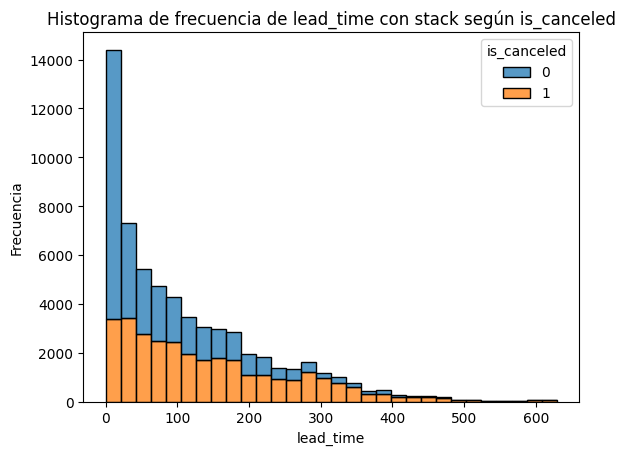

In [122]:
sns.histplot(data=df_hotels_train_copy, x="lead_time", hue="is_canceled", multiple="stack", bins=30)
plt.title("Histograma de frecuencia de lead_time con stack según is_canceled")
plt.xlabel("lead_time")
plt.ylabel("Frecuencia")
plt.show()

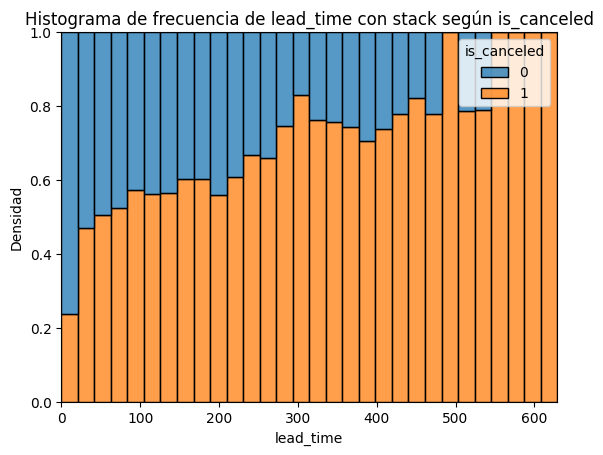

In [123]:
sns.histplot(data=df_hotels_train_copy, x="lead_time", hue="is_canceled", multiple="fill", bins=30, stat='density')
plt.title("Histograma de frecuencia de lead_time con stack según is_canceled")
plt.xlabel("lead_time")
plt.ylabel("Densidad")
plt.show()

En estos dos gráficos podemos observar como a patir que va creciendo el lead time, va creciendo el porcentaje de reservas canceladas.

Text(0, 0.5, 'lead_time')

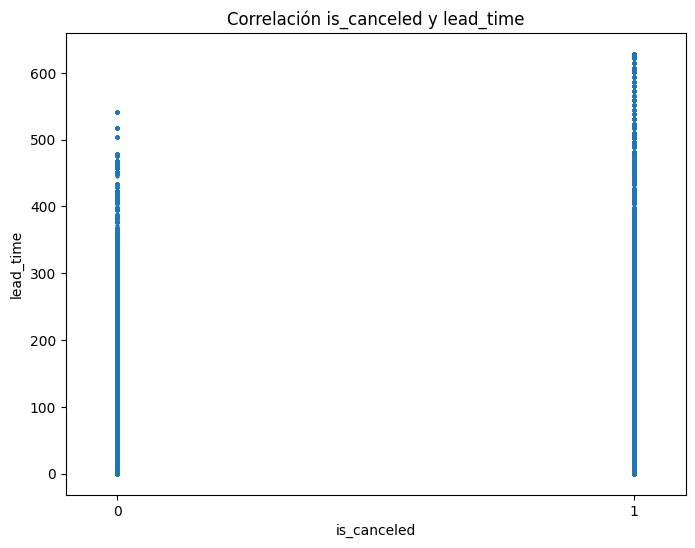

In [124]:

plt.figure(figsize=(8, 6))
plt.scatter(df_hotels_train_copy['is_canceled'], df_hotels_train_copy['lead_time'], s=4)

plt.xticks([0, 1])
plt.xlim(-0.1, 1.1)

plt.title('Correlación is_canceled y lead_time')
plt.xlabel('is_canceled')
plt.ylabel('lead_time')


Podemos ver que a partir de los 400 días aumenta mucho la cantidad la cancelaciones

#### **arrival_date_year** 

Esta variable indica el año de la fecha de llegada

In [125]:
variables_cuantitativas.arrival_date_year.value_counts()

2016    29243
2017    21030
2015    11415
Name: arrival_date_year, dtype: int64

Observamos como la mayor cantidad de arríbos fue en 2016, pero en esta variable hay que tener en cuenta que los datos son desde el 1 de Julio de 2015 hasta el 31 de Agosto de 2017. Sabiendo esto 2017 tiene una cantidad considerable de arribos, para estar englobado en una cantidad menor de meses. Sería quizas interesante mas adelante calcular la cantidad de arribos por mes.

<Axes: title={'center': 'Gráfico de barras variable arrival date year '}, xlabel='Año', ylabel='Frecuencia'>

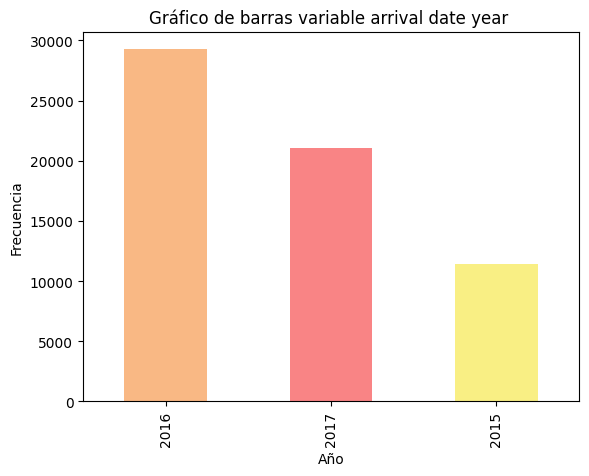

In [126]:
colores=[(0.960, 0.447, 0.039),(0.960, 0.039, 0.050), (0.960, 0.878, 0.039)]
variables_cuantitativas.arrival_date_year.value_counts().plot.bar(alpha=0.5 , color=colores, title="Gráfico de barras variable arrival date year " , xlabel="Año" , ylabel="Frecuencia")

Analizemos esta variable contra el target

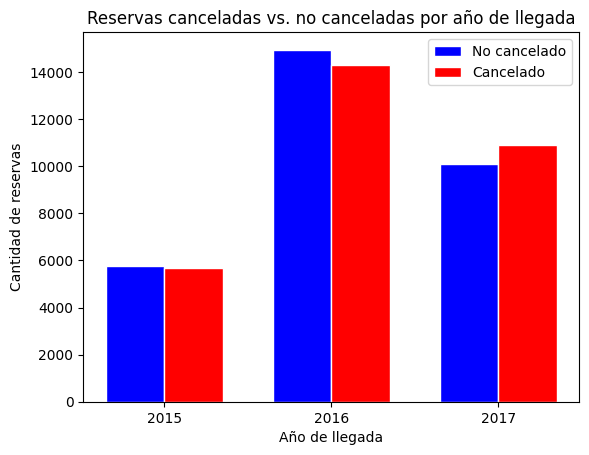

In [127]:
# Agrupar el dataframe por año de llegada y variable de cancelación, contar el número de reservas en cada grupo
grouped = variables_cuantitativas.groupby(['arrival_date_year', 'is_canceled']).size().reset_index(name='count')

# Crear una matriz que tenga los valores de cancelación y no cancelación para cada año
years = np.sort(variables_cuantitativas['arrival_date_year'].unique())
cancel_data = []
no_cancel_data = []

for year in years:
    cancel_count = grouped[(grouped['arrival_date_year'] == year) & (grouped['is_canceled'] == 1)]['count'].values
    no_cancel_count = grouped[(grouped['arrival_date_year'] == year) & (grouped['is_canceled'] == 0)]['count'].values
    if len(cancel_count) > 0:
        cancel_data.append(cancel_count[0])
    else:
        cancel_data.append(0)
    if len(no_cancel_count) > 0:
        no_cancel_data.append(no_cancel_count[0])
    else:
        no_cancel_data.append(0)

# Crear el gráfico de barras
barWidth = 0.35
r1 = np.arange(len(years))
r2 = [x + barWidth for x in r1]
plt.bar(r1, no_cancel_data, color='blue', width=barWidth, edgecolor='white', label='No cancelado')
plt.bar(r2, cancel_data, color='red', width=barWidth, edgecolor='white', label='Cancelado')

# Personalizar el gráfico
plt.xlabel('Año de llegada')
plt.ylabel('Cantidad de reservas')
plt.xticks([r + barWidth/2 for r in range(len(years))], years)
plt.title('Reservas canceladas vs. no canceladas por año de llegada')
plt.legend()
plt.show()

El año de llegada, almenos como variable unidimensional, no nos aporta mucho para diferenciar entre si una reserva fue cancelada o no.

#### **arrival_date_week_number**

Esta variable indica el número de semana de la fecha de llegada

In [128]:
variables_cuantitativas.arrival_date_week_number.max()

53

In [129]:
variables_cuantitativas.arrival_date_week_number.value_counts()

33    1869
30    1606
18    1603
32    1596
17    1546
34    1533
28    1486
21    1465
20    1464
38    1454
41    1447
42    1434
29    1421
25    1409
31    1394
15    1377
22    1370
39    1364
23    1359
27    1356
24    1351
35    1304
40    1268
13    1255
16    1249
26    1231
43    1219
19    1195
14    1184
8     1167
37    1163
44    1158
36    1151
10    1083
9     1077
7     1068
45    1034
11    1025
12     987
53     966
49     914
46     833
47     779
50     776
4      725
6      724
48     720
3      662
5      649
2      640
52     572
1      549
51     457
Name: arrival_date_week_number, dtype: int64

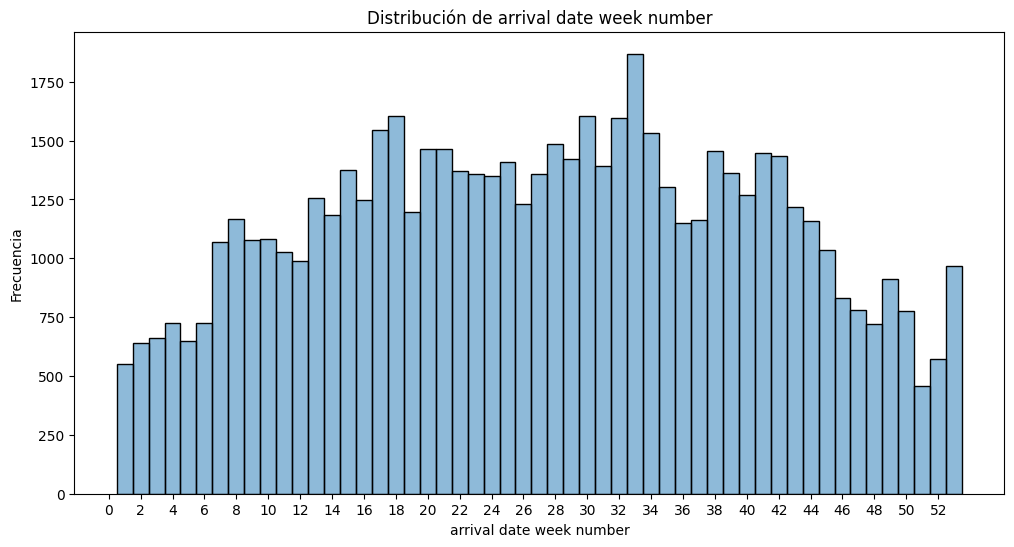

In [130]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=variables_cuantitativas['arrival_date_week_number'], alpha = 0.5, discrete=True).set(title="Distribución de arrival date week number",xlabel="arrival date week number",ylabel="Frecuencia")
ax.set_xticks(range(0, 54, 2))

Analizemos esta variable vs el target

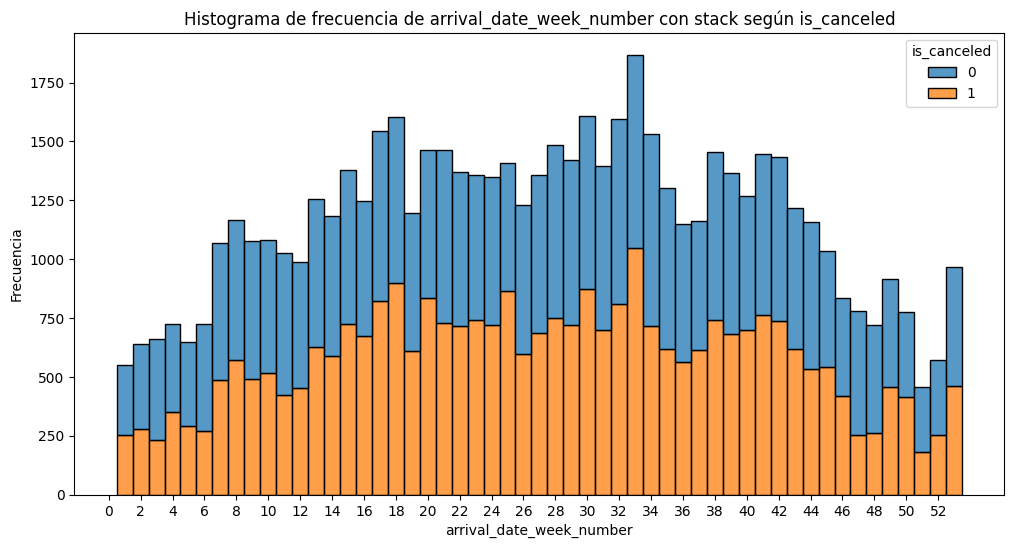

In [131]:
# Set the plot size with subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram with the discrete variable and x-axis ticks
sns.histplot(data=df_hotels_train_copy, x="arrival_date_week_number", hue="is_canceled", multiple="stack", bins=30, discrete=True, ax=ax)
ax.set_title("Histograma de frecuencia de arrival_date_week_number con stack según is_canceled")
ax.set_xlabel("arrival_date_week_number")
ax.set_ylabel("Frecuencia")
ax.set_xticks(range(0, 54, 2))
plt.show()

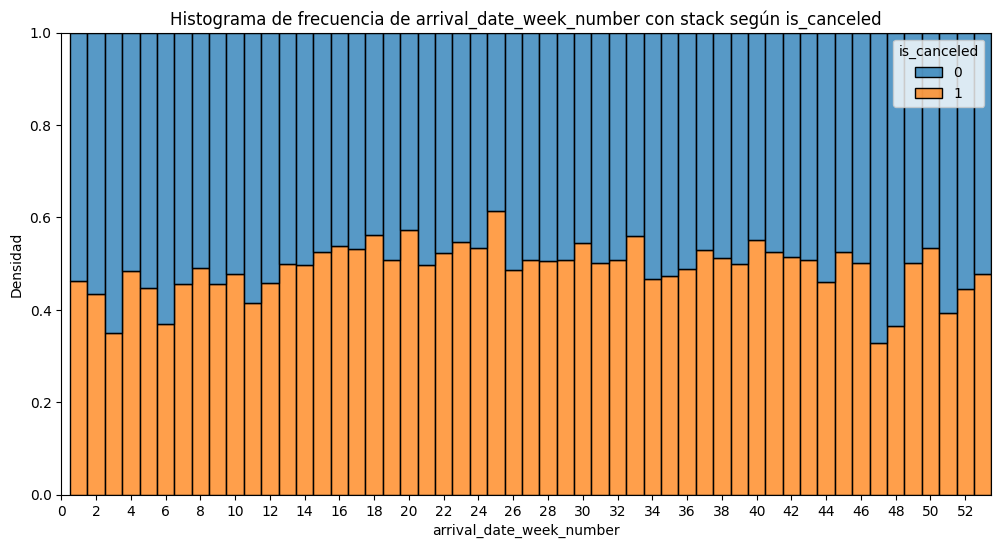

In [132]:
# Set the plot size with subplots
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data=df_hotels_train_copy, x="arrival_date_week_number", hue="is_canceled", discrete=True, multiple="fill", bins=30, stat='density')
plt.title("Histograma de frecuencia de arrival_date_week_number con stack según is_canceled")
plt.xlabel("arrival_date_week_number")
plt.ylabel("Densidad")
plt.xticks(range(0, 54, 2))
plt.show()

#### **arrival_date_day_of_month** 

Esta variable indica la fecha del dia del mes de llegada

In [133]:
variables_cuantitativas.arrival_date_day_of_month.value_counts()

17    2299
5     2258
15    2178
16    2172
9     2163
26    2149
12    2116
25    2105
19    2073
2     2072
20    2070
28    2070
24    2063
8     2049
3     2026
30    2021
18    2015
27    2009
14    2001
6     1959
7     1945
4     1930
1     1901
21    1894
13    1892
22    1876
29    1845
23    1841
10    1803
11    1768
31    1125
Name: arrival_date_day_of_month, dtype: int64

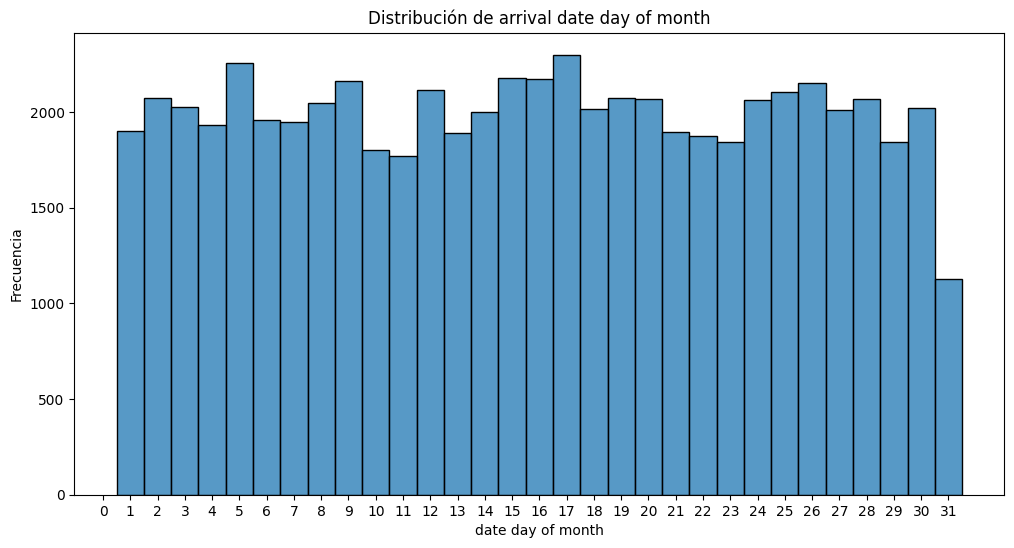

In [134]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=variables_cuantitativas['arrival_date_day_of_month'], discrete=True).set(title="Distribución de arrival date day of month",xlabel="date day of month",ylabel="Frecuencia")
plt.xticks(range(0, 32))
plt.show()

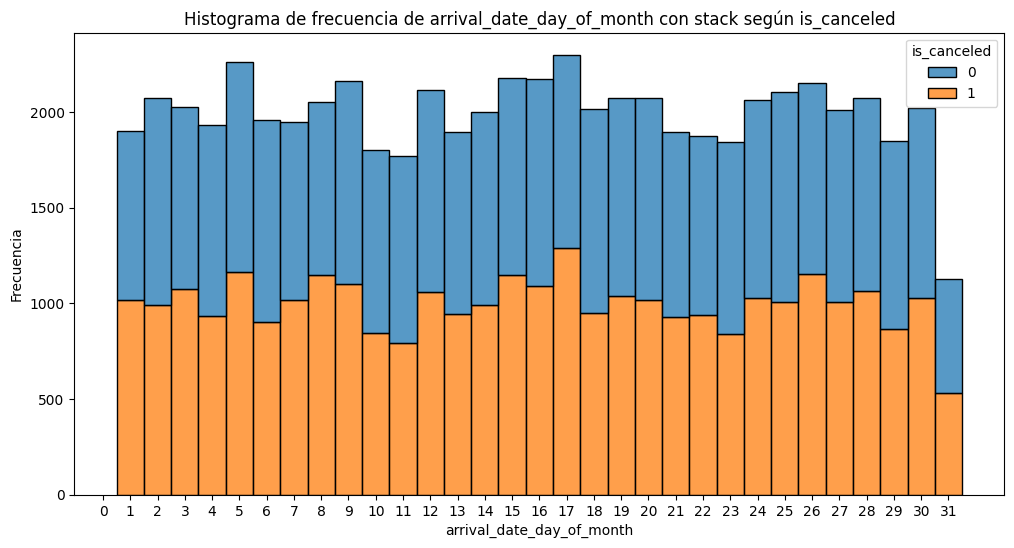

In [135]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df_hotels_train_copy, x="arrival_date_day_of_month", hue="is_canceled", discrete=True, multiple="stack", bins=30)
plt.title("Histograma de frecuencia de arrival_date_day_of_month con stack según is_canceled")
plt.xlabel("arrival_date_day_of_month")
plt.ylabel("Frecuencia")
plt.xticks(range(0, 32))
plt.show()

En densidad

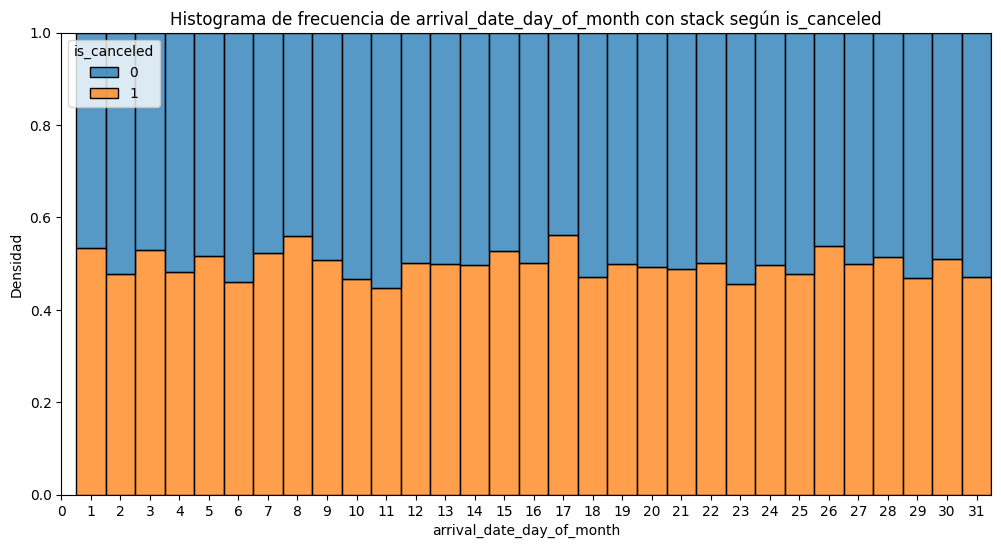

In [136]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df_hotels_train_copy, x="arrival_date_day_of_month", discrete=True, hue="is_canceled", multiple="fill", bins=30, stat='density')
plt.title("Histograma de frecuencia de arrival_date_day_of_month con stack según is_canceled")
plt.xlabel("arrival_date_day_of_month")
plt.ylabel("Densidad")
plt.xticks(range(0, 32))
plt.show()

Esta bastante balanceado.

#### **stays_in_weekend_nights** 

Esta variable indica la cantidad de noches de fin de semana en la reserva

In [137]:
variables_cuantitativas.stays_in_weekend_nights.value_counts()

0     26905
2     17213
1     15820
4       933
3       632
6        82
5        41
8        36
7        13
9         6
10        3
12        3
16        1
Name: stays_in_weekend_nights, dtype: int64

Es el único huesped que se quedó 16 días de fines de semana en una reserva.
Vemos como 12 días de fin de semana ya es un valor menos típico pero que se repite.

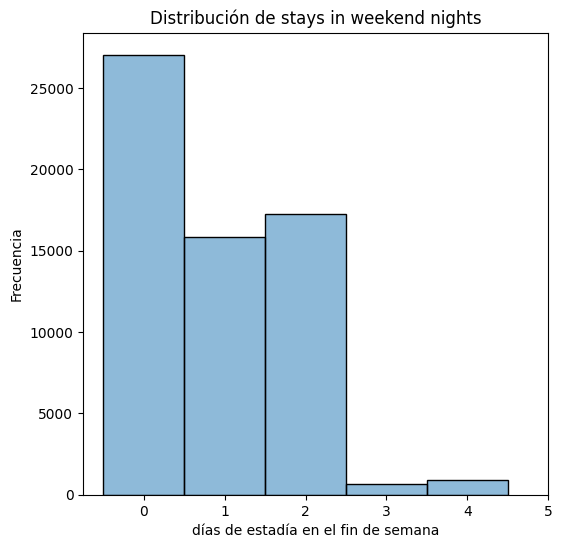

In [138]:
#Graficamos los registros con menos de 5 días de estadía en los fines de semana para visualizar mejor
df_filtrado_fines_de_semana = df_hotels_train_original[df_hotels_train_original['stays_in_weekend_nights'] < 5]
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(data=df_filtrado_fines_de_semana['stays_in_weekend_nights'], discrete=True, alpha = 0.5).set(title="Distribución de stays in weekend nights",xlabel="días de estadía en el fin de semana",ylabel="Frecuencia")
plt.xticks(range(0, 6))
plt.show()

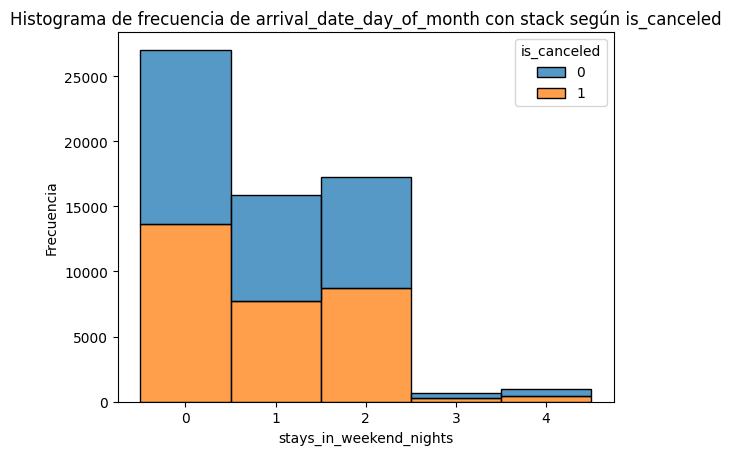

In [139]:
sns.histplot(data=df_filtrado_fines_de_semana, discrete=True, x="stays_in_weekend_nights", hue="is_canceled", multiple="stack")
plt.title("Histograma de frecuencia de arrival_date_day_of_month con stack según is_canceled")
plt.xlabel("stays_in_weekend_nights")
plt.ylabel("Frecuencia")
plt.show()

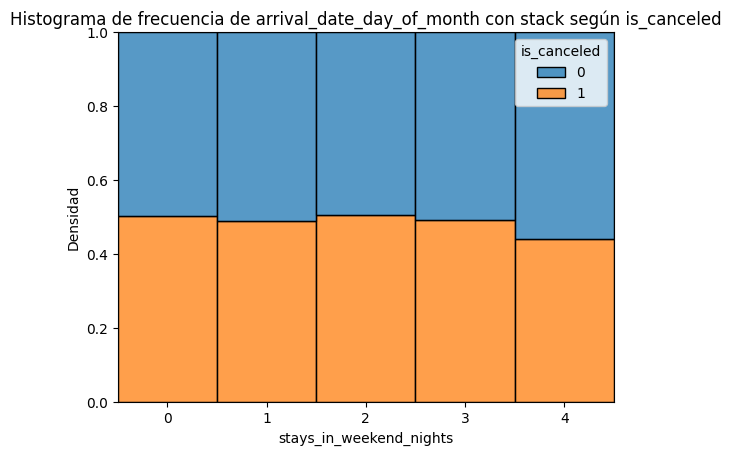

In [140]:
sns.histplot(data=df_filtrado_fines_de_semana, discrete=True, x="stays_in_weekend_nights", hue="is_canceled", multiple="fill", stat='density')
plt.title("Histograma de frecuencia de arrival_date_day_of_month con stack según is_canceled")
plt.xlabel("stays_in_weekend_nights")
plt.ylabel("Densidad")
plt.show()

Observamos que esta balanceado en cuanto a cancelaciones

#### **stays_in_week_nights**

Esta variable indica la cantidad de noches de semana en la reserva

In [141]:
variables_cuantitativas.stays_in_week_nights.value_counts()

2     17986
1     15338
3     11554
5      5640
4      4976
0      3683
6       792
7       528
10      506
8       344
9       122
15       48
12       28
11       26
19       23
14       23
20       21
13       11
21       10
16        9
22        6
25        3
18        3
30        3
17        2
24        2
40        1
Name: stays_in_week_nights, dtype: int64

[Text(0.5, 1.0, 'Distribución de stays in week nights'),
 Text(0.5, 0, 'días de estadía en la semana'),
 Text(0, 0.5, 'Frecuencia')]

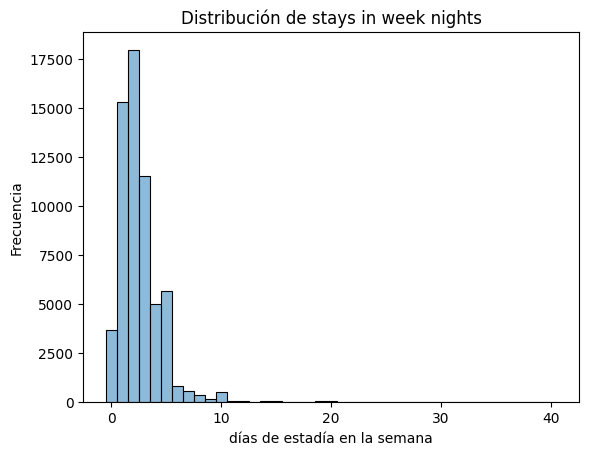

In [142]:
sns.histplot(data=variables_cuantitativas['stays_in_week_nights'], discrete=True, alpha = 0.5).set(title="Distribución de stays in week nights",xlabel="días de estadía en la semana",ylabel="Frecuencia")

<ipython-input-143-43372fe6ec53>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado_semana = variables_cuantitativas[df_hotels_train_original['stays_in_week_nights'] < 20]


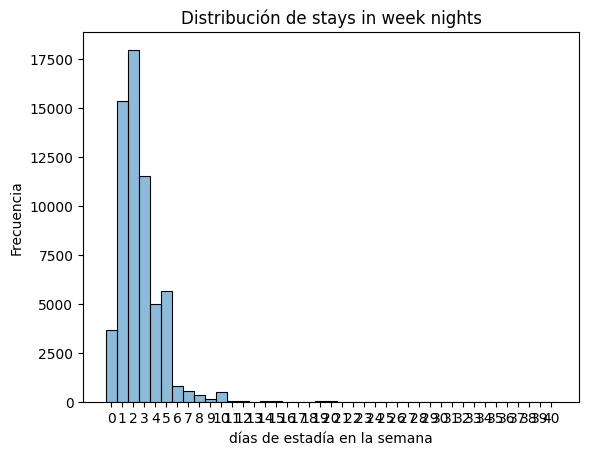

In [143]:
#Graficamos solo los registros con menos de 20 días para visualizar mejor el gráfico
df_filtrado_semana = variables_cuantitativas[df_hotels_train_original['stays_in_week_nights'] < 20]
ax = sns.histplot(data=df_filtrado_semana['stays_in_week_nights'], discrete=True, alpha = 0.5)
ax.set(title="Distribución de stays in week nights", xlabel="días de estadía en la semana", ylabel="Frecuencia")

xticks = range(df_filtrado_semana['stays_in_week_nights'].min(), df_filtrado_semana['stays_in_week_nights'].max()+1)
plt.xticks(xticks, [str(x) for x in xticks])

plt.show()

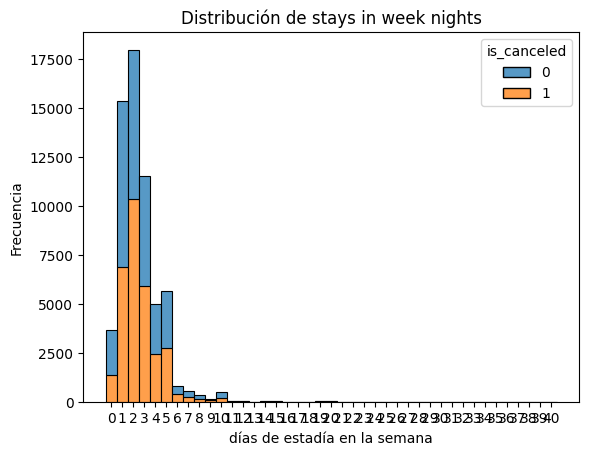

In [144]:
ax = sns.histplot(data=df_filtrado_semana, discrete=True, x="stays_in_week_nights", hue="is_canceled", multiple="stack")
plt.title("Histograma de frecuencia de arrival_date_day_of_month con stack según is_canceled")
ax.set(title="Distribución de stays in week nights", xlabel="días de estadía en la semana", ylabel="Frecuencia")

xticks = range(df_filtrado_semana['stays_in_week_nights'].min(), df_filtrado_semana['stays_in_week_nights'].max()+1)
plt.xticks(xticks, [str(x) for x in xticks])
plt.ylabel("Frecuencia")
plt.show()

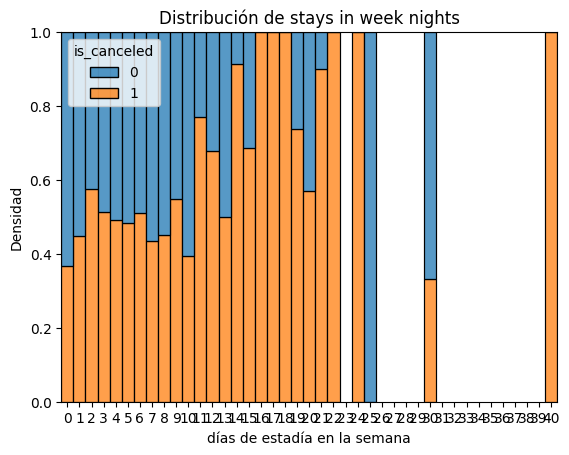

In [145]:
ax = sns.histplot(data=df_filtrado_semana, discrete=True, x="stays_in_week_nights", hue="is_canceled", multiple="fill", stat='density')
plt.title("Histograma de frecuencia de arrival_date_day_of_month con stack según is_canceled")
ax.set(title="Distribución de stays in week nights", xlabel="días de estadía en la semana", ylabel="Frecuencia")

xticks = range(df_filtrado_semana['stays_in_week_nights'].min(), df_filtrado_semana['stays_in_week_nights'].max()+1)
plt.xticks(xticks, [str(x) for x in xticks])
plt.ylabel("Densidad")
plt.show()

Vemos como en tendecia a su vez que aumentan los días de estadía aumenta el porcentaje de cancelamiento. Pero a su vez, a la vez que aumentan los días de estadía hay menos cantidad de reservas. Por lo que es cada vez menos valiosa esa información.

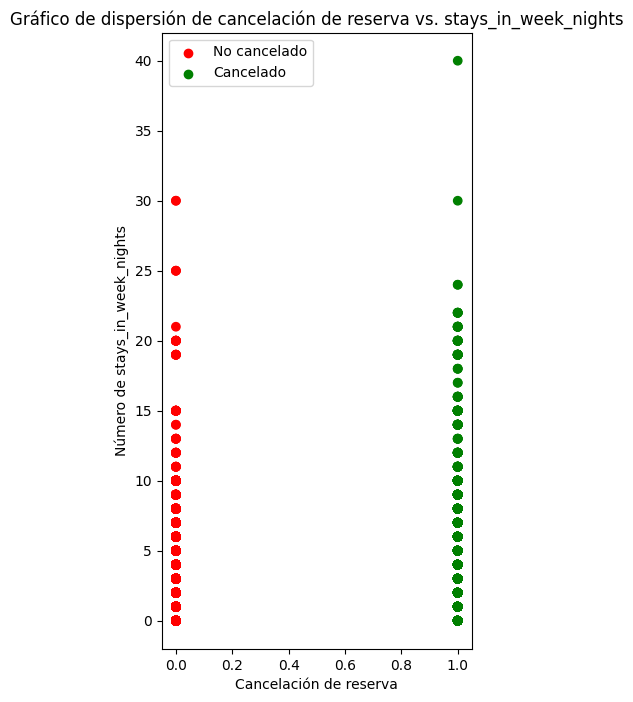

In [146]:
# Crear una lista de colores basado en los valores de la variable is_canceled
colors = ['red' if c == 0 else 'green' for c in df_hotels_train_copy['is_canceled']]

plt.figure(figsize=(4, 8))
# Crear el scatter plot con los valores de la variable "is_canceled" en el eje x y la variable "adults" en el eje y
plt.scatter(df_hotels_train_copy['is_canceled'], df_hotels_train_copy['stays_in_week_nights'], c=colors)

# Personalizar el gráfico
red_patch = plt.scatter([], [], c='red', label='No cancelado')
green_patch = plt.scatter([], [], c='green', label='Cancelado')
plt.legend(handles=[red_patch, green_patch], loc='upper left')
plt.title('Gráfico de dispersión de cancelación de reserva vs. stays_in_week_nights')
plt.xlabel('Cancelación de reserva')
plt.ylabel('Número de stays_in_week_nights')

plt.show()

#### **adults**

Esta variable indica la cantidad de adultos en la reserva

In [147]:
variables_cuantitativas.adults.value_counts()

2     46869
1     11427
3      3159
0       192
4        30
26        3
5         2
40        1
20        1
6         1
10        1
27        1
55        1
Name: adults, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable adults'}, xlabel='Cantidad de adultos', ylabel='Frecuencia'>

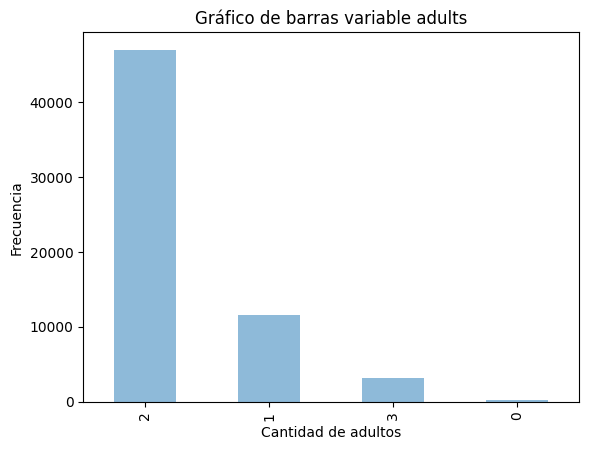

In [148]:
#No es discreta con la suficiente granularidad para hacer un histograma
df_filtrado_adults = df_hotels_train_original[df_hotels_train_original['adults'] < 4]
df_filtrado_adults['adults'].value_counts().plot.bar(alpha=0.5, title="Gráfico de barras variable adults" , xlabel="Cantidad de adultos" , ylabel="Frecuencia")

Analizemos contra la variable target

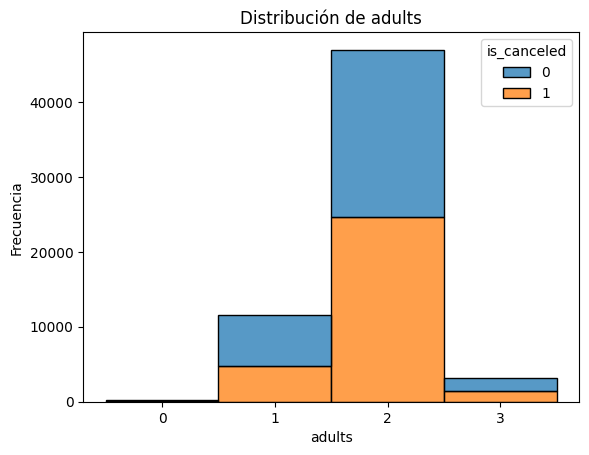

In [149]:
ax = sns.histplot(data=df_filtrado_adults, discrete=True, x="adults", hue="is_canceled", multiple="stack")
plt.title("Histograma de frecuencia de adults con stack según is_canceled")
ax.set(title="Distribución de adults", xlabel="adults", ylabel="Frecuencia")

xticks = range(df_filtrado_adults['adults'].min(), df_filtrado_adults['adults'].max()+1)
plt.xticks(xticks, [str(x) for x in xticks])
plt.ylabel("Frecuencia")
plt.show()

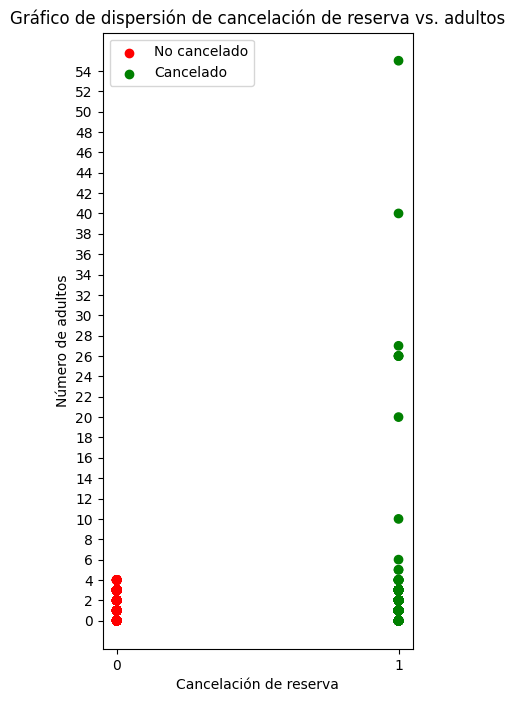

In [150]:
# Crear una lista de colores basado en los valores de la variable is_canceled
colors = ['red' if c == 0 else 'green' for c in df_hotels_train_copy['is_canceled']]

plt.figure(figsize=(4, 8))
# Crear el scatter plot con los valores de la variable "is_canceled" en el eje x y la variable "adults" en el eje y
plt.scatter(df_hotels_train_copy['is_canceled'], df_hotels_train_copy['adults'], c=colors)

# Personalizar el gráfico
red_patch = plt.scatter([], [], c='red', label='No cancelado')
green_patch = plt.scatter([], [], c='green', label='Cancelado')
plt.legend(handles=[red_patch, green_patch], loc='upper left')
plt.title('Gráfico de dispersión de cancelación de reserva vs. adultos')
plt.xlabel('Cancelación de reserva')
plt.ylabel('Número de adultos')

yticks = range(df_hotels_train_copy['adults'].min(), df_hotels_train_copy['adults'].max()+1, 2)
plt.yticks(yticks, [str(x) for x in yticks])
plt.xticks([0,1])

plt.show()

Podemos observar como siempre a partir de los 10 adultos para arriba las reservas son canceladas. Este atributo tiene una información que será bastante valiosa para ayudarnos a predecir la cancelación o no de una reserva.

#### **children**

Esta variable indica la cantidad de chicos en la reserva

In [151]:
variables_cuantitativas.children.value_counts()

0.0     57238
1.0      2455
2.0      1955
3.0        39
10.0        1
Name: children, dtype: int64

[Text(0.5, 1.0, 'Distribución de children'),
 Text(0.5, 0, 'cantidad de niños en una reserva'),
 Text(0, 0.5, 'Frecuencia')]

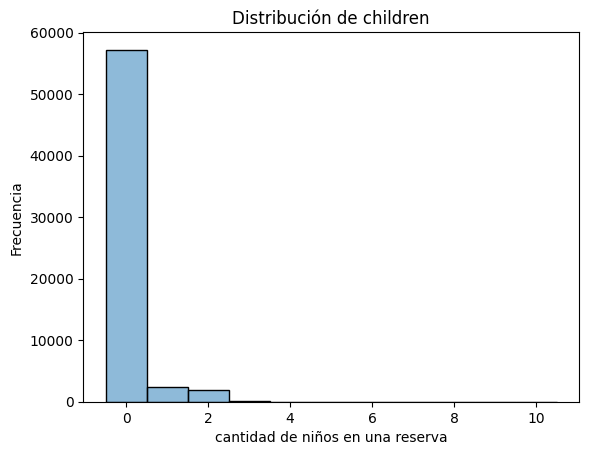

In [152]:
sns.histplot(data=variables_cuantitativas['children'], discrete=True, alpha = 0.5).set(title="Distribución de children",xlabel="cantidad de niños en una reserva",ylabel="Frecuencia")

Analizemos esta variable con el target

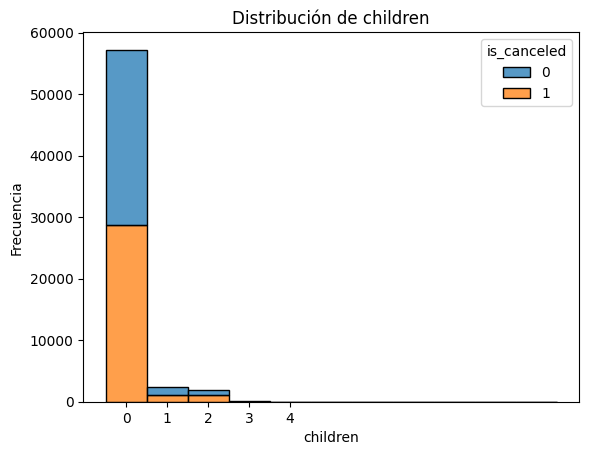

In [153]:
ax = sns.histplot(data=variables_cuantitativas, discrete=True, x="children", hue="is_canceled", multiple="stack")
plt.title("Histograma de frecuencia de children con stack según is_canceled")
ax.set(title="Distribución de children", xlabel="children", ylabel="Frecuencia")

xticks = range(0,5)
plt.xticks(xticks, [str(x) for x in xticks])
plt.ylabel("Frecuencia")
plt.show()

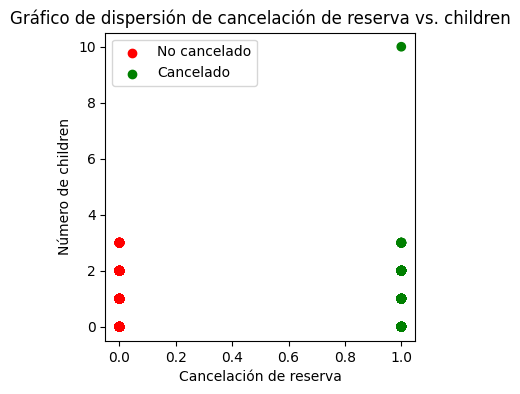

In [154]:
# Crear una lista de colores basado en los valores de la variable is_canceled
colors = ['red' if c == 0 else 'green' for c in df_hotels_train_copy['is_canceled']]

plt.figure(figsize=(4, 4))
# Crear el scatter plot con los valores de la variable "is_canceled" en el eje x y la variable "adults" en el eje y
plt.scatter(df_hotels_train_copy['is_canceled'], df_hotels_train_copy['children'], c=colors)

# Personalizar el gráfico
red_patch = plt.scatter([], [], c='red', label='No cancelado')
green_patch = plt.scatter([], [], c='green', label='Cancelado')
plt.legend(handles=[red_patch, green_patch], loc='upper left')
plt.title('Gráfico de dispersión de cancelación de reserva vs. children')
plt.xlabel('Cancelación de reserva')
plt.ylabel('Número de children')
plt.show()

#### **babies** 

Esta variable indica la cantidad de bebes en una reserva

In [155]:
variables_cuantitativas.babies.value_counts()

0    61260
1      420
2        7
9        1
Name: babies, dtype: int64

[Text(0.5, 1.0, 'Distribución de baby'),
 Text(0.5, 0, 'cantidad de bebes en una reserva'),
 Text(0, 0.5, 'Frecuencia')]

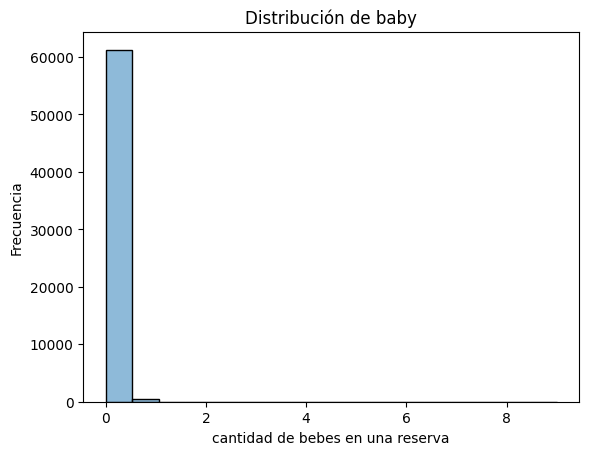

In [156]:
sns.histplot(data=variables_cuantitativas['babies'], alpha = 0.5).set(title="Distribución de baby",xlabel="cantidad de bebes en una reserva",ylabel="Frecuencia")

Analizemos esta variable contra el target

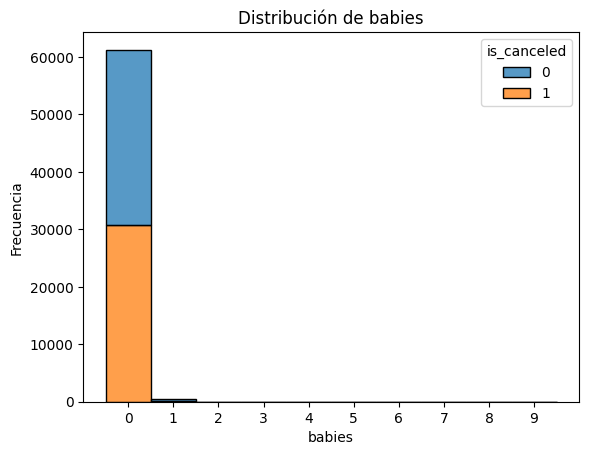

In [157]:
ax = sns.histplot(data=variables_cuantitativas, discrete=True, x="babies", hue="is_canceled", multiple="stack")
plt.title("Histograma de frecuencia de babies con stack según is_canceled")
ax.set(title="Distribución de babies", xlabel="babies", ylabel="Frecuencia")

xticks = range(variables_cuantitativas['babies'].min(), variables_cuantitativas['babies'].max()+1)
plt.xticks(xticks, [str(x) for x in xticks])
plt.ylabel("Frecuencia")
plt.show()

#### **previous_cancellations**

Esta variable indica la cantidad de cancelaciones previas de una reserva que realizo un mismo huesped

In [158]:
variables_cuantitativas.previous_cancellations.value_counts()

0     57317
1      4115
2        60
24       36
3        34
26       20
19       17
4        16
25       16
11       15
14       12
6        12
5         9
13        8
21        1
Name: previous_cancellations, dtype: int64

In [159]:
variables_cuantitativas.previous_cancellations.describe()

count    61688.000000
mean         0.114820
std          0.995343
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64

Analizemos esta variable contra el target

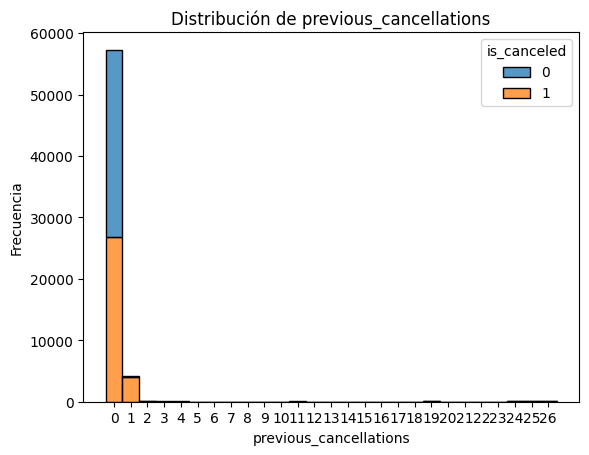

In [160]:
ax = sns.histplot(data=variables_cuantitativas, discrete=True, x="previous_cancellations", hue="is_canceled", multiple="stack")
plt.title("Histograma de frecuencia de previous_cancellations con stack según is_canceled")
ax.set(title="Distribución de previous_cancellations", xlabel="previous_cancellations", ylabel="Frecuencia")

xticks = range(variables_cuantitativas['previous_cancellations'].min(), variables_cuantitativas['previous_cancellations'].max()+1)
plt.xticks(xticks, [str(x) for x in xticks])
plt.ylabel("Frecuencia")
plt.show()

  Se aprecia como a partir de las 12 cancelaciones previas las reservas siempre son canceladas.

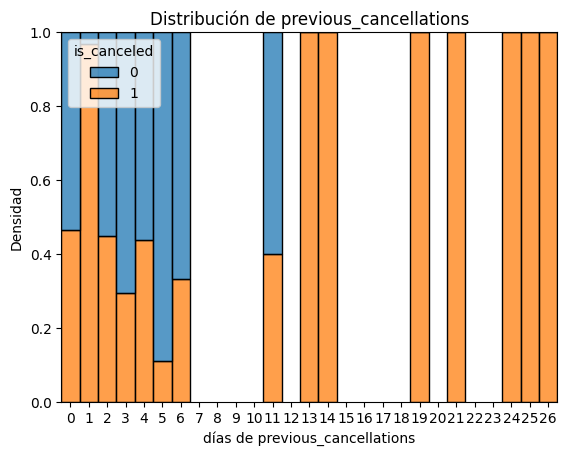

In [161]:
ax = sns.histplot(data=df_filtrado_semana, discrete=True, x="previous_cancellations", hue="is_canceled", multiple="fill", stat='density')
plt.title("Histograma de frecuencia de previous_cancellations con stack según is_canceled")
ax.set(title="Distribución de previous_cancellations", xlabel="días de previous_cancellations", ylabel="Frecuencia")

xticks = range(df_filtrado_semana['previous_cancellations'].min(), df_filtrado_semana['previous_cancellations'].max()+1)
plt.xticks(xticks, [str(x) for x in xticks])
plt.ylabel("Densidad")
plt.show()

#### **previous_bookings_not_canceled**

Variable que indica la cantidad de reservas previas por el cliente que no fueron canceladas.

In [162]:
variables_cuantitativas.previous_bookings_not_canceled.value_counts()

0     60244
1       592
2       237
3       135
4        97
5        76
6        41
8        28
7        28
9        23
10       23
11       21
13       19
12       14
14       12
25       10
15        9
17        7
24        6
18        5
20        5
22        5
26        5
16        4
19        4
28        4
21        4
27        3
29        3
23        2
58        2
56        1
32        1
69        1
63        1
36        1
59        1
31        1
49        1
30        1
50        1
41        1
43        1
61        1
55        1
33        1
70        1
38        1
62        1
40        1
64        1
Name: previous_bookings_not_canceled, dtype: int64

In [163]:
variables_cuantitativas.previous_bookings_not_canceled.describe()

count    61688.000000
mean         0.111561
std          1.389375
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: previous_bookings_not_canceled, dtype: float64

Analizemos esta variable vs el target

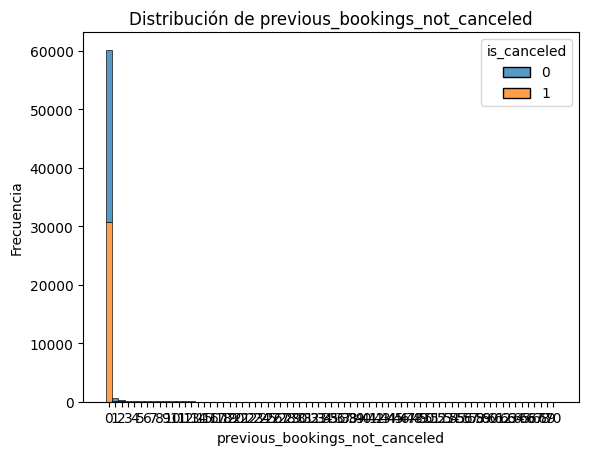

In [164]:
ax = sns.histplot(data=variables_cuantitativas, discrete=True, x="previous_bookings_not_canceled", hue="is_canceled", multiple="stack")
plt.title("Histograma de frecuencia de previous_bookings_not_canceled con stack según is_canceled")
ax.set(title="Distribución de previous_bookings_not_canceled", xlabel="previous_bookings_not_canceled", ylabel="Frecuencia")

xticks = range(variables_cuantitativas['previous_bookings_not_canceled'].min(), variables_cuantitativas['previous_bookings_not_canceled'].max()+1)
plt.xticks(xticks, [str(x) for x in xticks])
plt.ylabel("Frecuencia")
plt.show()

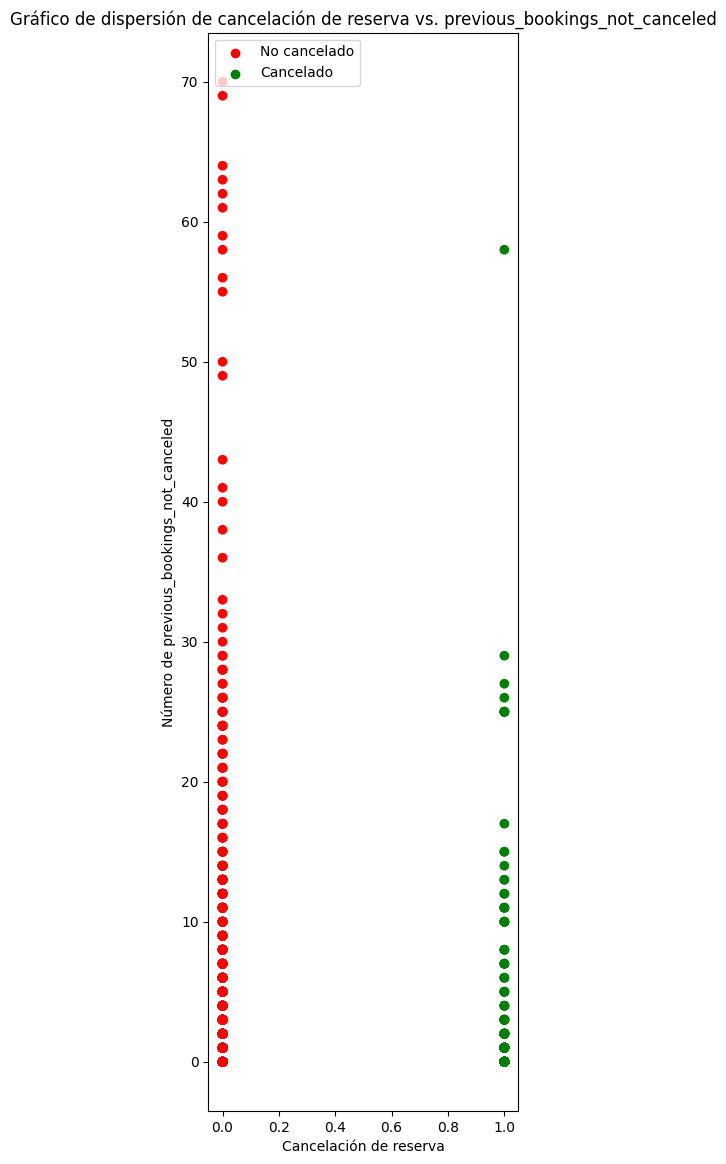

In [165]:
# Crear una lista de colores basado en los valores de la variable is_canceled
colors = ['red' if c == 0 else 'green' for c in df_hotels_train_copy['is_canceled']]

plt.figure(figsize=(4, 14))
# Crear el scatter plot con los valores de la variable "is_canceled" en el eje x y la variable "adults" en el eje y
plt.scatter(df_hotels_train_copy['is_canceled'], df_hotels_train_copy['previous_bookings_not_canceled'], c=colors)

# Personalizar el gráfico
red_patch = plt.scatter([], [], c='red', label='No cancelado')
green_patch = plt.scatter([], [], c='green', label='Cancelado')
plt.legend(handles=[red_patch, green_patch], loc='upper left')
plt.title('Gráfico de dispersión de cancelación de reserva vs. previous_bookings_not_canceled')
plt.xlabel('Cancelación de reserva')
plt.ylabel('Número de previous_bookings_not_canceled')

plt.show()

En este caso observamos como a partir de una cantidad de previas reservas no canceladas mayor a 31 hay una sola fila con is_canceled true.
Analizemos esa resrva

#### **booking_changes**

Esta variable indica la cantidad de cambios en una misma reserva

In [166]:
variables_cuantitativas.booking_changes.value_counts()

0     53407
1      5790
2      1791
3       407
4       163
5        58
6        32
7        16
8        10
13        3
10        3
9         2
14        2
12        1
15        1
17        1
11        1
Name: booking_changes, dtype: int64

[Text(0.5, 1.0, 'Distribución de booking changes'),
 Text(0.5, 0, 'cambios en reservas'),
 Text(0, 0.5, 'Frecuencia')]

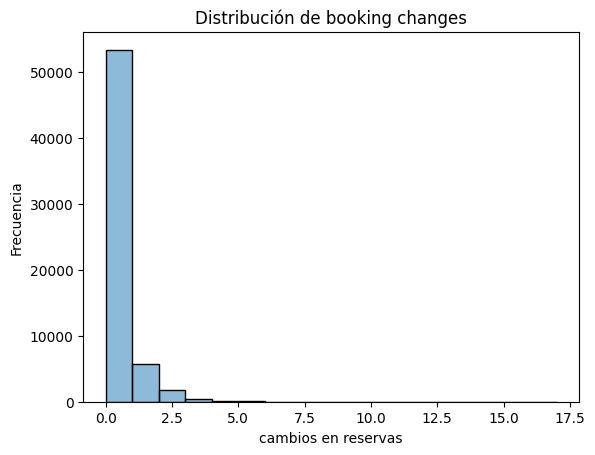

In [167]:
sns.histplot(data=variables_cuantitativas['booking_changes'],alpha = 0.5).set(title="Distribución de booking changes",xlabel="cambios en reservas",ylabel="Frecuencia")

Analizemos la variable contra el target

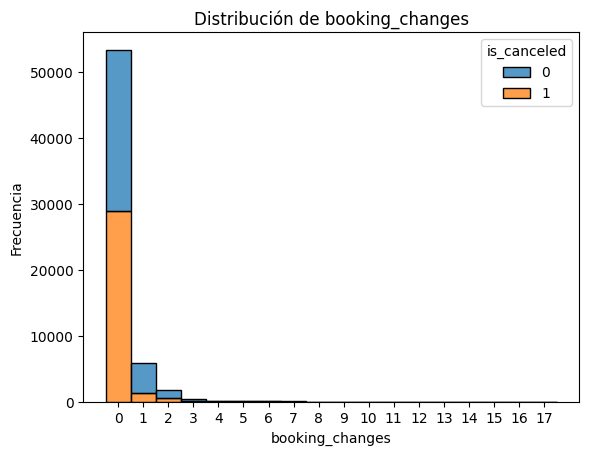

In [168]:
ax = sns.histplot(data=variables_cuantitativas, discrete=True, x="booking_changes", hue="is_canceled", multiple="stack")
plt.title("Histograma de frecuencia de booking_changes con stack según is_canceled")
ax.set(title="Distribución de booking_changes", xlabel="booking_changes", ylabel="Frecuencia")

xticks = range(variables_cuantitativas['booking_changes'].min(), variables_cuantitativas['booking_changes'].max()+1)
plt.xticks(xticks, [str(x) for x in xticks])
plt.ylabel("Frecuencia")
plt.show()

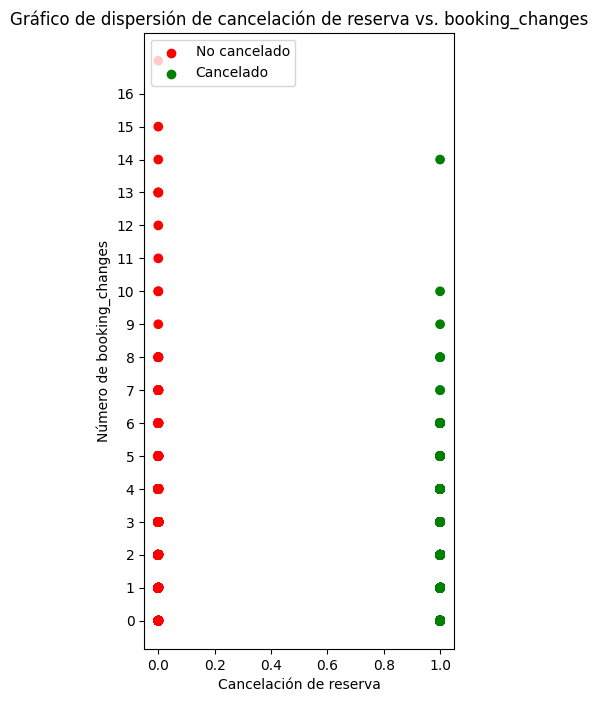

In [169]:
# Crear una lista de colores basado en los valores de la variable is_canceled
colors = ['red' if c == 0 else 'green' for c in df_hotels_train_copy['is_canceled']]

plt.figure(figsize=(4, 8))
# Crear el scatter plot con los valores de la variable "is_canceled" en el eje x y la variable "adults" en el eje y
plt.scatter(df_hotels_train_copy['is_canceled'], df_hotels_train_copy['booking_changes'], c=colors)

# Personalizar el gráfico
red_patch = plt.scatter([], [], c='red', label='No cancelado')
green_patch = plt.scatter([], [], c='green', label='Cancelado')
plt.legend(handles=[red_patch, green_patch], loc='upper left')
plt.title('Gráfico de dispersión de cancelación de reserva vs. booking_changes')
plt.xlabel('Cancelación de reserva')
plt.ylabel('Número de booking_changes')
plt.yticks(range(17))
plt.show()

Analizemos esta variable con el target

####**booking_changes_boolean**

Creamos una nueva variable: Determina si se hizo por lo menos un cambio en la reserva.

In [170]:

funcion_binaria_changes= lambda x: 1 if x > 0 else 0


df_hotels_train_copy['booking_changes_boolean'] = df_hotels_train_copy['booking_changes'].apply(funcion_binaria_changes)
df_hotels_test_copy['booking_changes_boolean'] = df_hotels_test_copy['booking_changes'].apply(funcion_binaria_changes)

In [171]:
df_hotels_train_copy.booking_changes_boolean.value_counts()

0    53407
1     8281
Name: booking_changes_boolean, dtype: int64

In [172]:
df_filtrado_changes = df_hotels_train_copy[df_hotels_train_copy['booking_changes_boolean'] == True]

df_filtrado_changes.booking_changes_boolean.value_counts()
df_filtrado_changes.is_canceled.value_counts()

0    6294
1    1987
Name: is_canceled, dtype: int64

In [173]:
(df_filtrado_changes.is_canceled.sum()) * 100 / (df_filtrado_changes.booking_changes_boolean.sum())

23.99468663204927

[Text(0.5, 1.0, 'Relacion entre cancelaciones y cambios hechos en la reserva'),
 Text(0.5, 0, 'Cantidad de cancelaciones en reservas con cambio'),
 Text(0, 0.5, 'Frecuencia')]

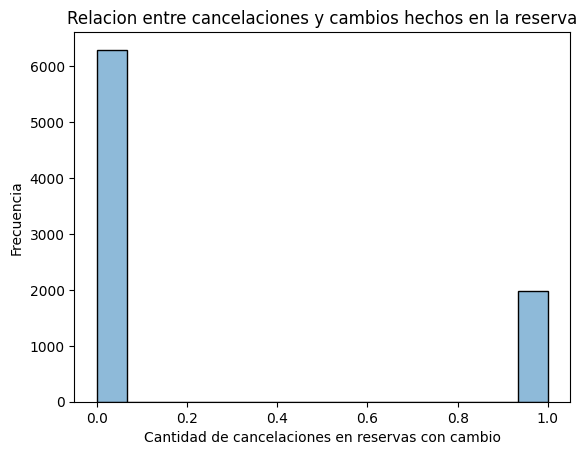

In [174]:
sns.histplot(data=df_filtrado_changes['is_canceled'], alpha = 0.5).set(title="Relacion entre cancelaciones y cambios hechos en la reserva",xlabel="Cantidad de cancelaciones en reservas con cambio",ylabel="Frecuencia")

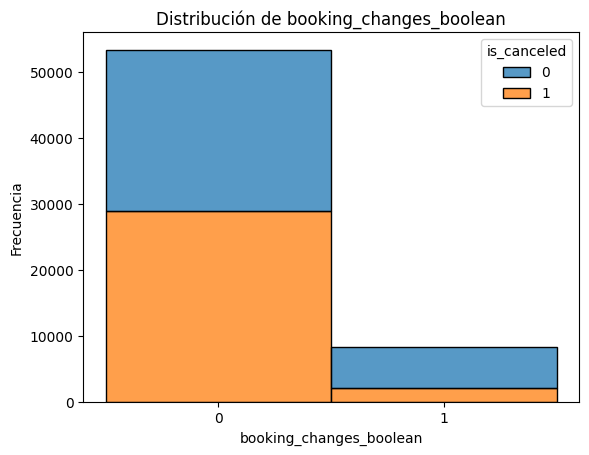

In [175]:
ax = sns.histplot(data=df_hotels_train_copy, discrete=True, x="booking_changes_boolean", hue="is_canceled", multiple="stack")
plt.title("Histograma de frecuencia de booking_changes con stack según is_canceled")
ax.set(title="Distribución de booking_changes_boolean", xlabel="booking_changes_boolean", ylabel="Frecuencia")

xticks = range(df_hotels_train_copy['booking_changes_boolean'].min(), df_hotels_train_copy['booking_changes_boolean'].max()+1)
plt.xticks(xticks, [str(x) for x in xticks])
plt.ylabel("Frecuencia")
plt.show()

Podemos ver que la gran mayoría de los clientes que hicieron por lo menos un cambio en la reserva no cancelaron. Solo el 24% canceló.

#### **days_in_waiting_list** 

Esta variable indica la cantidad de dias que una reserva estuvo en dias de espera.

In [176]:
variables_cuantitativas.days_in_waiting_list.value_counts()

0      59453
39       155
31        90
44        83
58        82
       ...  
81         1
121        1
97         1
193        1
105        1
Name: days_in_waiting_list, Length: 116, dtype: int64

In [177]:
variables_cuantitativas.days_in_waiting_list.sort_values().tail(10)

6529     391
8976     391
51186    391
53261    391
43168    391
14677    391
12368    391
38732    391
5554     391
13590    391
Name: days_in_waiting_list, dtype: int64

Veamos exactamente cuantas reservas hay de 391 días de espera, ya que parecen más de lo esperado

In [178]:
variables_cuantitativas[df_hotels_train_original.days_in_waiting_list==391].days_in_waiting_list.shape

<ipython-input-178-30694b4ab165>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  variables_cuantitativas[df_hotels_train_original.days_in_waiting_list==391].days_in_waiting_list.shape


(33,)

33 reservas tienen 391 días de espera. Gráfiquemos esta variable vs su cantidad para tener una vista más amplia de esta variable.

[Text(0.5, 1.0, 'Distribución de days in waiting list'),
 Text(0.5, 0, 'days in waiting list'),
 Text(0, 0.5, 'Frecuencia')]

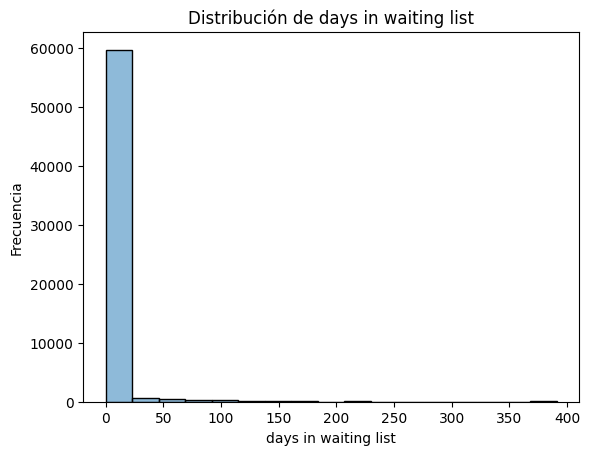

In [179]:
sns.histplot(data=variables_cuantitativas['days_in_waiting_list'], alpha = 0.5).set(title="Distribución de days in waiting list",xlabel="days in waiting list",ylabel="Frecuencia")

Este gráfico esta muy distorsionado y no nos proporciona mucha información, más allá de la información de que la mayoría de los clientes no esperaron días hasta que se confirme la reserva.
Por lo que para analizar más la variable graficaremos la distribución de la variable **cantidad de días mayor a 0** que esperaron los clientes para que se confirme la reserva.

In [180]:
#Porcentaje de reservas que esperaron 1 día o más para que se confirme la reserva
df_filtrado_waiting_list = variables_cuantitativas[df_hotels_train_original['days_in_waiting_list'] > 0]
cantidad_de_reservas = variables_cuantitativas.shape[0]
print("Porcentaje de reservas que esperaron 1 día o más: " + (str((df_filtrado_waiting_list.shape[0] * 100) / cantidad_de_reservas)) + "%")

Porcentaje de reservas que esperaron 1 día o más: 3.605239268577357%


<ipython-input-180-8a775e06da86>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado_waiting_list = variables_cuantitativas[df_hotels_train_original['days_in_waiting_list'] > 0]


In [181]:
df_filtrado_waiting_list.days_in_waiting_list.value_counts().head(10)

0      2123
77        7
39        6
45        5
22        5
58        4
28        4
111       3
101       3
44        3
Name: days_in_waiting_list, dtype: int64

[Text(0.5, 1.0, 'Distribución de days in waiting list > 0'),
 Text(0.5, 0, 'Días esperados por el cliente hasta que se confirme la reserva'),
 Text(0, 0.5, 'Frecuencia')]

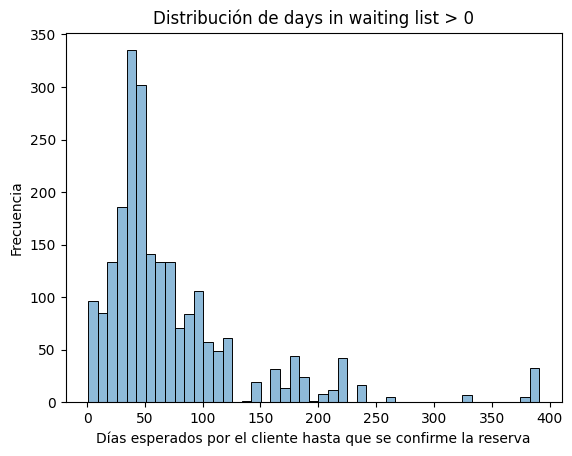

In [182]:
df_filtrado_waiting_list = variables_cuantitativas[variables_cuantitativas['days_in_waiting_list'] > 0]
sns.histplot(data=df_filtrado_waiting_list['days_in_waiting_list'], alpha = 0.5).set(title="Distribución de days in waiting list > 0",xlabel="Días esperados por el cliente hasta que se confirme la reserva",ylabel="Frecuencia")

Observamos que una vez que el cliente pasa a tener que esperar 1 día o más hasta que se le confirme la reserva. Los valores más frecuentes se encuentran por los 30 a 70 días

Analizemos esta variable con el target con los dias filtrados > a 0

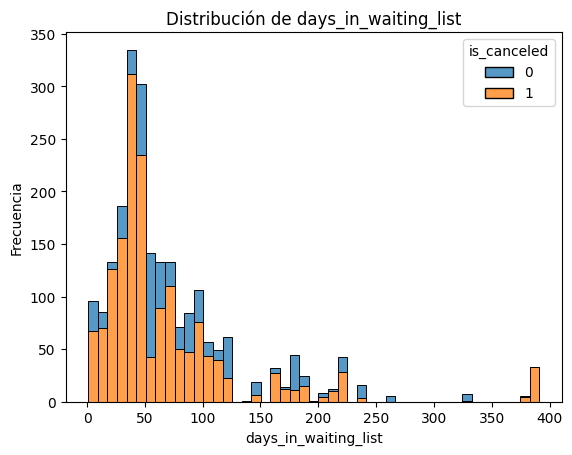

In [183]:
ax = sns.histplot(data=df_filtrado_waiting_list, x="days_in_waiting_list", hue="is_canceled", multiple="stack")
plt.title("Histograma de frecuencia de booking_changes con stack según is_canceled")
ax.set(title="Distribución de days_in_waiting_list", xlabel="days_in_waiting_list", ylabel="Frecuencia")

plt.ylabel("Frecuencia")
plt.show()

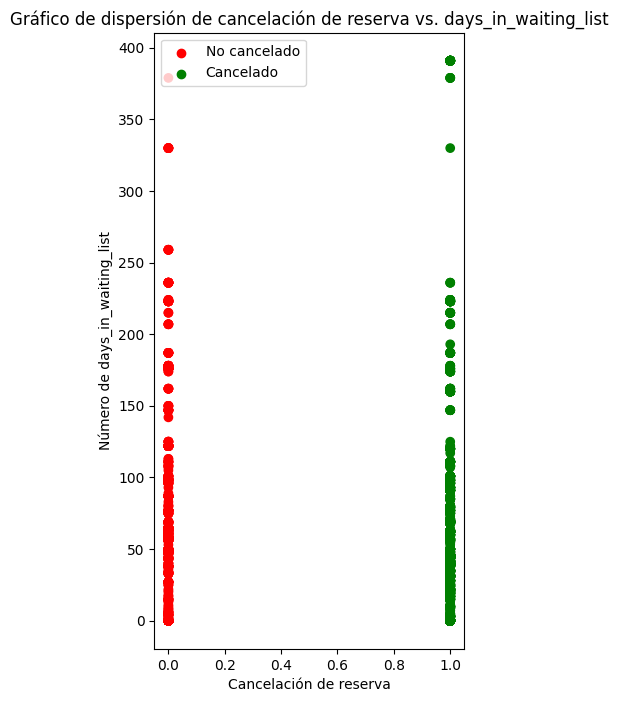

In [184]:
# Crear una lista de colores basado en los valores de la variable is_canceled
colors = ['red' if c == 0 else 'green' for c in df_hotels_train_copy['is_canceled']]

plt.figure(figsize=(4, 8))
# Crear el scatter plot con los valores de la variable "is_canceled" en el eje x y la variable "adults" en el eje y
plt.scatter(df_hotels_train_copy['is_canceled'], df_hotels_train_copy['days_in_waiting_list'], c=colors)

# Personalizar el gráfico
red_patch = plt.scatter([], [], c='red', label='No cancelado')
green_patch = plt.scatter([], [], c='green', label='Cancelado')
plt.legend(handles=[red_patch, green_patch], loc='upper left')
plt.title('Gráfico de dispersión de cancelación de reserva vs. days_in_waiting_list')
plt.xlabel('Cancelación de reserva')
plt.ylabel('Número de days_in_waiting_list')

plt.show()

#### **required_car_parking_spaces** 

Esta variable indica la cantidad de espacios requeridos solicitados en una reserva

In [185]:
variables_cuantitativas.required_car_parking_spaces.value_counts()

0    58658
1     3016
2       12
8        1
3        1
Name: required_car_parking_spaces, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable cantidad de espacíos de estacionamientos requeridos'}, xlabel='Cantidad de espacios de estacionamiento', ylabel='Frecuencia'>

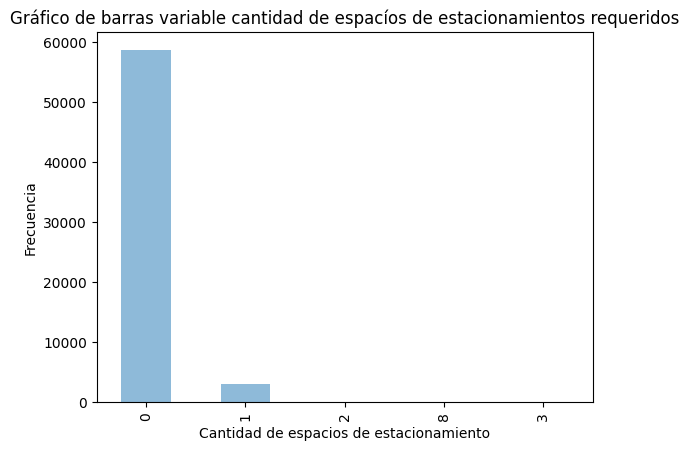

In [186]:
variables_cuantitativas.required_car_parking_spaces.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable cantidad de espacíos de estacionamientos requeridos" , xlabel="Cantidad de espacios de estacionamiento" , ylabel="Frecuencia")


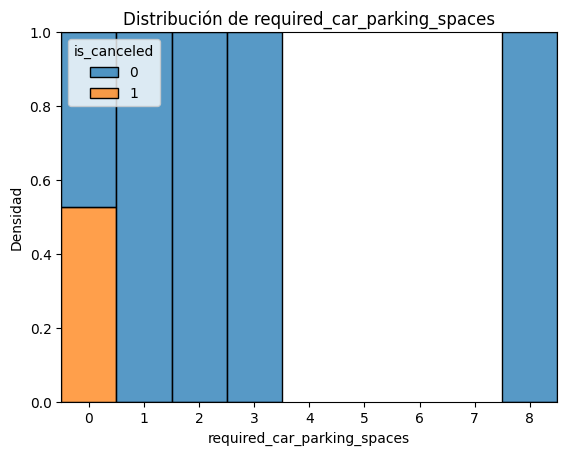

In [187]:
ax = sns.histplot(data=variables_cuantitativas, discrete=True, x="required_car_parking_spaces", hue="is_canceled", multiple="fill", stat='density')
plt.title("Histograma de frecuencia de required_car_parking_spaces con stack según is_canceled")
ax.set(title="Distribución de required_car_parking_spaces", xlabel="required_car_parking_spaces", ylabel="Frecuencia")

xticks = range(variables_cuantitativas['required_car_parking_spaces'].min(), variables_cuantitativas['required_car_parking_spaces'].max()+1)
plt.xticks(xticks, [str(x) for x in xticks])
plt.ylabel("Densidad")
plt.show()

Observamos como para los que no requirieron espacios de estacionamiento, se encuentra balanceado el data set entre reservas canceladas y no canceladas. Pero para los casos que si se requirieron car parking spacesel 100% no cancelaron. Igualmente el único caso que tiene una minima cantidad de data viable es el caso de la cantidad requerida "1".

In [188]:
#Cantidad de reservas que cancelaron habiendo 
len(variables_cuantitativas[(variables_cuantitativas["required_car_parking_spaces"] == 1) & (variables_cuantitativas["is_canceled"] == 1)])

0

#### **total_of_special_requests** 

Esta variable indica el total de requerimientos especiales hechos en una reserva

In [189]:
variables_cuantitativas.total_of_special_requests.value_counts()

0    38474
1    15660
2     6201
3     1185
4      150
5       18
Name: total_of_special_requests, dtype: int64

<Axes: title={'center': 'Gráfico de barras variable cantidad pedidos especiales requeridos'}, xlabel='Cantidad de pedidos especiales', ylabel='Frecuencia'>

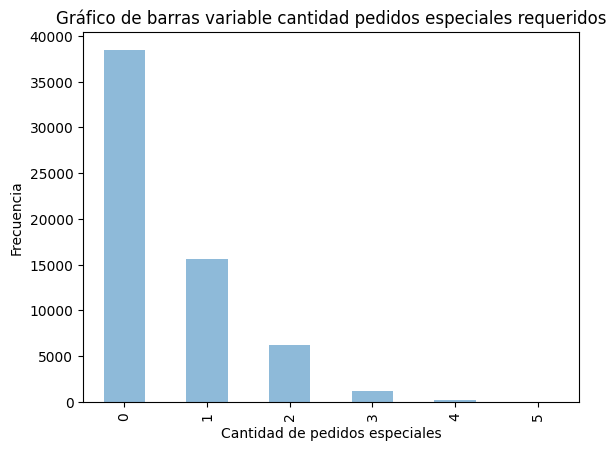

In [190]:
variables_cuantitativas.total_of_special_requests.value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable cantidad pedidos especiales requeridos" , xlabel="Cantidad de pedidos especiales" , ylabel="Frecuencia")

Analizemos esta variable contra el target

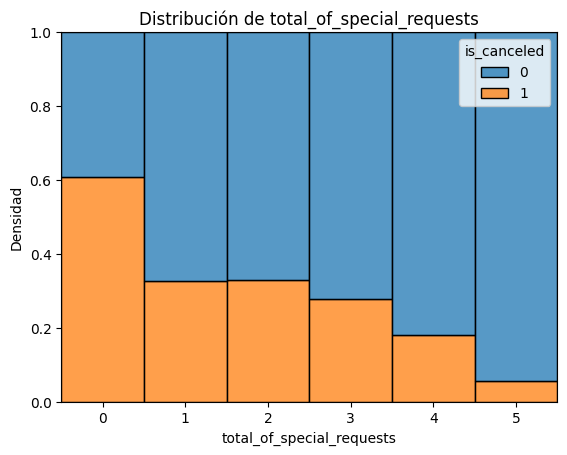

In [191]:
ax = sns.histplot(data=variables_cuantitativas, discrete=True, x="total_of_special_requests", hue="is_canceled", multiple="fill", stat='density')
plt.title("Histograma de frecuencia de total_of_special_requests con stack según is_canceled")
ax.set(title="Distribución de total_of_special_requests", xlabel="total_of_special_requests", ylabel="Frecuencia")

xticks = range(variables_cuantitativas['total_of_special_requests'].min(), variables_cuantitativas['total_of_special_requests'].max()+1)
plt.xticks(xticks, [str(x) for x in xticks])
plt.ylabel("Densidad")
plt.show()

#### **special_request_boolean**

Determina si hubo alguna special request

In [192]:

funcion_binaria_requests = lambda x: 1 if x > 0 else 0


df_hotels_train_copy['special_request_boolean'] = df_hotels_train_copy['total_of_special_requests'].apply(funcion_binaria_requests)
df_hotels_test_copy['special_request_boolean'] = df_hotels_test_copy['total_of_special_requests'].apply(funcion_binaria_requests)
df_hotels_train_copy.special_request_boolean.value_counts()




0    38474
1    23214
Name: special_request_boolean, dtype: int64

In [193]:
df_filtrado_requests = df_hotels_train_copy[df_hotels_train_copy['special_request_boolean'] == True]

df_filtrado_requests.special_request_boolean.value_counts()


1    23214
Name: special_request_boolean, dtype: int64

In [194]:
df_filtrado_requests.is_canceled.value_counts()

0    15697
1     7517
Name: is_canceled, dtype: int64

In [195]:
(df_filtrado_requests.is_canceled.sum()) * 100 / (df_filtrado_requests.special_request_boolean.sum())

32.38132161626605

El 68% de los clientes que hicieron al menos una special request no canceló.

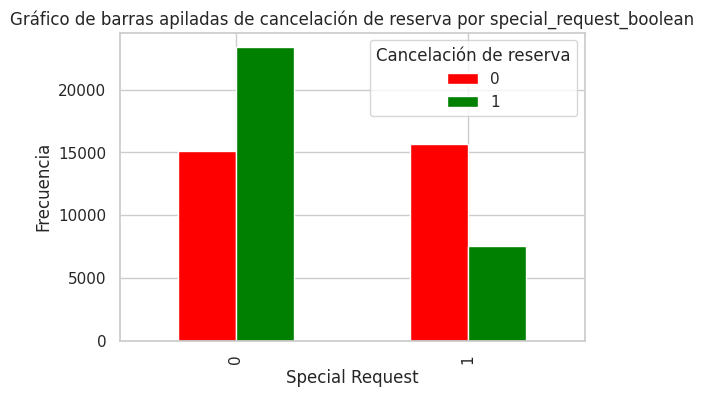

In [196]:
# Crear una tabla de frecuencias utilizando la función crosstab de pandas
ct = pd.crosstab(df_hotels_train_copy['special_request_boolean'], df_hotels_train_copy['is_canceled'])

# Definir una lista de colores en función de ambas variables
colors = ['green' if c == True else 'red' for c in ct.index]

# Crear el gráfico de barras apiladas utilizando la biblioteca seaborn
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(6, 4))
ct.plot(kind='bar', stacked=False, color=colors, ax=ax)


# Personalizar el gráfico
ax.set_title('Gráfico de barras apiladas de cancelación de reserva por special_request_boolean')
ax.set_xlabel('Special Request')
ax.set_ylabel('Frecuencia')
ax.legend(title='Cancelación de reserva', loc='upper right')

plt.show()

#### **special_request_and_changes_made**

Si lo sumamos con booking_changes_boolean quizas conseguimos aumentar el porcentaje. Es decir, tomar a los clientes que hicieron cambios en la reserva y además hicieron special requests.

In [197]:

funcion_binaria_requests = lambda x: 1 if x > 1 else 0


df_hotels_train_copy['special_request_and_changes_made'] = ((df_hotels_train_copy['special_request_boolean']) + (df_hotels_train_copy['booking_changes_boolean'])).apply(funcion_binaria_requests)
df_hotels_test_copy['special_request_and_changes_made'] = ((df_hotels_test_copy['special_request_boolean']) + (df_hotels_test_copy['booking_changes_boolean'])).apply(funcion_binaria_requests)
df_hotels_train_copy.special_request_and_changes_made.value_counts()

0    57988
1     3700
Name: special_request_and_changes_made, dtype: int64

In [198]:
df_filtrado_requests_changes = df_hotels_train_copy[df_hotels_train_copy['special_request_and_changes_made'] == True]

df_filtrado_requests_changes.special_request_and_changes_made.value_counts()

1    3700
Name: special_request_and_changes_made, dtype: int64

In [199]:
df_filtrado_requests_changes.is_canceled.value_counts()

0    2844
1     856
Name: is_canceled, dtype: int64

In [200]:
(df_filtrado_requests_changes.is_canceled.sum()) * 100 / (df_filtrado_requests_changes.special_request_and_changes_made.sum())

23.135135135135137

Concluimos que si el cliente hizo algun cambio en la reserva  y además hizo una special request tiene una probabilidad de 77% de no cancelar

Grafiquemos esto

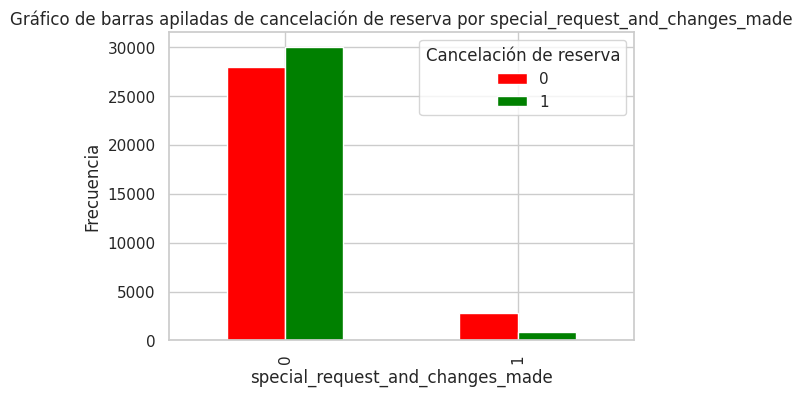

In [201]:
# Crear una tabla de frecuencias utilizando la función crosstab de pandas
ct = pd.crosstab(df_hotels_train_copy['special_request_and_changes_made'], df_hotels_train_copy['is_canceled'])

# Definir una lista de colores en función de ambas variables
colors = ['green' if c == True else 'red' for c in ct.index]

# Crear el gráfico de barras apiladas utilizando la biblioteca seaborn
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(6, 4))
ct.plot(kind='bar', stacked=False, color=colors, ax=ax)


# Personalizar el gráfico
ax.set_title('Gráfico de barras apiladas de cancelación de reserva por special_request_and_changes_made')
ax.set_xlabel('special_request_and_changes_made')
ax.set_ylabel('Frecuencia')
ax.legend(title='Cancelación de reserva', loc='upper right')

plt.show()

#### **reservation_status_date**

Esta variable indica la fecha del ultimo status actualizado de la reserva

In [202]:
variables_cuantitativas.reservation_status_date.value_counts()

2015-10-21    1013
2015-07-06     549
2015-01-01     540
2016-11-25     526
2016-01-18     431
              ... 
2015-05-08       1
2015-03-12       1
2015-02-12       1
2015-01-28       1
2015-01-29       1
Name: reservation_status_date, Length: 915, dtype: int64

### Medidas de resumen de las variables cuantitativas (Media, Máximos, Mínimos, Cuartiles y Mediana)

In [203]:
medidas = variables_cuantitativas.describe()
medidas

adr        adults  arrival_date_day_of_month  \
count  61688.000000  61688.000000               61688.000000   
mean     102.533874      1.864350                  15.789392   
std       47.708637      0.588537                   8.795593   
min       -6.380000      0.000000                   1.000000   
25%       70.000000      2.000000                   8.000000   
50%       95.000000      2.000000                  16.000000   
75%      126.000000      2.000000                  23.000000   
max      510.000000     55.000000                  31.000000   

       arrival_date_week_number  arrival_date_year        babies  \
count              61688.000000       61688.000000  61688.000000   
mean                  27.217206        2016.155865      0.007181   
std                   13.515078           0.708285      0.092325   
min                    1.000000        2015.000000      0.000000   
25%                   17.000000        2016.000000      0.000000   
50%                   28.000000        2016.000000      0.000000   
75%                   38.000000        2017.000000      0.000000   
max                   53.000000        2017.000000      9.000000   

       booking_changes      children  days_in_waiting_list     lead_time  \
count     61688.000000  61688.000000          61688.000000  61688.000000   
mean          0.195970      0.105239              2.648603    112.510245   
std           0.610905      0.403488             18.652334    110.741959   
min           0.000000      0.000000              0.000000      0.000000   
25%           0.000000      0.000000              0.000000     23.000000   
50%           0.000000      0.000000              0.000000     78.000000   
75%           0.000000      0.000000              0.000000    172.000000   
max          17.000000     10.000000            391.000000    629.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count            61688.000000                    61688.000000   
mean                 0.114820                        0.111561   
std                  0.995343                        1.389375   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       70.000000   

       required_car_parking_spaces  stays_in_week_nights  \
count                 61688.000000          61688.000000   
mean                      0.049459              2.511428   
std                       0.220017              1.885164   
min                       0.000000              0.000000   
25%                       0.000000              1.000000   
50%                       0.000000              2.000000   
75%                       0.000000              3.000000   
max                       8.000000             40.000000   

       stays_in_weekend_nights  total_of_special_requests   is_canceled  
count             61688.000000               61688.000000  61688.000000  
mean                  0.925399                   0.523716      0.500713  
std                   0.993214                   0.775089      0.500004  
min                   0.000000                   0.000000      0.000000  
25%                   0.000000                   0.000000      0.000000  
50%                   1.000000                   0.000000      1.000000  
75%                   2.000000                   1.000000      1.000000  
max                  16.000000                   5.000000      1.000000

Observaciones:

**lead_time:** Vemos que tiene una media de 112 días. Un mínimo de de 0 días para alguien que realizo el booking y llegó al hotel en el mismo día y un máximo de 629 días, casi 2 años desde el booking hasta el arribo.

**arrival_date_week_number:** Vemos que llega hasta la semana 53 del año, tambíen habría que tener en cuenta en las cantidades que ciertos números de semanas no estan incluidos en los 3 años. Tambien observamos que la media es la semana 27

**arrival_date_day_of_month:** La media se encuentra en el día 16

Algo interesante a analizar sería ver si los días con mayor cantidad de arribos, cayeron en fechas de fin de semana. Vemos como el día 31 es quien menor cantidad de arribos tuvo, esto se puede deber a que no todos los meses llegan a ese día.

Cerrando las variables relacionadas a la cantidad de arribos segun el dia/semana/mes/año. Será que mientras menos cantidades tiene alguna de estas, que simplemente se reservaron y concretaron menos estadías? O tendrá que ver que la menor cantidad de arribos se debe a mayor cancelación de reservas hechas.

**stays_in_weekend_nights**: Observamos como la media de días de fin de semana esta en 1, mientras que hubo una reserva que contiene 16 días de fin de semana. Sería interesante analizar si es un outlier.

**stays_in_week_nights**: Lógicamente para los días de semana al ser más aumenta la media de la cantidad de días de estadía. La media pasa a ser 2.5 días. Y vemos como una persona reservó o se quedó 40 días de semana, será la misma que la que se quedó 16 días de fin de semana?

**adults:** Vemos como una reserva contiene 55 adultos, bastante separado de los demás valores. Más allá de si sea un caso real o un caso mal cargado, existe la posibilidad de que este valor, estorbe para ciertos cálculos.

**previous_cancellations:** Vemos como hay 20 clientes que cancelaron 26 reservas previas a la actual y esta es la cantidad máxima de cancelaciones de reservas previas.

**previous_bookings_not_cancelled:** Podemos observar como un cliente ya hizo 70 reservas previas sin cancelar. Será de interes analizar esta columna, cantidades tan altas de previas reservas sin cancelar pueden llegar a ser buenos indicadores de que la reserva no esté cancelada.

### Moda: 

Para analizar la moda, generamos un nuevo dataframe utilizando el metodo **mode**:

In [204]:
moda = variables_cuantitativas.mode()
moda

adr  adults  arrival_date_day_of_month  arrival_date_week_number  \
0  62.0       2                         17                        33   

   arrival_date_year  babies  booking_changes  children  days_in_waiting_list  \
0               2016       0                0       0.0                     0   

   lead_time  previous_cancellations  previous_bookings_not_canceled  \
0          0                       0                               0   

   required_car_parking_spaces reservation_status_date  stays_in_week_nights  \
0                            0              2015-10-21                     2   

   stays_in_weekend_nights  total_of_special_requests  is_canceled  
0                        0                          0            1

Viendo los resultados que nos arroja el método podemos definir:


*   Las variables **babies, booking_changes, children, days_in_waiting_list, lead_ time, previous_cancellations, previous_bookings_not_canceled, required_car_parking_spaces, stays_in_weekend_nights, total_of_special_requests** son **amodales**, ya que en todas las filas del dataset estas toman valores distintos. Esto puede verse reflejado en los histogramas correspondientes a cada variable.
*   Las variables **adr, adults, arrival_date_day_of_month, arrival_date_week_number, arrival_date_year, reservation_status_date, stays_in_week_nights** son variables de moda **unica**, es decir, no hay más de un valor que posea una la misma frecuencia para una variable.



### Valores nulos respecto de las variables cuantitativas

El único campo con valor nulo es **children**

In [205]:
cant_childrn_nulos= variables_cuantitativas.children.isna().sum()
cant_childrn_nulos

0

In [206]:
#Porcentaje de nulos
(cant_childrn_nulos * 100) / variables_cuantitativas.shape[0]

0.0

Al ser un porcentaje tan bajo de filas con valor faltante, procedemos a eliminar estas filas.

In [207]:
df_hotels_train_copy=df_hotels_train_copy.dropna(subset=['children'])
df_hotels_train_copy['children'].isna().sum()

0

# **Busqueda de outliers**

##Outliers univariados

**ADR**

[Text(0.5, 1.0, 'Boxplot ADR')]

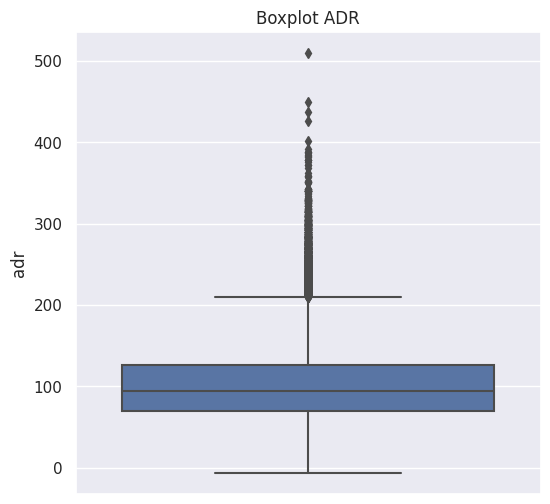

In [208]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="adr", data = variables_cuantitativas).set(title = "Boxplot ADR")
box_age

Los outlayers de esta variable son dentro de lo esperado, puede haber reservas con muchos más gatos en ADR que otras, pero ninguna se encuentra en un rango completamente desproporcionado (Por ejemplo si hubiesemos encontrado un valor mayor a 1 millón)

In [209]:
#Cuartiles
Q1_adr=np.quantile(variables_cuantitativas.adr,0.25)
Q3_adr=np.quantile(variables_cuantitativas.adr,0.75)

#Rango intercuartil
IQR_adr=Q3_adr-Q1_adr

#Limite superior Outliers
out_sup=Q3_adr+3*IQR_adr
out_inf=Q1_adr-3*IQR_adr
print(out_inf)
print(out_sup)

-98.0
294.0


In [210]:
# replace all rows that have an 'adr' value greater than 300 with NaN
from sklearn.impute import SimpleImputer

variables_cuantitativas.loc[variables_cuantitativas['adr'] > 300, 'adr'] = pd.np.nan

# initialize the SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# fit and transform the 'adr' feature to replace NaN values with the mean value of the remaining values
variables_cuantitativas['adr'] = imputer.fit_transform(variables_cuantitativas[['adr']])


**Lead_time**

[Text(0.5, 1.0, 'Boxplot LeadTime')]

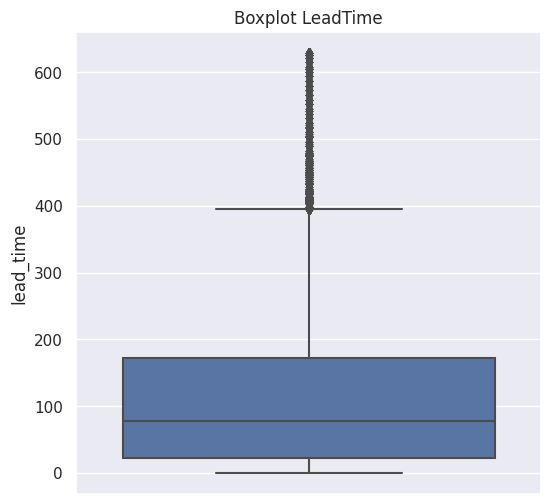

In [211]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="lead_time", data = variables_cuantitativas).set(title = "Boxplot LeadTime")
box_age

Analizando por el gráfico la gran cantidad de valores mayores a 400, podria considerarse que es normal que una reserva este por arriba de los 400 días y hasta 2 años.

In [212]:
#Cuartiles
Q1_adr=np.quantile(variables_cuantitativas.lead_time,0.25)
Q3_adr=np.quantile(variables_cuantitativas.lead_time,0.75)

#Rango intercuartil
IQR_adr=Q3_adr-Q1_adr

#Limite superior Outliers
out_sup=Q3_adr+3*IQR_adr
out_inf=Q1_adr-3*IQR_adr
print(out_inf)
print(out_sup)

-424.0
619.0


In [213]:
# replace all rows that have an 'lead_time' value greater than 619 with NaN
from sklearn.impute import SimpleImputer

variables_cuantitativas.loc[variables_cuantitativas['lead_time'] > 619, 'lead_time'] = pd.np.nan

# initialize the SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# fit and transform the 'adr' feature to replace NaN values with the mean value of the remaining values
variables_cuantitativas['lead_time'] = imputer.fit_transform(variables_cuantitativas[['lead_time']])

**stays_in_weekend_nights**

[Text(0.5, 1.0, 'Boxplot StaysInWeekendNights')]

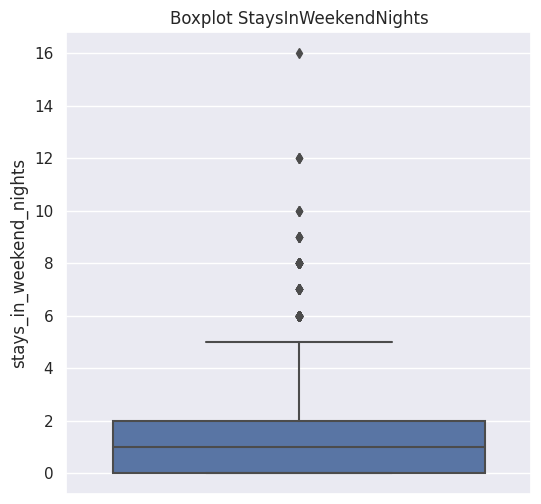

In [214]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="stays_in_weekend_nights", data = variables_cuantitativas).set(title = "Boxplot StaysInWeekendNights")
box_age

In [215]:
stays_in_weekend_nights = variables_cuantitativas[variables_cuantitativas['stays_in_weekend_nights'] > 14]
stays_in_weekend_nights

adr  adults  arrival_date_day_of_month  arrival_date_week_number  \
31189  25.5       2                         10                         2   

       arrival_date_year  babies  booking_changes  children  \
31189               2017       0                0       0.0   

       days_in_waiting_list  lead_time  previous_cancellations  \
31189                     0      322.0                       0   

       previous_bookings_not_canceled  required_car_parking_spaces  \
31189                               0                            0   

      reservation_status_date  stays_in_week_nights  stays_in_weekend_nights  \
31189              2016-10-31                    40                       16   

       total_of_special_requests  is_canceled  
31189                          0            1

In [216]:
#Cuartiles
Q1=np.quantile(variables_cuantitativas.stays_in_weekend_nights,0.25)
Q3=np.quantile(variables_cuantitativas.stays_in_weekend_nights,0.75)

#Rango intercuartil
IQR=Q3-Q1

#Limite superior Outliers
out_sup=Q3+3*IQR
out_inf=Q1-3*IQR
print(out_inf)
print(out_sup)

-6.0
8.0


In [217]:
# replace all rows that have an 'lead_time' value greater than 8 with NaN
from sklearn.impute import SimpleImputer

variables_cuantitativas.loc[variables_cuantitativas['stays_in_weekend_nights'] > 8, 'stays_in_weekend_nights'] = pd.np.nan

# initialize the SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# fit and transform the 'adr' feature to replace NaN values with the mean value of the remaining values
variables_cuantitativas['stays_in_weekend_nights'] = imputer.fit_transform(variables_cuantitativas[['stays_in_weekend_nights']])

**stays_in_week_nights**

[Text(0.5, 1.0, 'Boxplot StaysInWeekNights')]

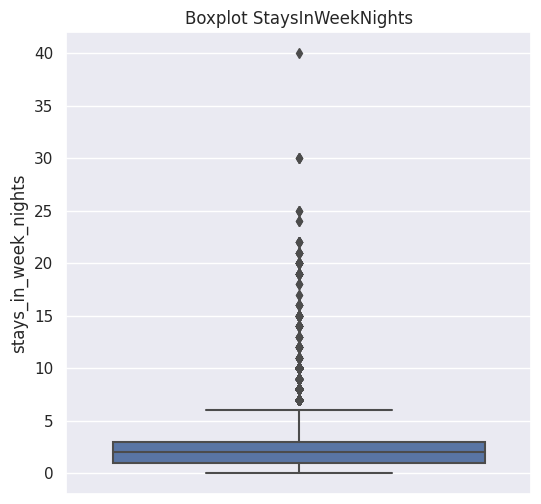

In [218]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="stays_in_week_nights", data = variables_cuantitativas).set(title = "Boxplot StaysInWeekNights")
box_age

In [219]:
stays_in_week_nights = variables_cuantitativas[variables_cuantitativas['stays_in_week_nights'] > 35]
stays_in_week_nights

adr  adults  arrival_date_day_of_month  arrival_date_week_number  \
31189  25.5       2                         10                         2   

       arrival_date_year  babies  booking_changes  children  \
31189               2017       0                0       0.0   

       days_in_waiting_list  lead_time  previous_cancellations  \
31189                     0      322.0                       0   

       previous_bookings_not_canceled  required_car_parking_spaces  \
31189                               0                            0   

      reservation_status_date  stays_in_week_nights  stays_in_weekend_nights  \
31189              2016-10-31                    40                 0.923389   

       total_of_special_requests  is_canceled  
31189                          0            1

Podemos observar que los outlayers stays_in_week_nights > 40 y stays_in_weekend_nights > 16 pertenecen al mismo registro con lo cual se considera una larga estadia y por lo tanto consideramos el dato consistente.

In [220]:
#Cuartiles
Q1=np.quantile(variables_cuantitativas.stays_in_week_nights,0.25)
Q3=np.quantile(variables_cuantitativas.stays_in_week_nights,0.75)

#Rango intercuartil
IQR=Q3-Q1

#Limite superior Outliers
out_sup=Q3+3*IQR
out_inf=Q1-3*IQR
print(out_inf)
print(out_sup)

-5.0
9.0


In [221]:
# replace all rows that have an 'lead_time' value greater than 9 with NaN
variables_cuantitativas.loc[variables_cuantitativas['stays_in_week_nights'] > 8, 'stays_in_week_nights'] = pd.np.nan

# initialize the SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# fit and transform the 'adr' feature to replace NaN values with the mean value of the remaining values
variables_cuantitativas['stays_in_week_nights'] = imputer.fit_transform(variables_cuantitativas[['stays_in_week_nights']])

**total_of_special_requests**

[Text(0.5, 1.0, 'Boxplot TotalOfSpecialRequests')]

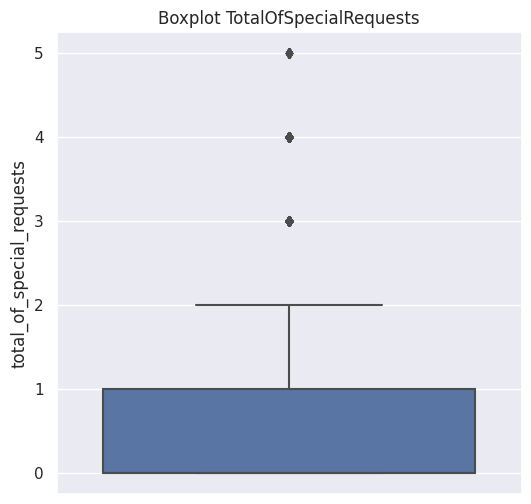

In [222]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="total_of_special_requests", data = variables_cuantitativas).set(title = "Boxplot TotalOfSpecialRequests")
box_age

Consideramos los outlayers como valores dentro de lo esperado.

**adults**

[Text(0.5, 1.0, 'Boxplot ')]

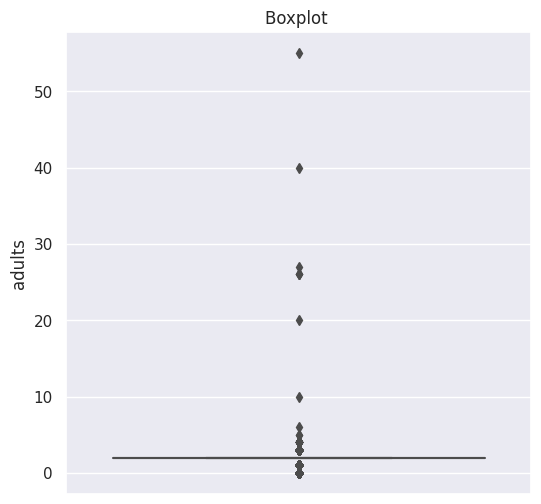

In [223]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="adults", data = variables_cuantitativas).set(title = "Boxplot ")
box_age

Analizamos la existencias de valores negativos

In [224]:
variables_cuantitativas.adults.sort_values()

2398      0
31797     0
21379     0
21380     0
52526     0
         ..
58843    26
19071    26
54918    27
4042     40
58949    55
Name: adults, Length: 61688, dtype: int64

In [225]:
adults = variables_cuantitativas[variables_cuantitativas['adults'] > 35]
adults

adr  adults  arrival_date_day_of_month  arrival_date_week_number  \
4042   0.0      40                          3                        36   
58949  0.0      55                          4                        41   

       arrival_date_year  babies  booking_changes  children  \
4042                2015       0                0       0.0   
58949               2015       0                0       0.0   

       days_in_waiting_list  lead_time  previous_cancellations  \
4042                      0      304.0                       0   
58949                     0      338.0                       0   

       previous_bookings_not_canceled  required_car_parking_spaces  \
4042                                0                            0   
58949                               0                            0   

      reservation_status_date  stays_in_week_nights  stays_in_weekend_nights  \
4042               2015-01-02                   3.0                      0.0   
58949              2015-01-02                   0.0                      2.0   

       total_of_special_requests  is_canceled  
4042                           0            1  
58949                          0            1

In [226]:
#Cuartiles
Q1=np.quantile(variables_cuantitativas.adults,0.25)
Q3=np.quantile(variables_cuantitativas.adults,0.75)

#Rango intercuartil
IQR=Q3-Q1

#Limite superior Outliers
out_sup=Q3+3*IQR
out_inf=Q1-3*IQR
print(out_inf)
print(out_sup)

2.0
2.0


**children**

[Text(0.5, 1.0, 'Boxplot ')]

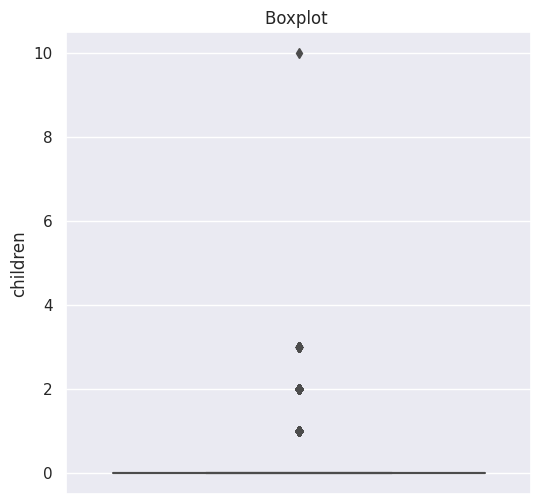

In [227]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="children", data = variables_cuantitativas).set(title = "Boxplot ")
box_age

In [228]:
children = variables_cuantitativas[variables_cuantitativas['children'] > 4]
children

adr  adults  arrival_date_day_of_month  arrival_date_week_number  \
49010  133.16       2                         12                        29   

       arrival_date_year  babies  booking_changes  children  \
49010               2015       0                2      10.0   

       days_in_waiting_list  lead_time  previous_cancellations  \
49010                     0       55.0                       0   

       previous_bookings_not_canceled  required_car_parking_spaces  \
49010                               0                            0   

      reservation_status_date  stays_in_week_nights  stays_in_weekend_nights  \
49010              2015-07-12              2.387798                      4.0   

       total_of_special_requests  is_canceled  
49010                          1            1

**babies**

[Text(0.5, 1.0, 'Boxplot ')]

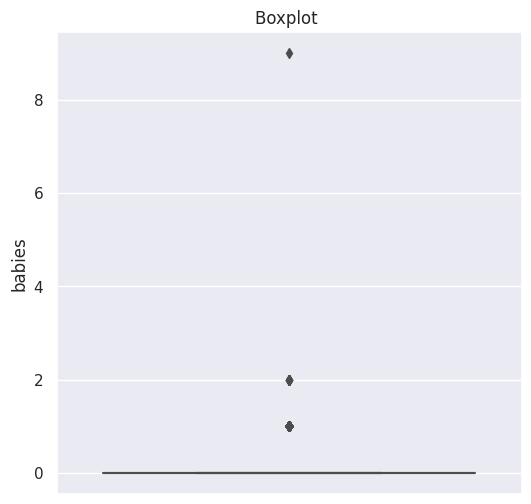

In [229]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="babies", data = variables_cuantitativas).set(title = "Boxplot ")
box_age

In [230]:
babies = variables_cuantitativas[variables_cuantitativas['babies'] > 8]
babies

adr  adults  arrival_date_day_of_month  arrival_date_week_number  \
12604  95.0       1                         11                        42   

       arrival_date_year  babies  booking_changes  children  \
12604               2015       9                1       0.0   

       days_in_waiting_list  lead_time  previous_cancellations  \
12604                     0       11.0                       0   

       previous_bookings_not_canceled  required_car_parking_spaces  \
12604                               0                            0   

      reservation_status_date  stays_in_week_nights  stays_in_weekend_nights  \
12604              2015-10-14                   1.0                      2.0   

       total_of_special_requests  is_canceled  
12604                          0            0

**previous cancellations**

[Text(0.5, 1.0, 'Boxplot ')]

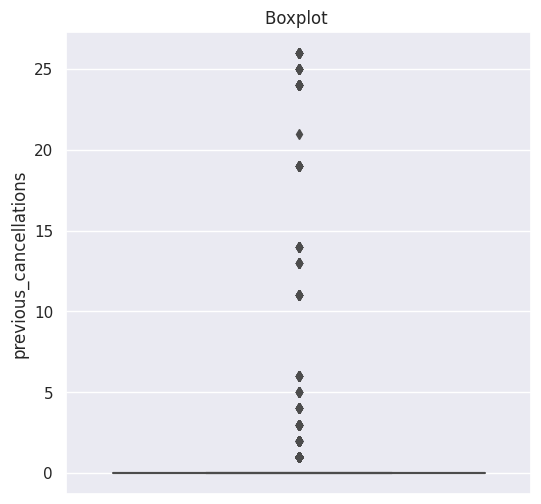

In [231]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="previous_cancellations", data = variables_cuantitativas).set(title = "Boxplot ")
box_age

**previous bookings not canceled**

[Text(0.5, 1.0, 'Boxplot ')]

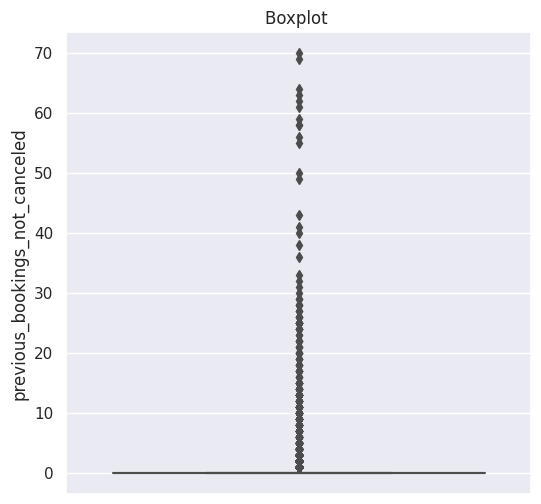

In [232]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="previous_bookings_not_canceled", data = variables_cuantitativas).set(title = "Boxplot ")
box_age

**booking changes**

[Text(0.5, 1.0, 'Boxplot ')]

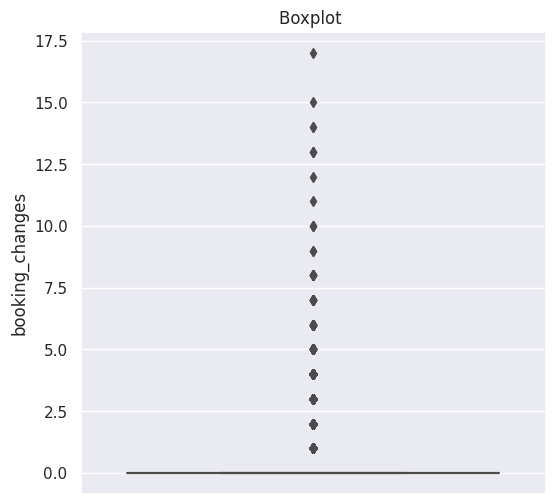

In [233]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="booking_changes", data = variables_cuantitativas).set(title = "Boxplot ")
box_age

**days in waiting list**

[Text(0.5, 1.0, 'Boxplot ')]

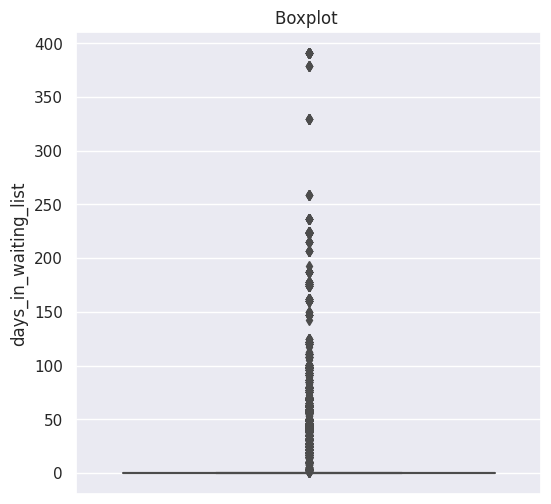

In [234]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="days_in_waiting_list", data = variables_cuantitativas).set(title = "Boxplot ")
box_age

**required car parking spaces**

[Text(0.5, 1.0, 'Boxplot')]

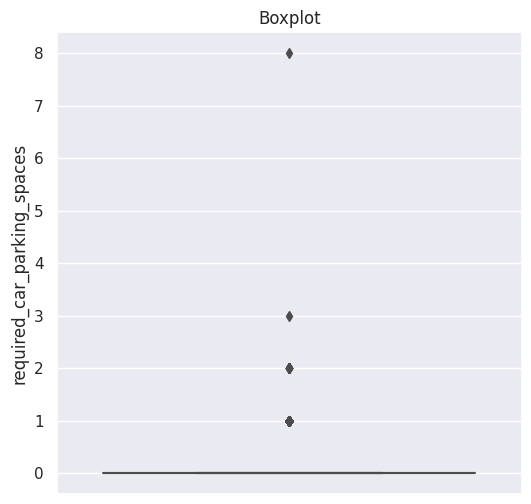

In [235]:
sns.set(rc = {'figure.figsize':(6,6)})
box_age = sns.boxplot(y="required_car_parking_spaces", data = variables_cuantitativas).set(title = "Boxplot")
box_age

In [236]:
required_car_parking_spaces = variables_cuantitativas[variables_cuantitativas['required_car_parking_spaces'] > 7]
required_car_parking_spaces

adr  adults  arrival_date_day_of_month  arrival_date_week_number  \
8233  80.0       2                         19                        12   

      arrival_date_year  babies  booking_changes  children  \
8233               2017       0                1       0.0   

      days_in_waiting_list  lead_time  previous_cancellations  \
8233                   122      138.0                       0   

      previous_bookings_not_canceled  required_car_parking_spaces  \
8233                               2                            8   

     reservation_status_date  stays_in_week_nights  stays_in_weekend_nights  \
8233              2017-03-23                   2.0                      2.0   

      total_of_special_requests  is_canceled  
8233                          0            0

##**Outliers multivariados**

In [237]:
from scipy.linalg import cholesky, solve_triangular

### Adults, Children, Babies

In [238]:
df_with_mahalanobis = df_hotels_train_copy.copy()
vmedias = np.mean(df_with_mahalanobis[['adults','children', 'babies']], axis=0)

# Paso 2: Calcular la matriz de diferencias
x_dif = df_with_mahalanobis[['adults','children', 'babies']] - vmedias

# Paso 3: Calcular la matriz de covarianza
cov = df_with_mahalanobis[['adults','children', 'babies']].cov().values

# Paso 4: Calcular la descomposición de Cholesky
L = cholesky(cov, lower=True)

# Paso 5: Calcular el producto matricial
z = solve_triangular(L, x_dif.T, lower=True, trans='T')
mahal = np.sum(z**2, axis=0)

# Paso 6: Guardar los resultados
df_with_mahalanobis['mahalanobis_adults_children_babies'] = mahal

In [239]:
#Ordeno las distancias de menor a mayor
np.sort(df_with_mahalanobis.mahalanobis_adults_children_babies)

array([1.29463482e-01, 1.29463482e-01, 1.29463482e-01, ...,
       4.19945886e+03, 8.15228455e+03, 9.50079475e+03])

In [240]:
umbral=2000

#Observacione anómalas
df_with_mahalanobis[df_with_mahalanobis['mahalanobis_adults_children_babies']>umbral]

hotel  lead_time  arrival_date_year arrival_date_month  \
4042   Resort Hotel        304               2015          September   
12604    City Hotel         11               2015            October   
58949  Resort Hotel        338               2015            October   

       arrival_date_week_number  arrival_date_day_of_month  \
4042                         36                          3   
12604                        42                         11   
58949                        41                          4   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
4042                         0                     3      40       0.0  ...   
12604                        2                     1       1       0.0  ...   
58949                        2                     0      55       0.0  ...   

       reservation_status_date                                    id  \
4042                2015-01-02  ebb06f2f-1c79-490c-ae9f-8f7ba838d328   
12604               2015-10-14  a864cf91-980a-48da-9b71-c0b487096239   
58949               2015-01-02  9bf89c35-d6aa-4dfb-a0cb-2a3eb30bafd2   

      is_canceled is_portuguese deposit_boolean  company_boolean  \
4042            1           1.0               0                1   
12604           0           0.0               0                1   
58949           1           1.0               0                1   

       booking_changes_boolean  special_request_boolean  \
4042                         0                        0   
12604                        1                        0   
58949                        0                        0   

      special_request_and_changes_made mahalanobis_adults_children_babies  
4042                                 0                        4199.458864  
12604                                0                        9500.794747  
58949                                0                        8152.284551  

[3 rows x 39 columns]

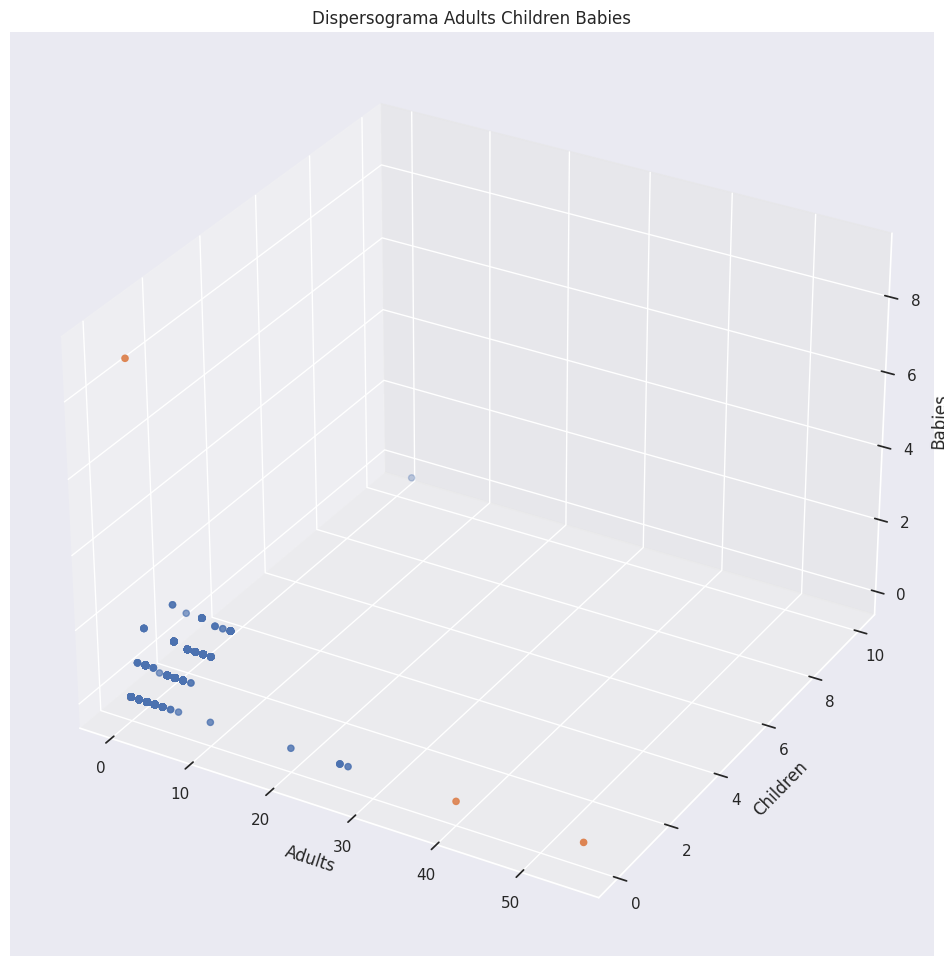

In [241]:
#Gráfico 3D
es_outlier = (df_with_mahalanobis['mahalanobis_adults_children_babies'] > umbral)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

color=[f"C{n}" for n in (es_outlier*1)]
ax.scatter(df_with_mahalanobis.adults,df_with_mahalanobis.children,df_with_mahalanobis.babies,c=color)
ax.set_xlabel('Adults')
ax.set_ylabel('Children')
ax.set_zlabel('Babies')
plt.title('Dispersograma Adults Children Babies')
plt.show()

Encontramos algunos outliers. El caso nuevo que nos llama la atención es el caso en donde hay children pero no adultos. También hay un caso con muchos babies y pocos adultos que llama la atención. Y los casos con muchos adultos que ya habiamos analizado.

### Dias de semana, días de fin de semana

In [242]:
vmedias = np.mean(df_with_mahalanobis[['stays_in_week_nights','stays_in_weekend_nights']], axis=0)

# Paso 2: Calcular la matriz de diferencias
x_dif = df_with_mahalanobis[['stays_in_week_nights','stays_in_weekend_nights']] - vmedias

# Paso 3: Calcular la matriz de covarianza
cov = df_with_mahalanobis[['stays_in_week_nights','stays_in_weekend_nights']].cov().values

# Paso 4: Calcular la descomposición de Cholesky
L = cholesky(cov, lower=True)

# Paso 5: Calcular el producto matricial
z = solve_triangular(L, x_dif.T, lower=True, trans='T')
mahal = np.sum(z**2, axis=0)

# Paso 6: Guardar los resultados
df_with_mahalanobis['mahalanobis_stay_in_week_and_weekend_nights'] = mahal

In [243]:
#Ordeno las distancias de menor a mayor
np.sort(df_with_mahalanobis.mahalanobis_stay_in_week_and_weekend_nights)

array([6.35939047e-02, 6.35939047e-02, 6.35939047e-02, ...,
       2.90815402e+02, 2.90815402e+02, 5.39999114e+02])

In [244]:
umbral=2e+2

#Observacione anómalas
df_with_mahalanobis[df_with_mahalanobis['mahalanobis_stay_in_week_and_weekend_nights']>umbral]

hotel  lead_time  arrival_date_year arrival_date_month  \
31189  Resort Hotel        322               2017            January   
43512  Resort Hotel        242               2017           February   
54199  Resort Hotel        122               2016            January   
57221  Resort Hotel        214               2016            January   

       arrival_date_week_number  arrival_date_day_of_month  \
31189                         2                         10   
43512                         7                         17   
54199                         3                         12   
57221                         5                         26   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
31189                       16                    40       2       0.0  ...   
43512                       12                    30       2       0.0  ...   
54199                       12                    30       2       0.0  ...   
57221                       12                    30       2       0.0  ...   

                                         id is_canceled is_portuguese  \
31189  038d2833-ef4d-4678-8952-873dfd5ea166           1           1.0   
43512  2f056266-b2fd-4c10-a9ff-68feb0d34c86           0           0.0   
54199  636407b0-94e4-48b4-8d53-aa622249d3ea           1           1.0   
57221  b3edd9e8-d9f6-4aae-aa02-16c457af6ef4           0           0.0   

      deposit_boolean company_boolean  booking_changes_boolean  \
31189               0               1                        0   
43512               0               1                        0   
54199               0               1                        0   
57221               0               1                        0   

       special_request_boolean  special_request_and_changes_made  \
31189                        0                                 0   
43512                        1                                 0   
54199                        0                                 0   
57221                        0                                 0   

      mahalanobis_adults_children_babies  \
31189                           0.129463   
43512                           0.129463   
54199                           0.129463   
57221                           0.129463   

      mahalanobis_stay_in_week_and_weekend_nights  
31189                                  539.999114  
43512                                  290.815402  
54199                                  290.815402  
57221                                  290.815402  

[4 rows x 40 columns]

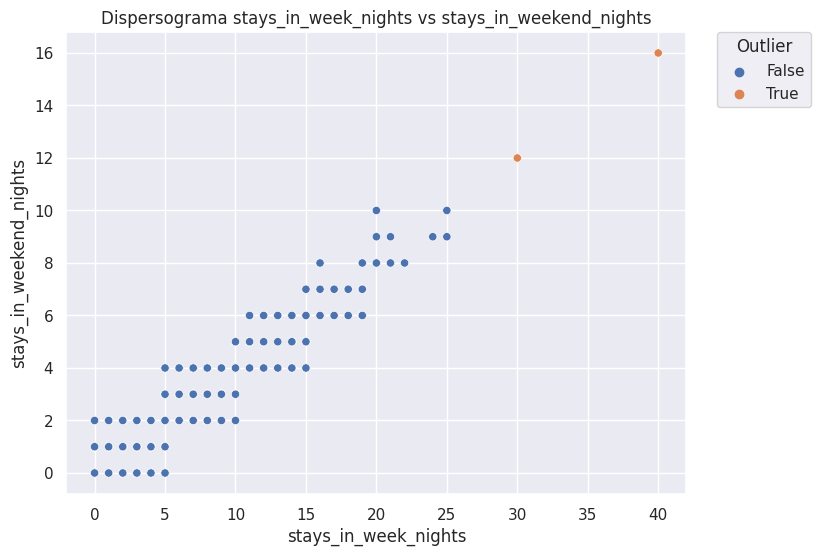

In [245]:
#Grafico scatter
plt.figure(figsize=(8, 6))
es_outlier = (df_with_mahalanobis['mahalanobis_stay_in_week_and_weekend_nights'] > umbral)

sns.scatterplot(x=df_with_mahalanobis.stays_in_week_nights,y=df_with_mahalanobis.stays_in_weekend_nights, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma stays_in_week_nights vs stays_in_weekend_nights')
plt.show()

Ningún dato nos parece fuera de lo común, a pesar de haber reservas de muchas noches.

### Lead time, days in waiting list

In [246]:
vmedias = np.mean(df_with_mahalanobis[['lead_time','days_in_waiting_list']], axis=0)

# Paso 2: Calcular la matriz de diferencias
x_dif = df_with_mahalanobis[['lead_time','days_in_waiting_list']] - vmedias

# Paso 3: Calcular la matriz de covarianza
cov = df_with_mahalanobis[['lead_time','days_in_waiting_list']].cov().values

# Paso 4: Calcular la descomposición de Cholesky
L = cholesky(cov, lower=True)

# Paso 5: Calcular el producto matricial
z = solve_triangular(L, x_dif.T, lower=True, trans='T')
mahal = np.sum(z**2, axis=0)

# Paso 6: Guardar los resultados
df_with_mahalanobis['mahalanobis_lead_time_and_days_in_waiting_list'] = mahal

In [247]:
#Ordeno las distancias de menor a mayor
np.sort(df_with_mahalanobis.mahalanobis_lead_time_and_days_in_waiting_list)

array([1.75892700e-02, 2.07378116e-02, 2.07378116e-02, ...,
       4.52501329e+02, 4.52501329e+02, 4.52501329e+02])

In [248]:
umbral=4.5e+2

#Observacione anómalas
df_with_mahalanobis[df_with_mahalanobis['mahalanobis_lead_time_and_days_in_waiting_list']>umbral]

hotel  lead_time  arrival_date_year arrival_date_month  \
518    City Hotel        443               2016            October   
4571   City Hotel        457               2016            October   
5478   City Hotel        457               2016            October   
5554   City Hotel        457               2016            October   
6529   City Hotel        443               2016            October   
6846   City Hotel        457               2016            October   
8976   City Hotel        464               2016            October   
12368  City Hotel        443               2016            October   
13325  City Hotel        464               2016            October   
13590  City Hotel        464               2016            October   
14677  City Hotel        457               2016            October   
16958  City Hotel        457               2016            October   
19029  City Hotel        464               2016            October   
20139  City Hotel        464               2016            October   
24636  City Hotel        464               2016            October   
25488  City Hotel        457               2016            October   
32655  City Hotel        443               2016            October   
36066  City Hotel        443               2016            October   
38732  City Hotel        464               2016            October   
41465  City Hotel        457               2016            October   
42725  City Hotel        457               2016            October   
43168  City Hotel        464               2016            October   
43534  City Hotel        457               2016            October   
44175  City Hotel        443               2016            October   
46000  City Hotel        457               2016            October   
46016  City Hotel        464               2016            October   
49838  City Hotel        443               2016            October   
51186  City Hotel        464               2016            October   
51730  City Hotel        457               2016            October   
53261  City Hotel        457               2016            October   
55561  City Hotel        443               2016            October   
57903  City Hotel        464               2016            October   
58115  City Hotel        457               2016            October   

       arrival_date_week_number  arrival_date_day_of_month  \
518                          41                          7   
4571                         43                         21   
5478                         43                         21   
5554                         43                         21   
6529                         41                          7   
6846                         43                         21   
8976                         44                         28   
12368                        41                          7   
13325                        44                         28   
13590                        44                         28   
14677                        43                         21   
16958                        43                         21   
19029                        44                         28   
20139                        44                         28   
24636                        44                         28   
25488                        43                         21   
32655                        41                          7   
36066                        41                          7   
38732                        44                         28   
41465                        43                         21   
42725                        43                         21   
43168                        44                         28   
43534                        43                         21   
44175                        41                          7   
46000                        43                         21   
46016              

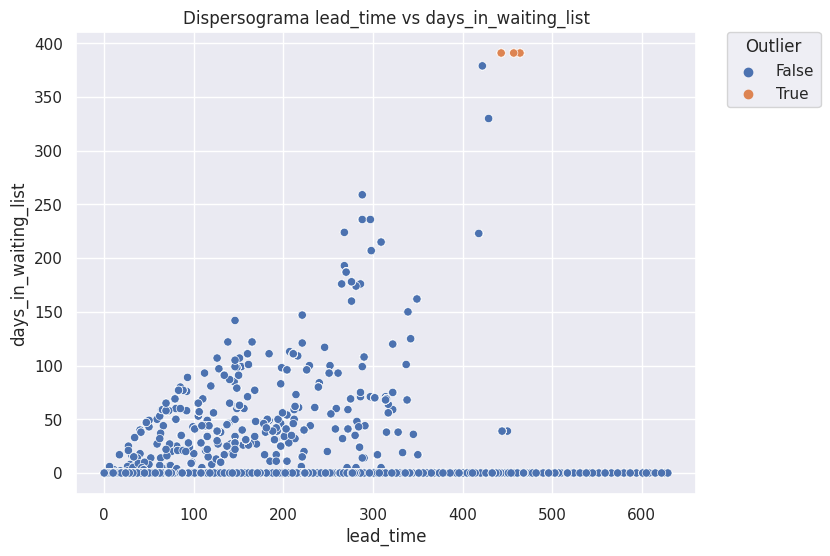

In [249]:
#Grafico scatter
plt.figure(figsize=(8, 6))
es_outlier = (df_with_mahalanobis['mahalanobis_lead_time_and_days_in_waiting_list'] > umbral)

sns.scatterplot(x=df_with_mahalanobis.lead_time,y=df_with_mahalanobis.days_in_waiting_list, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma lead_time vs days_in_waiting_list')
plt.show()

Encontramos reservas con muchos días en la waiting list. Pero no necesariamente hay una relación con lead_time (contrariamente a lo esperado).

### requiered_car_parking_spaces, total_of_special_request

In [250]:
vmedias = np.mean(df_with_mahalanobis[['total_of_special_requests', 'required_car_parking_spaces']], axis=0)

# Paso 2: Calcular la matriz de diferencias
x_dif = df_with_mahalanobis[['total_of_special_requests', 'required_car_parking_spaces']] - vmedias

# Paso 3: Calcular la matriz de covarianza
cov = df_with_mahalanobis[['total_of_special_requests', 'required_car_parking_spaces']].cov().values

# Paso 4: Calcular la descomposición de Cholesky
L = cholesky(cov, lower=True)

# Paso 5: Calcular el producto matricial
z = solve_triangular(L, x_dif.T, lower=True, trans='T')
mahal = np.sum(z**2, axis=0)

# Paso 6: Guardar los resultados
df_with_mahalanobis['mahal_car_parking_spaces_and_special_requests'] = mahal

In [251]:
#Ordeno las distancias de menor a mayor
np.sort(df_with_mahalanobis.mahal_car_parking_spaces_and_special_requests)

array([4.35750112e-01, 4.35750112e-01, 4.35750112e-01, ...,
       8.80426008e+01, 1.82391328e+02, 1.31931913e+03])

In [252]:
umbral=8e+1

#Observacione anómalas
df_hotels_train_copy[df_with_mahalanobis['mahal_car_parking_spaces_and_special_requests']>umbral]

hotel  lead_time  arrival_date_year arrival_date_month  \
2160   Resort Hotel        223               2016                May   
8233   Resort Hotel        138               2017              March   
11009  Resort Hotel          0               2017            January   
11769  Resort Hotel         36               2016              March   
13657  Resort Hotel        205               2017               June   
14330  Resort Hotel         44               2015               July   
22006  Resort Hotel        225               2016                May   
38487  Resort Hotel          5               2017           February   
42475  Resort Hotel        169               2016              March   
51089  Resort Hotel        180               2016             August   

       arrival_date_week_number  arrival_date_day_of_month  \
2160                         22                         24   
8233                         12                         19   
11009                         5                         29   
11769                        11                         10   
13657                        26                         26   
14330                        28                          5   
22006                        22                         26   
38487                         9                         28   
42475                        14                         31   
51089                        32                          1   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
2160                         1                     5       2       0.0  ...   
8233                         2                     2       2       0.0  ...   
11009                        1                     0       2       2.0  ...   
11769                        2                     5       2       0.0  ...   
13657                        3                    10       2       0.0  ...   
14330                        2                     0       3       0.0  ...   
22006                        2                     3       2       0.0  ...   
38487                        1                     5       2       0.0  ...   
42475                        1                     3       2       0.0  ...   
51089                        1                     4       2       1.0  ...   

       total_of_special_requests reservation_status_date  \
2160                           0              2016-05-30   
8233                           0              2017-03-23   
11009                          0              2017-01-30   
11769                          2              2016-03-17   
13657                          0              2017-07-09   
14330                          0              2015-07-07   
22006                          0              2016-05-31   
38487                          0              2017-03-06   
42475                          0              2016-04-04   
51089                          3              2016-08-06   

                                         id is_canceled is_portuguese  \
2160   53d1b052-1c99-4fe9-bfc6-690b33ab29ba           0           0.0   
8233   174365a6-2548-48c4-ae12-7842d5498f12           0           0.0   
11009  1adeaaa0-261b-4cff-96f6-e2c773c07ea1           0           0.0   
11769  0d29b1cc-ce3e-45e1-81a2-0ce1b1012ae1           0           0.0   
13657  4267af65-0a89-4489-b099-e0332c6c51fe           0           1.0   
14330  6c61e85c-012f-482f-b4a2-2080453c8525           0           1.0   
22006  413a4fb7-2a0d-47c7-8af4-1723b5b02dfe           0           0.0   
38487  49eadee4-f7ec-4b3d-9a69-e8d174665741           0           0.0   
42475  c505c231-5643-4b23-815f-7b282ab173d3           0           0.0   
51089  6ab4883c-1387-4666-96f8-8e5fd485934b           0           1.0   

       deposit_boolean  company_boolean  booking_changes_boolean  \
2160                 0                1                        1   
8233                 0                1                        1   

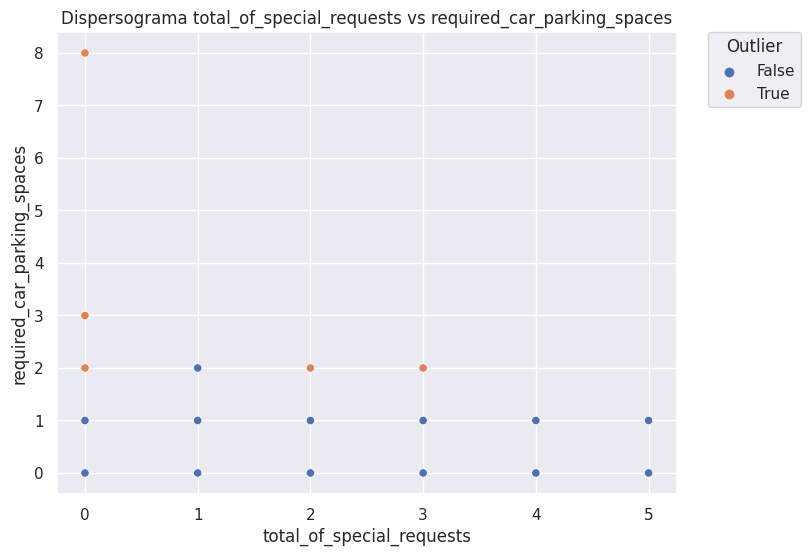

In [253]:
#Grafico scatter
plt.figure(figsize=(8, 6))
es_outlier = (df_with_mahalanobis['mahal_car_parking_spaces_and_special_requests'] > umbral)

sns.scatterplot(x=df_with_mahalanobis.total_of_special_requests,y=df_with_mahalanobis.required_car_parking_spaces, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma total_of_special_requests vs required_car_parking_spaces')
plt.show()

Hay un caso raro, con muchos parking spaces requeridos pero sin ninguna special request. Por ahora queda, pero lo vamos a tener en cuenta.

### ADR, reserved_room_type, assigned_room_type

Para evaluar estas variables cualitativas hacemos una transformación

In [254]:
room_type_dict = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17,'R':18,'S':19,'T':20,'U':21,'V':22,'W':23,'X':24,'Y':25,'Z':26}
df_transformado = df_with_mahalanobis.copy()
df_transformado['reserved_room_type'] = df_transformado['reserved_room_type'].map(room_type_dict,na_action=None)
df_transformado['assigned_room_type'] = df_transformado['assigned_room_type'].map(room_type_dict,na_action=None)


In [255]:
vmedias = np.mean(df_transformado[['adr','reserved_room_type', 'assigned_room_type']], axis=0)

# Paso 2: Calcular la matriz de diferencias
x_dif = df_transformado[['adr','reserved_room_type', 'assigned_room_type']] - vmedias

# Paso 3: Calcular la matriz de covarianza
cov = df_transformado[['adr','reserved_room_type', 'assigned_room_type']].cov().values

# Paso 4: Calcular la descomposición de Cholesky
L = cholesky(cov, lower=True)

# Paso 5: Calcular el producto matricial
z = solve_triangular(L, x_dif.T, lower=True, trans='T')
mahal = np.sum(z**2, axis=0)

# Paso 6: Guardar los resultados
df_transformado['mahalanobis_adr_reserved_room_assigned_room'] = mahal

In [256]:
#Ordeno las distancias de menor a mayor
np.sort(df_transformado.mahalanobis_adr_reserved_room_assigned_room)

array([1.20209327e-01, 1.20209327e-01, 1.20237337e-01, ...,
       1.60960683e+02, 2.08263102e+02, 2.08263102e+02])

In [257]:
umbral=2e+2

#Observacione anómalas
df_transformado[df_transformado['mahalanobis_adr_reserved_room_assigned_room']>umbral]

hotel  lead_time  arrival_date_year arrival_date_month  \
31797  City Hotel          0               2017             August   
54724  City Hotel          0               2017             August   

       arrival_date_week_number  arrival_date_day_of_month  \
31797                        32                         11   
54724                        32                         11   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
31797                        0                     0       0       0.0  ...   
54724                        0                     0       0       0.0  ...   

       deposit_boolean company_boolean booking_changes_boolean  \
31797                0               1                       0   
54724                0               1                       0   

      special_request_boolean special_request_and_changes_made  \
31797                       0                                0   
54724                       0                                0   

       mahalanobis_adults_children_babies  \
31797                           10.075212   
54724                           10.075212   

       mahalanobis_stay_in_week_and_weekend_nights  \
31797                                     2.258309   
54724                                     2.258309   

       mahalanobis_lead_time_and_days_in_waiting_list  \
31797                                        1.044745   
54724                                        1.044745   

       mahal_car_parking_spaces_and_special_requests  \
31797                                        0.49966   
54724                                        0.49966   

       mahalanobis_adr_reserved_room_assigned_room  
31797                                   208.263102  
54724                                   208.263102  

[2 rows x 43 columns]

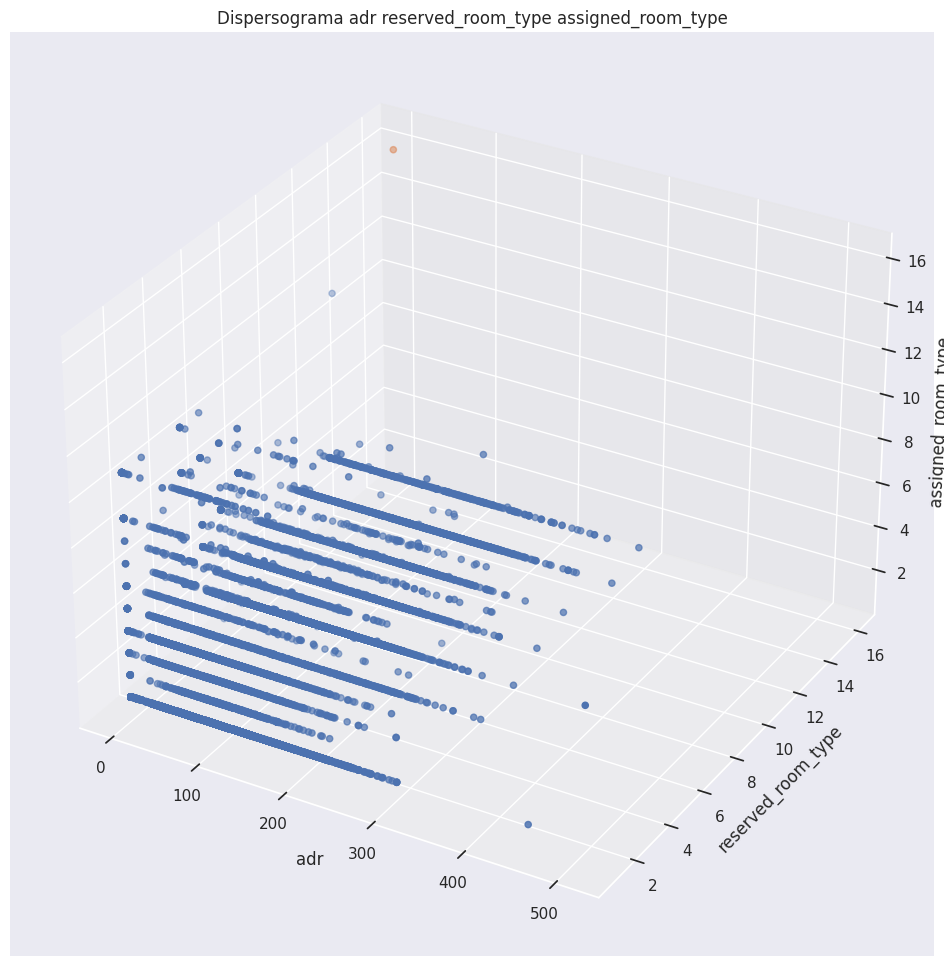

In [258]:
#Gráfico 3D
es_outlier = (df_transformado['mahalanobis_adr_reserved_room_assigned_room'] > umbral)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

color=[f"C{n}" for n in (es_outlier*1)]
ax.scatter(df_transformado.adr,df_transformado.reserved_room_type,df_transformado.assigned_room_type,c=color)
ax.set_xlabel('adr')
ax.set_ylabel('reserved_room_type')
ax.set_zlabel('assigned_room_type')
plt.title('Dispersograma adr reserved_room_type assigned_room_type')
plt.show()

Nada de lo encontrado está muy fuera de lo esperado. Hay un solo caso de una habitación mala reservada y también asignada. Pero coincide con un adr bajo así que tiene sentido. Será tenido en cuenta más adelante.

### booking_changes y total_of_special_request

In [259]:
vmedias = np.mean(df_with_mahalanobis[['booking_changes','total_of_special_requests']], axis=0)

# Paso 2: Calcular la matriz de diferencias
x_dif = df_with_mahalanobis[['booking_changes', 'total_of_special_requests']] - vmedias

# Paso 3: Calcular la matriz de covarianza
cov = df_with_mahalanobis[['booking_changes', 'total_of_special_requests']].cov().values

# Paso 4: Calcular la descomposición de Cholesky
L = cholesky(cov, lower=True)

# Paso 5: Calcular el producto matricial
z = solve_triangular(L, x_dif.T, lower=True, trans='T')
mahal = np.sum(z**2, axis=0)

# Paso 6: Guardar los resultados
df_with_mahalanobis['mahalanobis_booking_changes_special_request'] = mahal

In [260]:
#Ordeno las distancias de menor a mayor
np.sort(df_with_mahalanobis.mahalanobis_booking_changes_special_request)

array([5.19664727e-01, 5.19664727e-01, 5.19664727e-01, ...,
       5.13713096e+02, 5.85012648e+02, 7.54047707e+02])

In [261]:
umbral=5e+2

#Observacione anómalas
df_with_mahalanobis[df_with_mahalanobis['mahalanobis_booking_changes_special_request']>umbral]

hotel  lead_time  arrival_date_year arrival_date_month  \
23955  City Hotel        159               2016                May   
25924  City Hotel        159               2016                May   
46481  City Hotel        159               2016                May   
51688  City Hotel        329               2017                May   

       arrival_date_week_number  arrival_date_day_of_month  \
23955                        22                         26   
25924                        22                         26   
46481                        22                         26   
51688                        19                         10   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
23955                        0                     3       1       0.0  ...   
25924                        0                     3       2       1.0  ...   
46481                        0                     3       2       1.0  ...   
51688                        0                     4       2       0.0  ...   

       deposit_boolean company_boolean booking_changes_boolean  \
23955                0               1                       1   
25924                0               1                       1   
46481                0               1                       1   
51688                0               1                       1   

      special_request_boolean special_request_and_changes_made  \
23955                       0                                0   
25924                       1                                1   
46481                       1                                1   
51688                       1                                1   

       mahalanobis_adults_children_babies  \
23955                            2.215299   
25924                            4.964968   
46481                            4.964968   
51688                            0.129463   

       mahalanobis_stay_in_week_and_weekend_nights  \
23955                                     1.424208   
25924                                     1.424208   
46481                                     1.424208   
51688                                     2.271716   

       mahalanobis_lead_time_and_days_in_waiting_list  \
23955                                        0.200376   
25924                                        0.200376   
46481                                        0.200376   
51688                                        3.858175   

      mahal_car_parking_spaces_and_special_requests  \
23955                                      0.499660   
25924                                      0.435750   
46481                                      0.435750   
51688                                      3.700937   

      mahalanobis_booking_changes_special_request  
23955                                  513.713096  
25924                                  585.012648  
46481                                  754.047707  
51688                                  506.724466  

[4 rows x 43 columns]

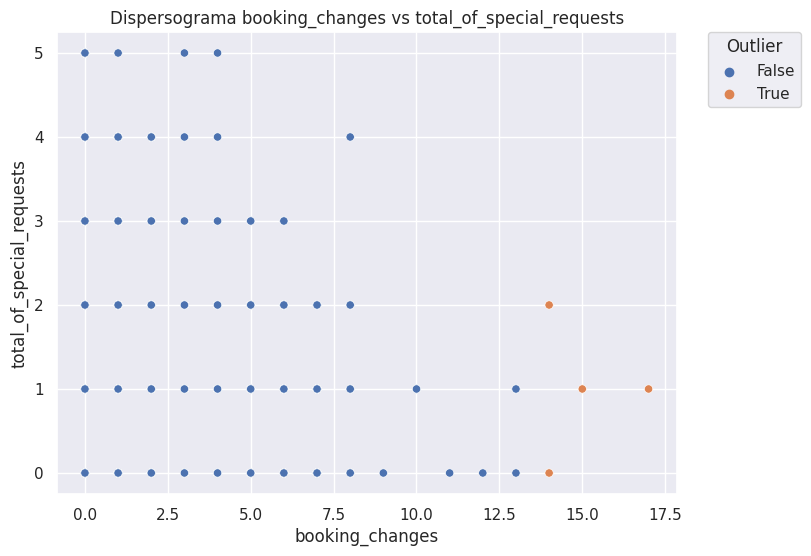

In [262]:
#Grafico scatter
plt.figure(figsize=(8, 6))
es_outlier = (df_with_mahalanobis['mahalanobis_booking_changes_special_request'] > umbral)

sns.scatterplot(x=df_with_mahalanobis.booking_changes,y=df_with_mahalanobis.total_of_special_requests, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma booking_changes vs total_of_special_requests')
plt.show()

Nada fuera de lo esperable. Hay casos de muchos booking changes, por ahora no molestan.

### total_of_special_request y adr

In [263]:
vmedias = np.mean(df_with_mahalanobis[['adr','total_of_special_requests']], axis=0)

# Paso 2: Calcular la matriz de diferencias
x_dif = df_with_mahalanobis[['adr', 'total_of_special_requests']] - vmedias

# Paso 3: Calcular la matriz de covarianza
cov = df_with_mahalanobis[['adr', 'total_of_special_requests']].cov().values

# Paso 4: Calcular la descomposición de Cholesky
L = cholesky(cov, lower=True)

# Paso 5: Calcular el producto matricial
z = solve_triangular(L, x_dif.T, lower=True, trans='T')
mahal = np.sum(z**2, axis=0)

# Paso 6: Guardar los resultados
df_with_mahalanobis['mahalanobis_adr_special_request'] = mahal

In [264]:
#Ordeno las distancias de menor a mayor
np.sort(df_with_mahalanobis.mahalanobis_adr_special_request)

array([ 0.38954234,  0.38954234,  0.38954234, ..., 53.54672892,
       54.15514794, 73.45378447])

In [265]:
umbral=50

#Observacione anómalas
df_with_mahalanobis[df_with_mahalanobis['mahalanobis_adr_special_request']>umbral]

hotel  lead_time  arrival_date_year arrival_date_month  \
50065  Resort Hotel        378               2017             August   
55265    City Hotel          0               2017                May   
59109  Resort Hotel        231               2017             August   

       arrival_date_week_number  arrival_date_day_of_month  \
50065                        31                          1   
55265                        19                          9   
59109                        31                          2   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
50065                        4                    10       2       0.0  ...   
55265                        0                     1       1       0.0  ...   
59109                        2                     4       2       2.0  ...   

       company_boolean booking_changes_boolean special_request_boolean  \
50065                1                       0                       0   
55265                1                       0                       0   
59109                1                       1                       1   

      special_request_and_changes_made mahalanobis_adults_children_babies  \
50065                                0                           0.129463   
55265                                0                           2.215299   
59109                                1                          22.100071   

       mahalanobis_stay_in_week_and_weekend_nights  \
50065                                    21.944999   
55265                                     1.417504   
59109                                     1.758282   

       mahalanobis_lead_time_and_days_in_waiting_list  \
50065                                        5.787497   
55265                                        1.044745   
59109                                        1.174208   

       mahal_car_parking_spaces_and_special_requests  \
50065                                       0.499660   
55265                                       0.499660   
59109                                      50.892065   

      mahalanobis_booking_changes_special_request  \
50065                                    0.527201   
55265                                    0.527201   
59109                                   66.249770   

      mahalanobis_adr_special_request  
50065                       53.546729  
55265                       73.453784  
59109                       54.155148  

[3 rows x 44 columns]

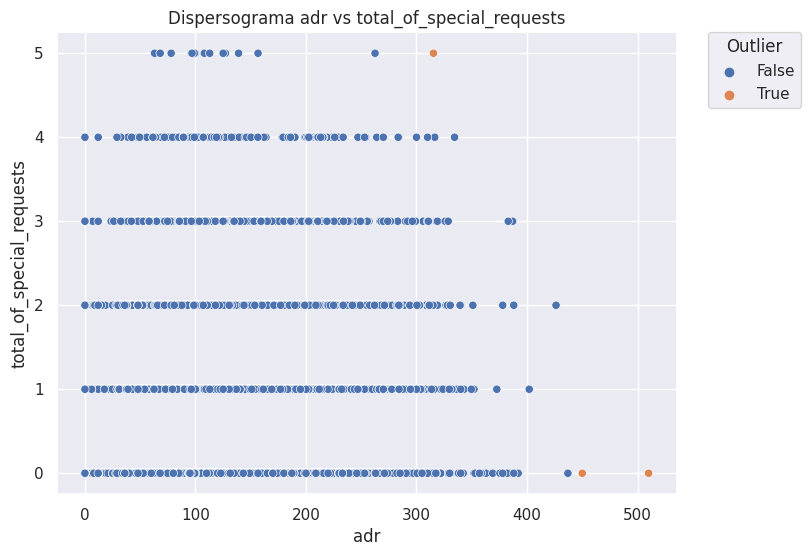

In [266]:
#Grafico scatter
plt.figure(figsize=(8, 6))
es_outlier = (df_with_mahalanobis['mahalanobis_adr_special_request'] > umbral)

sns.scatterplot(x=df_with_mahalanobis.adr,y=df_with_mahalanobis.total_of_special_requests, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma adr vs total_of_special_requests')
plt.show()

Obsercamos que mayor cantidad de special requests, no necesariamente implico mayor promedio de gastos. Observamos ciertos outliers de manera bidimensional, pero serían casos de outliers tambien detectados de manera unidimensional.

# Correlaciones para las variables numéricas.

Graficamos las variables de a pares, aplicamos Correlación de Pearson y generamos un heatmap para poder evaluar las relaciones entre las variables:

In [ ]:
matriz_correlacion_original = df_hotels_train_original.corr()
matriz_correlacion_original

lead_time  arrival_date_year  \
lead_time                        1.000000           0.023186   
arrival_date_year                0.023186           1.000000   
arrival_date_week_number         0.134793          -0.540542   
arrival_date_day_of_month       -0.006937           0.002326   
stays_in_weekend_nights          0.059463           0.027066   
stays_in_week_nights             0.140110           0.040803   
adults                           0.110942           0.026576   
children                        -0.046058           0.059412   
babies                          -0.022872          -0.013745   
is_repeated_guest               -0.108033          -0.004587   
previous_cancellations           0.094634          -0.142232   
previous_bookings_not_canceled  -0.068102           0.027109   
booking_changes                 -0.019736           0.027285   
agent                           -0.078786           0.081634   
company                          0.150773           0.243066   
days_in_waiting_list             0.166423          -0.058523   
adr                             -0.094559           0.217409   
required_car_parking_spaces     -0.113772          -0.011620   
total_of_special_requests       -0.122760           0.107899   
is_canceled                      0.293816           0.019923   

                                arrival_date_week_number  \
lead_time                                       0.134793   
arrival_date_year                              -0.540542   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.057730   
stays_in_weekend_nights                         0.014127   
stays_in_week_nights                            0.012200   
adults                                          0.025886   
children                                        0.006355   
babies                                          0.016215   
is_repeated_guest                              -0.022037   
previous_cancellations                          0.045530   
previous_bookings_not_canceled                 -0.023897   
booking_changes                                 0.012086   
agent                                          -0.043968   
company                                        -0.040886   
days_in_waiting_list                            0.019328   
adr                                             0.075427   
required_car_parking_spaces                     0.001424   
total_of_special_requests                       0.029283   
is_canceled                                     0.008357   

                                arrival_date_day_of_month  \
lead_time                                       -0.006937   
arrival_date_year                                0.002326   
arrival_date_week_number                         0.057730   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.015518   
stays_in_week_nights                            -0.026449   
adults                                           0.002449   
children                                         0.013991   
babies                                           0.002568   
is_repeated_guest                               -0.005230   
previous_cancellations                          -0.034516   
previous_bookings_not_canceled                  -0.002026   
booking_changes                                  0.009522   
agent                                            0.002600   
company                                          0.049011   
days_in_waiting_list                             0.027754   
adr                                              0.033695   
required_car_parking_spaces                      0.000295   
total_of_special_requests                        0.007744   
is_canceled                                     -0.007371   

                                stays_in_weekend_nights  stays_in_week_nights  \
lead_time                                      0.059463        

<Axes: >

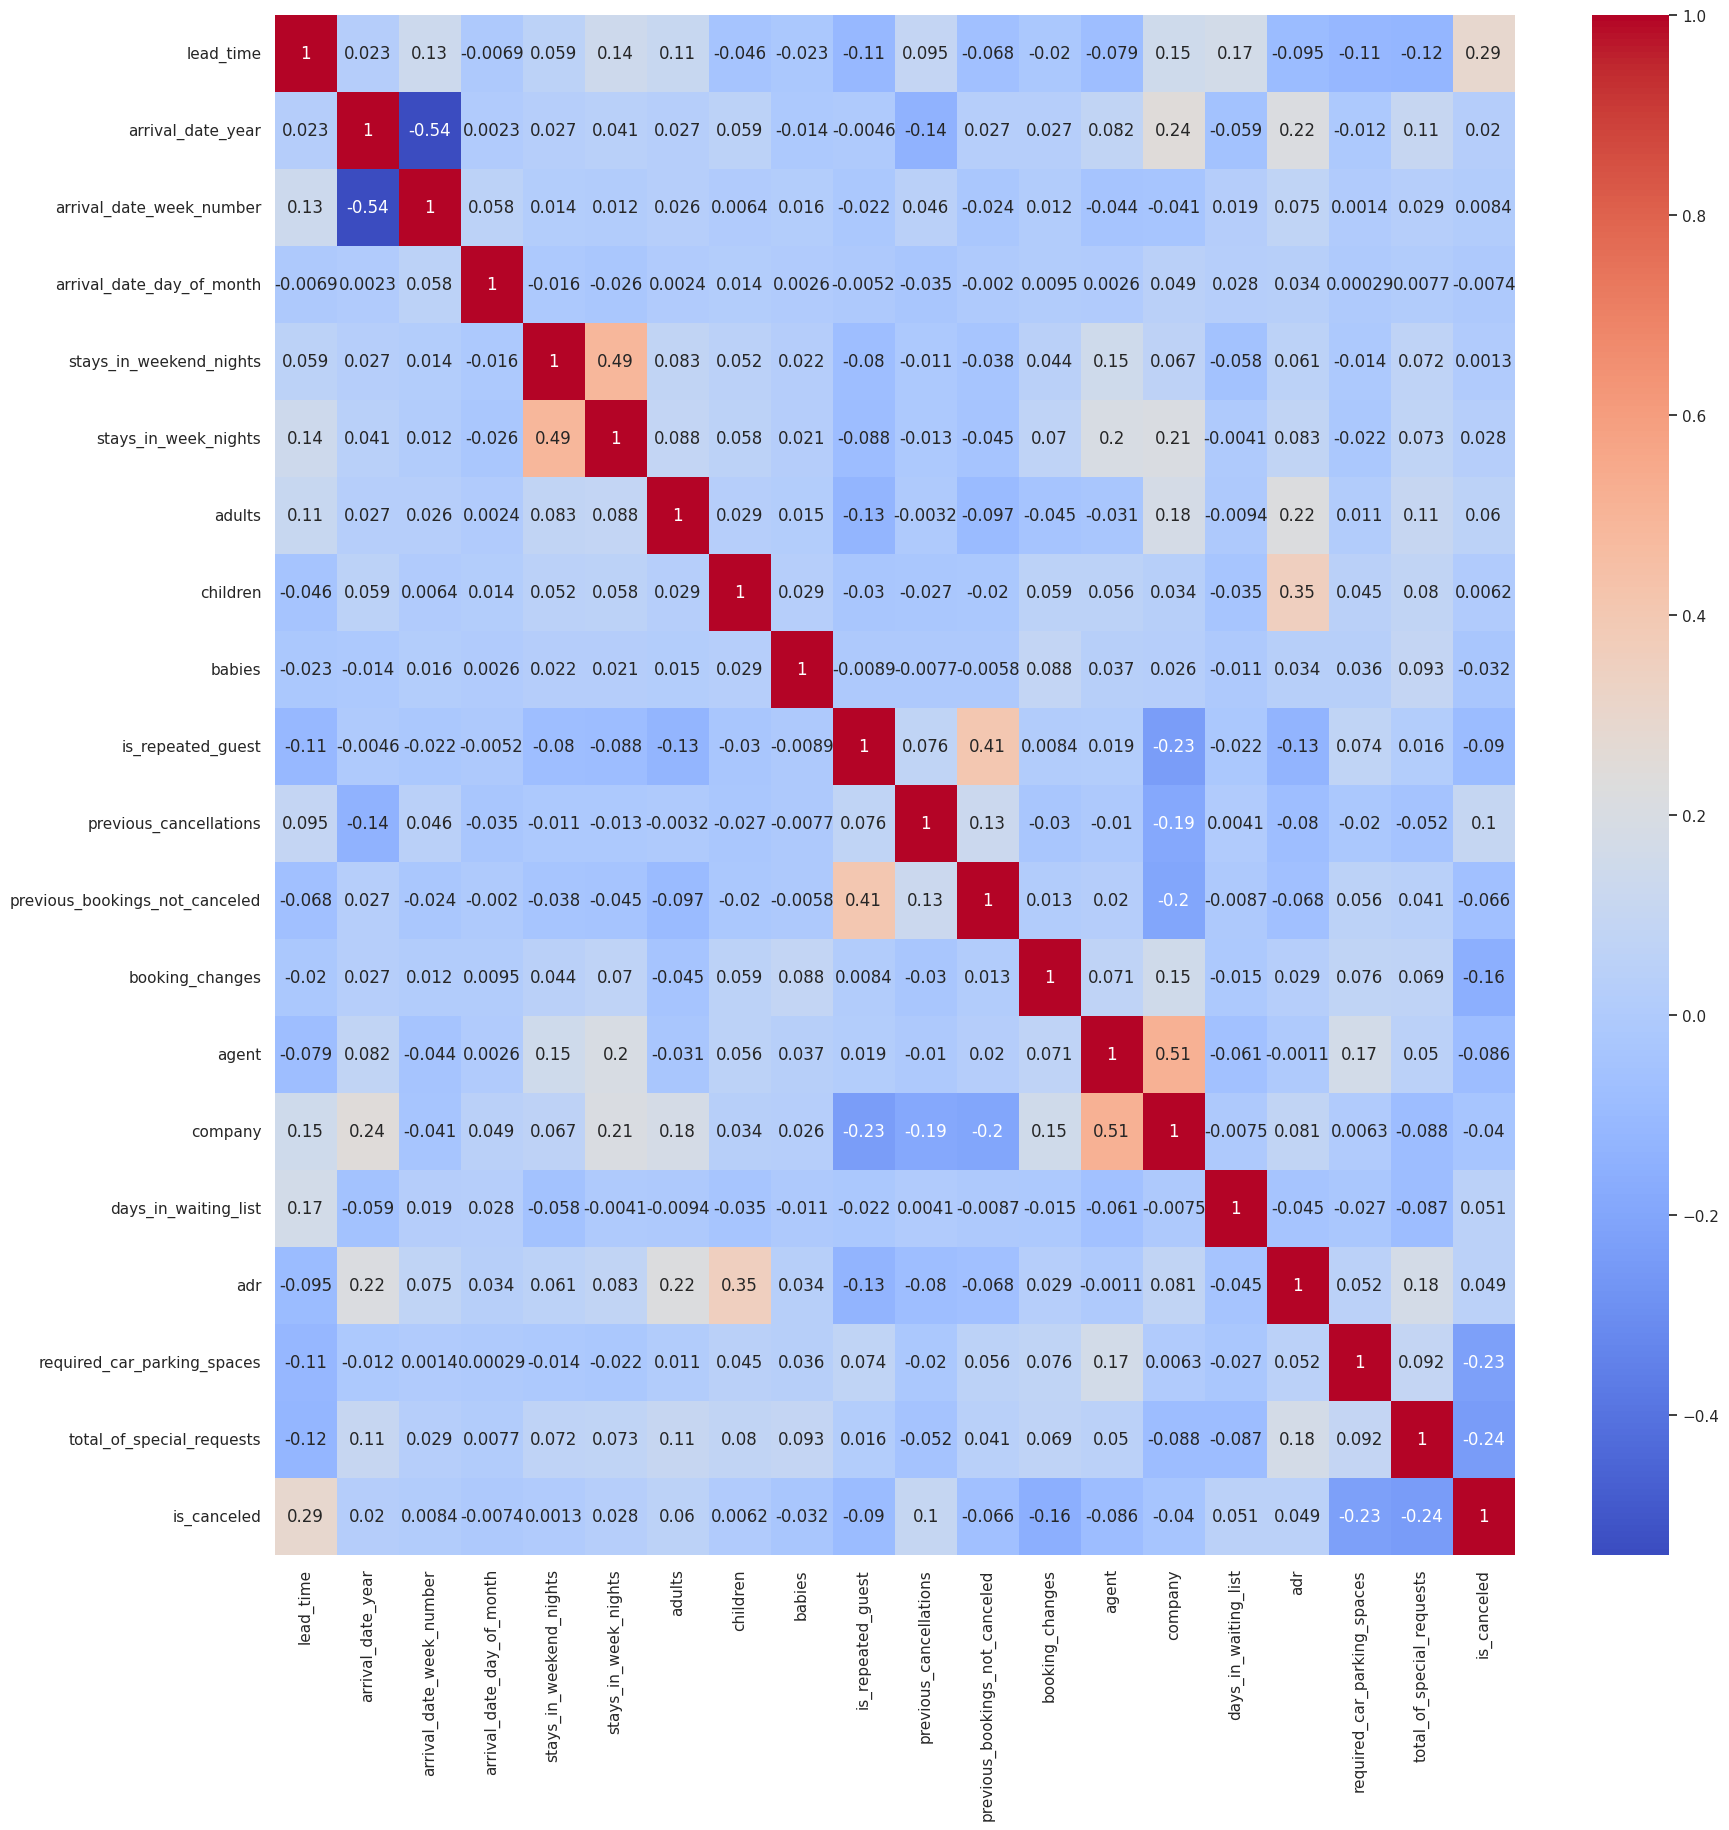

In [ ]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(matriz_correlacion_original, annot = True, cmap='coolwarm')

Aclaremos que para ciertas variables a pesar de ser numéricas la correlación no tiene sentido ya que su valor númerico indica una categoría. Como si fue o no cancelado para is_canceled.

Dentro de las variables que si tiene sentido hablar de correlación vemos como stays_in_week_nights y stays_in_weekend_nights tienen una correlación lineal mediana. Esto tiene sentido debido a que quedarse más noches de semana termina implicando quedarse más noches de fin de semana, mientras el incremento en noches de semana implique tener un fin de semana en el medio. Esto nos podría servir para reducir la dimensionalidad del dataset en el futuro.

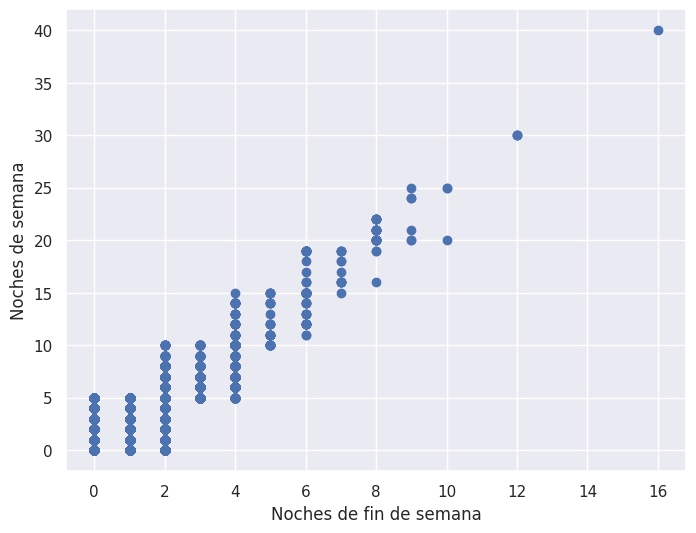

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_hotels_train_copy["stays_in_weekend_nights"], df_hotels_train_copy["stays_in_week_nights"])

# Agregar etiquetas de los ejes
plt.xlabel("Noches de fin de semana")
plt.ylabel("Noches de semana")

# Mostrar el gráfico
plt.show()

Ahora hacemos lo mismo pero con el df de copy que fuimos modificando

In [ ]:
df_hotels_train_copy.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'id', 'is_canceled', 'is_portuguese',
       'deposit_boolean', 'company_boolean', 'booking_changes_boolean',
       'special_request_boolean', 'special_request_and_changes_made'],
      dtype='object')

In [ ]:
matriz_correlacion_copy = df_hotels_train_copy.corr()
matriz_correlacion_copy

lead_time  arrival_date_year  \
lead_time                          1.000000           0.023140   
arrival_date_year                  0.023140           1.000000   
arrival_date_week_number           0.134620          -0.540415   
arrival_date_day_of_month         -0.006911           0.002053   
stays_in_weekend_nights            0.057817           0.027037   
stays_in_week_nights               0.138748           0.041311   
adults                             0.108644           0.026222   
children                          -0.046660           0.059170   
babies                            -0.023093          -0.013894   
is_repeated_guest                 -0.108615          -0.004864   
previous_cancellations             0.094490          -0.142359   
previous_bookings_not_canceled    -0.066015           0.027878   
booking_changes                   -0.019626           0.027340   
agent                             -0.026567           0.071400   
company                           -0.084767           0.031917   
days_in_waiting_list               0.166360          -0.058864   
adr                               -0.097494           0.217706   
required_car_parking_spaces       -0.112843          -0.011083   
total_of_special_requests         -0.123034           0.108208   
is_canceled                        0.292580           0.019758   
is_portuguese                      0.141694          -0.214386   
deposit_boolean                    0.404741          -0.076989   
company_boolean                         NaN                NaN   
booking_changes_boolean           -0.031613           0.019891   
special_request_boolean           -0.146331           0.121308   
special_request_and_changes_made  -0.020168           0.039548   

                                  arrival_date_week_number  \
lead_time                                         0.134620   
arrival_date_year                                -0.540415   
arrival_date_week_number                          1.000000   
arrival_date_day_of_month                         0.057531   
stays_in_weekend_nights                           0.013488   
stays_in_week_nights                              0.011616   
adults                                            0.025556   
children                                          0.006394   
babies                                            0.016263   
is_repeated_guest                                -0.022085   
previous_cancellations                            0.045447   
previous_bookings_not_canceled                   -0.023927   
booking_changes                                   0.011958   
agent                                            -0.029970   
company                                          -0.030391   
days_in_waiting_list                              0.019389   
adr                                               0.075091   
required_car_parking_spaces                       0.001610   
total_of_special_requests                         0.029067   
is_canceled                                       0.007573   
is_portuguese                                     0.033664   
deposit_boolean                                   0.007466   
company_boolean                                        NaN   
booking_changes_boolean                           0.011893   
special_request_boolean                           0.013126   
special_request_and_changes_made                  0.020071   

                                  arrival_date_day_of_month  \
lead_time                                         -0.006911   
arrival_date_year                                  0.002053   
arrival_date_week_number                           0.057531   
arrival_date_day_of_month                          1.000000   
stays_in_weekend_nights                           -0.015707   
stays_in_week_nights                              -0.026445   
adults                                             0.002313   
children                                           0.013915   
babies   

<Axes: >

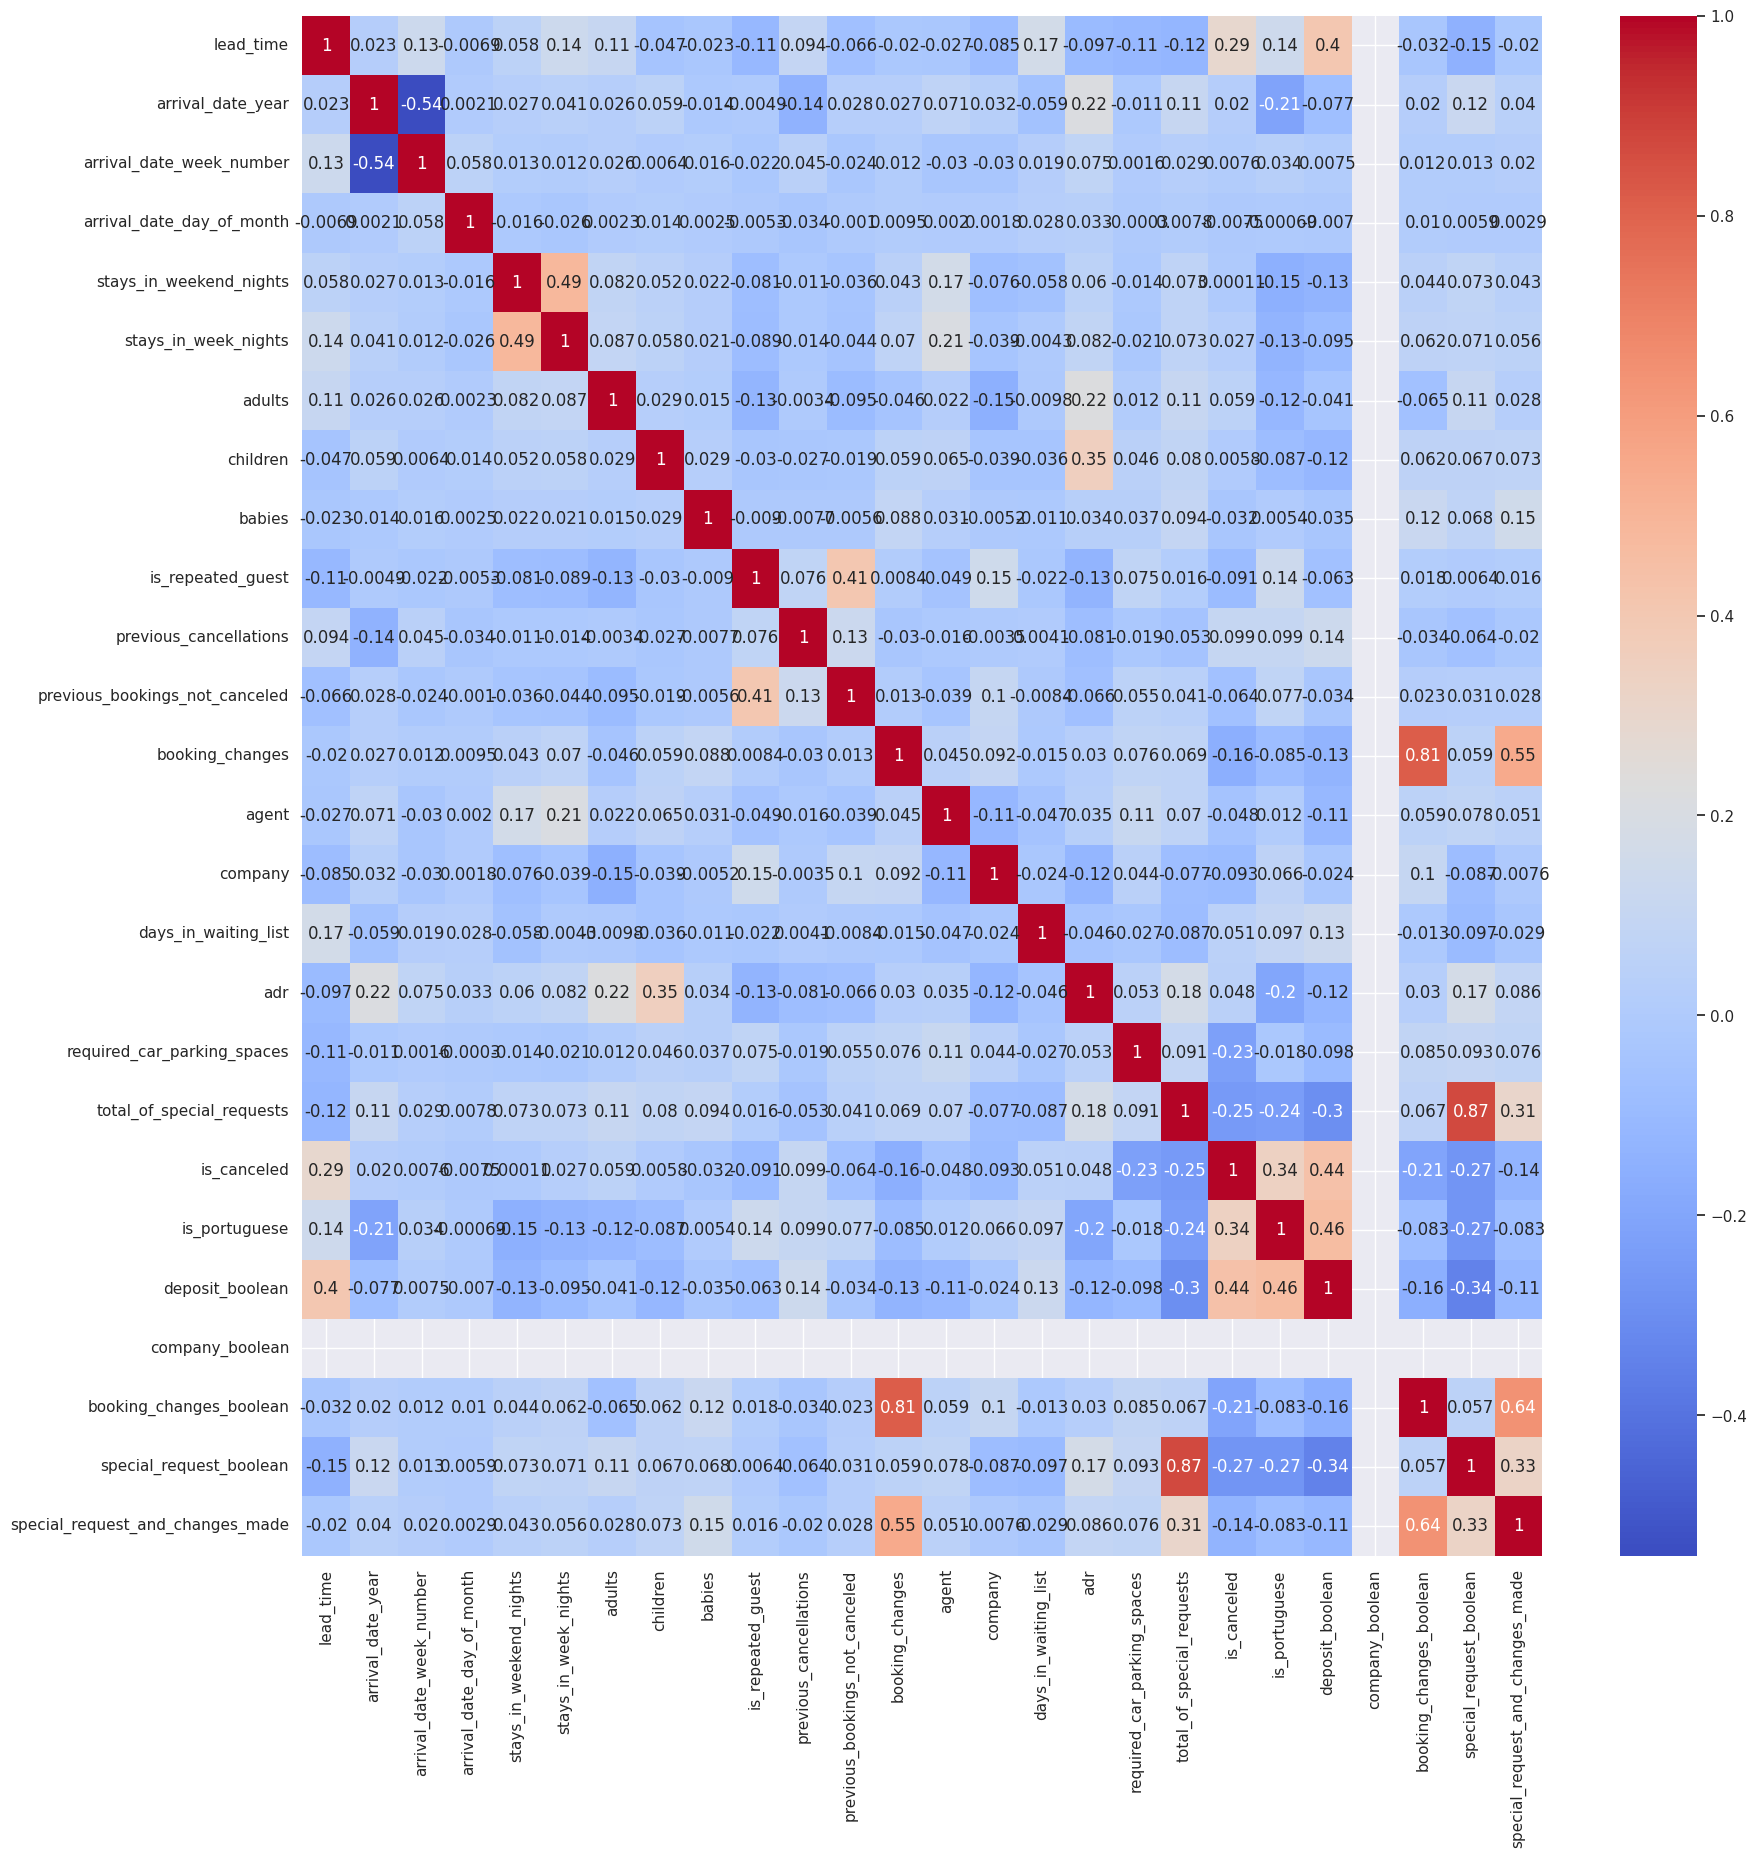

In [ ]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(matriz_correlacion_copy, annot = True, cmap='coolwarm')

# Arboles de decision

### Librerías


In [267]:
!pip install 'dtreeviz'
from sklearn.preprocessing import OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 5.5 MB/s eta 0:00:00


In [268]:

#Visualización
import dtreeviz.trees as dtreeviz


#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report
#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from matplotlib import pyplot as plt
from IPython import display
import logging
from sklearn.tree import export_text

logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

Vamos a utilizar el df 'df_hotels_train_copy' porque ya se ha hecho el trabajo de limpieza y se han añadido variables interesantes

### Creacion del df


Utilizamos el df creado previamente durante la exploración del dataset

In [269]:

df_test_arboles = df_hotels_test_copy.copy()

df_train_arboles = df_hotels_train_copy.copy()

df_train_arboles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61688 entries, 0 to 61687
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hotel                             61688 non-null  object 
 1   lead_time                         61688 non-null  int64  
 2   arrival_date_year                 61688 non-null  int64  
 3   arrival_date_month                61688 non-null  object 
 4   arrival_date_week_number          61688 non-null  int64  
 5   arrival_date_day_of_month         61688 non-null  int64  
 6   stays_in_weekend_nights           61688 non-null  int64  
 7   stays_in_week_nights              61688 non-null  int64  
 8   adults                            61688 non-null  int64  
 9   children                          61688 non-null  float64
 10  babies                            61688 non-null  int64  
 11  meal                              61688 non-null  object 
 12  coun

Hay varias variables que no son numéricas :

*   "hotel"
*   "arrival_date_month"
*   "meal", "country"
* "market_segment"
* "distribution_channel"
* "reserved_room_type", "assigned_room_type"
* "deposit_type"
* "customer_type"
* "reservation_status"
* "reservation_status_date"
* "id"

Veamos cómo podemos tratar cada una de estas variables

## Preprocesamiento

### One hot encoding of categories

'hotel','customer_type','meal', market_segment and 'deposit_type' sólo tienen un pequeño número de valores posibles.

####Pandas one hot encoder

In [270]:
#df_train_arboles = pd.get_dummies(df_train_arboles, columns=['hotel','customer_type','meal','deposit_type','distribution_channel','market_segment'], drop_first=False)

#df_test_arboles = pd.get_dummies(df_test_arboles, columns=['hotel','customer_type','meal','deposit_type','distribution_channel','market_segment'], drop_first=False)


####Con Sci-Kit learn encoder

In [271]:
# select columns to be one-hot encoded
columns_to_one_hot_encode = ['hotel','customer_type','meal','distribution_channel','market_segment']

# create instance of OneHotEncoder
encoder = OneHotEncoder(categories=[
    df_train_arboles['hotel'].unique(), #hotel
    df_train_arboles['customer_type'].unique(), #customer_type
     [c for c in df_train_arboles['meal'].unique()], #meal
    [c for c in df_train_arboles['distribution_channel'].unique()], #distribution_channel
    [c for c in df_train_arboles['market_segment'].unique()] #market_segment
    ], drop='first', sparse=False, handle_unknown='ignore')

Train

In [272]:
# store names of columns and index
column_names = df_train_arboles.columns
index = df_train_arboles.index

# fit and transform selected columns
one_hot_encoded_columns_train = encoder.fit_transform(df_train_arboles[columns_to_one_hot_encode])

# create dataframe from encoded columns
one_hot_encoded_train_df = pd.DataFrame(data=one_hot_encoded_columns_train, columns=encoder.get_feature_names_out(columns_to_one_hot_encode), index=index)
# concatenate with original dataframe
df_train_arboles = pd.concat([df_train_arboles[column_names], one_hot_encoded_train_df], axis=1)


Test

In [273]:
# store names of columns and index
column_names = df_test_arboles.columns
index = df_test_arboles.index

one_hot_encoded_columns_test = encoder.transform(df_test_arboles[columns_to_one_hot_encode])

# create dataframe from encoded columns
one_hot_encoded_test_df = pd.DataFrame(data=one_hot_encoded_columns_test, columns=encoder.get_feature_names_out(columns_to_one_hot_encode), index=index)

# concatenate with original dataframe
df_test_arboles = pd.concat([df_test_arboles[column_names], one_hot_encoded_test_df], axis=1)

### Encoding country

Para el país, podemos conservar la informacion sobre sólo los que representen más del 1% del conjunto de datos. 

In [274]:
df_train_arboles.country.value_counts().sort_values(ascending=False).head(15)/df_train_arboles.shape[0]*100

PRT    45.302166
GBR     9.293542
FRA     7.795681
ESP     6.824666
DEU     5.368953
ITA     3.097847
IRL     2.621255
BRA     1.867462
BEL     1.822072
USA     1.655103
NLD     1.591882
CHE     1.373039
CN      0.967773
AUT     0.941836
CHN     0.883478
Name: country, dtype: float64

Entonces vamos a conservar estos países : 
PRT, GBR, FRA, ESP, DEU, ITA, IRL, BRA, BEL, USA, NLD, CHE, AUT.

####Usando OrdinalEncoding para country

Vamos a asignar uno numero à todos (1,2,3,...,12,13) y poner 0 por los otros.

In [275]:
#country_dict = {'PRT': 1,'GBR': 2,'FRA': 3,'ESP': 4,'DEU': 5,'ITA': 6,'IRL': 7,'BRA': 8,'BEL': 9,'USA': 10,'NLD': 11,'CHE': 12,'AUT': 13}

#df_train_arboles['country_numero'] = df_train_arboles['country'].map(country_dict,na_action=None).fillna(0)

#df_test_arboles['country_numero'] = df_test_arboles['country'].map(country_dict,na_action=None).fillna(0)

#df_train_arboles.country_numero.value_counts()

####Usando OneHotEncoding para country

Tener en cuenta que categoría de pais se dropea, ya que si se dropea country_PTR por ejemplo, no permitiría al árbol hacer la pregunta si la reserva es de portugal o no.

In [276]:
# select columns to be one-hot encoded
columns_to_encode = ['country']

# create instance of OneHotEncoder
encoder = OneHotEncoder(categories=[
    ['AUT', 'PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BRA', 'BEL', 'USA', 'NLD', 'CHE', ],
   ], drop='first', sparse=False, handle_unknown='ignore')


Train

In [277]:
# store names of columns and index
column_names = df_train_arboles.columns
index = df_train_arboles.index

# fit and transform selected columns
one_hot_encoded_columns = encoder.fit_transform(df_train_arboles[columns_to_encode])

# create dataframe from encoded columns
one_hot_encoded_df = pd.DataFrame(data=one_hot_encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode), index=index)
# concatenate with original dataframe
df_restored = pd.concat([df_train_arboles[column_names], one_hot_encoded_df], axis=1)

# print the result
df_train_arboles = df_restored

Test

In [278]:
# store names of columns and index
column_names = df_test_arboles.columns
index = df_test_arboles.index

# fit and transform selected columns
one_hot_encoded_columns = encoder.transform(df_test_arboles[columns_to_encode])

# create dataframe from encoded columns
one_hot_encoded_df = pd.DataFrame(data=one_hot_encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode), index=index)
# concatenate with original dataframe
df_restored = pd.concat([df_test_arboles[column_names], one_hot_encoded_df], axis=1)

# print the result
df_test_arboles = df_restored

###Encoding Agent

Los agents no tienen ordenamiento por lo que dejar la columna implicaría que el árbol de decisión tenga en cuenta este falseo orden. Por lo que haremos un on hot encoding. Además en el gráfico mostrado en la variable agents, todas las reservas con agentes en el top de frecuencias tiene una inclinación clara hacia cancelación o no cancelación.


Para el agent, podemos conservar la informacion sobre sólo los que representen más del 1% del conjunto de datos. 

In [279]:
df_train_arboles.agent.value_counts().sort_values(ascending=False).head(15)/df_train_arboles.shape[0]*100

9.0      27.561276
0.0      12.553495
240.0    11.929387
1.0       7.171573
14.0      2.752561
6.0       2.648813
7.0       2.562897
250.0     2.175464
241.0     1.244975
3.0       1.197964
8.0       1.186617
37.0      1.176890
28.0      1.128258
19.0      1.073142
21.0      0.886720
Name: agent, dtype: float64

Entonces vamos a conservar estos agents : 9, 0, 240, 1, 14, 6, 7, 250, 241, 3, 8, 37, 28, 19.

In [280]:
#select columns to be one-hot encoded
columns_to_encode = ['agent']

# create a sample array of unsorted numerical categories
categories = np.array([0, 1, 3, 6, 7, 8, 9, 14, 89, 28, 37, 240, 241, 250])

# sort the categories in ascending order
sorted_categories = np.sort(categories)

# create instance of OneHotEncoder
encoder = OneHotEncoder(categories=[sorted_categories], drop='first', sparse=False, handle_unknown='ignore')


Train




In [281]:
# store names of columns and index
column_names = df_train_arboles.columns
index = df_train_arboles.index

# Transform to category
df_train_arboles['agent'] = df_train_arboles['agent'].astype('category')

# fit and transform selected columns
one_hot_encoded_columns = encoder.fit_transform(df_train_arboles[columns_to_encode])

# create dataframe from encoded columns
one_hot_encoded_df = pd.DataFrame(data=one_hot_encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode), index=index)
# concatenate with original dataframe
df_restored = pd.concat([df_train_arboles[column_names], one_hot_encoded_df], axis=1)

# print the result
df_train_arboles = df_restored

Test

In [282]:
# store names of columns and index
column_names = df_test_arboles.columns
index = df_test_arboles.index

# Transform to category
df_test_arboles['agent'] = df_test_arboles['agent'].astype('category')

# fit and transform selected columns
one_hot_encoded_columns = encoder.transform(df_test_arboles[columns_to_encode])

# create dataframe from encoded columns
one_hot_encoded_df = pd.DataFrame(data=one_hot_encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode), index=index)
# concatenate with original dataframe
df_restored = pd.concat([df_test_arboles[column_names], one_hot_encoded_df], axis=1)

# print the result
df_test_arboles = df_restored

###Encoding room types

####One hot encoding

In [283]:
#select columns to be one-hot encoded
columns_to_encode = ['reserved_room_type', 'assigned_room_type']

# create a sample array of unsorted numerical categories
categories = [['H', 'A', 'B', 'C', 'D', 'E', 'F', 'G'], ['H', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'K']]

# create instance of OneHotEncoder
encoder = OneHotEncoder(categories=categories, drop='first', sparse=False, handle_unknown='ignore')

Train


In [284]:
# store names of columns and index
column_names = df_train_arboles.columns
index = df_train_arboles.index

# fit and transform selected columns
one_hot_encoded_columns = encoder.fit_transform(df_train_arboles[columns_to_encode])

# create dataframe from encoded columns
one_hot_encoded_df = pd.DataFrame(data=one_hot_encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode), index=index)
# concatenate with original dataframe
df_restored = pd.concat([df_train_arboles[column_names], one_hot_encoded_df], axis=1)

# print the result
df_train_arboles = df_restored

Test

In [285]:
# store names of columns and index
column_names = df_test_arboles.columns
index = df_test_arboles.index

# fit and transform selected columns
one_hot_encoded_columns = encoder.transform(df_test_arboles[columns_to_encode])

# create dataframe from encoded columns
one_hot_encoded_df = pd.DataFrame(data=one_hot_encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode), index=index)
# concatenate with original dataframe
df_restored = pd.concat([df_test_arboles[column_names], one_hot_encoded_df], axis=1)

# print the result
df_test_arboles = df_restored

####OrdinalEncoding

Para 'arrival_date_month' se asignará un número a cada mes

In [286]:
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df_train_arboles['arrival_date_month'] = df_train_arboles['arrival_date_month'].map(month_dict,na_action=None)

df_test_arboles['arrival_date_month'] = df_test_arboles['arrival_date_month'].map(month_dict,na_action=None)

Hacemos lo mismo para los 'room_type', asignamos un número a cada valor

In [287]:
room_type_dict = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17,'R':18,'S':19,'T':20,'U':21,'V':22,'W':23,'X':24,'Y':25,'Z':26}
df_train_arboles['reserved_room_type'] = df_train_arboles['reserved_room_type'].map(room_type_dict,na_action=None)
df_train_arboles['assigned_room_type'] = df_train_arboles['assigned_room_type'].map(room_type_dict,na_action=None)

df_test_arboles['reserved_room_type'] = df_test_arboles['reserved_room_type'].map(room_type_dict,na_action=None)
df_test_arboles['assigned_room_type'] = df_test_arboles['assigned_room_type'].map(room_type_dict,na_action=None)


### Selección de atributos
Ahora podemos ordenar las variables que queremos conservar : 

* 'id' es inútil porque es específico para cada entrada
* 'country' ha sido procesado con oneHotEncoding
* is_portuguese esta incluido en el oneHotEncoding
* deposit_type esta incluido en el en deposit_boolean
* arrival_date_month ya que la variable arrival_date_week_number incluye la información de esta y aun más.
* special_request_boolean
* special_request_and_changes_made
* booking_changes_boolean
* 'reservation_status_date' ##TODO

Tambien tenemos que eliminar las variables que fueron transformadas con oneHotEncoding


In [288]:
columnas_eliminar_test = ['assigned_room_type', 'reserved_room_type', 'company', 'is_portuguese', 'special_request_boolean', 'special_request_and_changes_made', 'booking_changes_boolean', 'agent', 'company_boolean' ,'country', 'deposit_type','reservation_status_date', 'arrival_date_month'] + columns_to_one_hot_encode
columnas_eliminar_train= columnas_eliminar_test + ['id']
#columnas_eliminar_train=['company','country','reservation_status_date','id']
#columnas_eliminar_test=['company','country','reservation_status_date','id']
df_train_arboles.drop(columnas_eliminar_train, axis='columns', inplace=True)  #Elimina columna sobre el mismo dataframe
df_test_arboles.drop(columnas_eliminar_test, axis='columns', inplace=True)  #Elimina columna sobre el mismo dataframe

###Revisada previa al entrenamiento

Veamos qué aspecto tiene ahora nuestro df

In [289]:
df_train_arboles.info()
df_train_arboles.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61688 entries, 0 to 61687
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       61688 non-null  int64  
 1   arrival_date_year               61688 non-null  int64  
 2   arrival_date_week_number        61688 non-null  int64  
 3   arrival_date_day_of_month       61688 non-null  int64  
 4   stays_in_weekend_nights         61688 non-null  int64  
 5   stays_in_week_nights            61688 non-null  int64  
 6   adults                          61688 non-null  int64  
 7   children                        61688 non-null  float64
 8   babies                          61688 non-null  int64  
 9   is_repeated_guest               61688 non-null  int64  
 10  previous_cancellations          61688 non-null  int64  
 11  previous_bookings_not_canceled  61688 non-null  int64  
 12  booking_changes                 

(61688, 76)

In [290]:
df_test_arboles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26535 entries, 0 to 26534
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       26535 non-null  int64  
 1   arrival_date_year               26535 non-null  int64  
 2   arrival_date_week_number        26535 non-null  int64  
 3   arrival_date_day_of_month       26535 non-null  int64  
 4   stays_in_weekend_nights         26535 non-null  int64  
 5   stays_in_week_nights            26535 non-null  int64  
 6   adults                          26535 non-null  int64  
 7   children                        26535 non-null  float64
 8   babies                          26535 non-null  int64  
 9   is_repeated_guest               26535 non-null  int64  
 10  previous_cancellations          26535 non-null  int64  
 11  previous_bookings_not_canceled  26535 non-null  int64  
 12  booking_changes                 

Comprobación de valores cero

In [291]:
print(df_train_arboles.isna().sum())

lead_time                    0
arrival_date_year            0
arrival_date_week_number     0
arrival_date_day_of_month    0
stays_in_weekend_nights      0
                            ..
assigned_room_type_E         0
assigned_room_type_F         0
assigned_room_type_G         0
assigned_room_type_I         0
assigned_room_type_K         0
Length: 76, dtype: int64


## Entrenamiento y Predicción

### División Train - validation

In [ ]:
#Creo un dataset con los features que voy a usar para clasificar
df_train_arboles_x = df_train_arboles.drop(['is_canceled'], axis='columns', inplace=False)

#Creo un dataset con la variable target
df_train_arboles_y = df_train_arboles['is_canceled'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(df_train_arboles_x, 
                                                    df_train_arboles_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2, #semilla
                                                    stratify=df_train_arboles_y)


In [ ]:
#Analizo las proporciones
print("# Datos entrenamiento: {}".format(len(x_train)))
print("$ Datos prueba: {}".format(len(x_test)))

for split_name, split in zip(['% Cancelados entrenamiento', '% Cancelados prueba'], [y_train, y_test]):
  print('{}: {:.3f}'.format(split_name, pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos entrenamiento: 43181
$ Datos prueba: 18507
% Cancelados entrenamiento: 50.071
% Cancelados prueba: 50.073


In [ ]:
#Creo un clasificador
tree_model = tree.DecisionTreeClassifier(criterion="gini",
                                         max_depth = 17,  
                                         ccp_alpha=0.00011111111111111112)

# {'ccp_alpha': 0.00011111111111111112, 'criterion': 'gini', 'max_depth': 17}
#Entreno el modelo
model = tree_model.fit(X = x_train, y = y_train) 

In [ ]:
#Realizamos una predicción sobre el set de test
y_pred = model.predict(x_test)
#Valores Predichos
y_pred



array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
header = 'is_canceled'

np.savetxt('prediccion_1.csv', y_pred.astype(int), header=header,comments='', delimiter=',', fmt='%d')
df = pd.read_csv('prediccion_1.csv')
df['id'] = df_hotels_test_copy['id']
df.to_csv('submit_1.csv', index=False)


In [ ]:
print(y_pred.shape,y_test.shape)

(18507,) (18507,)


### Importancia de atributos

In [ ]:
sorted(list(zip(df_train_arboles_x.columns.to_list(), model.feature_importances_)), key=lambda x: -x[1])[:20]

[('deposit_boolean', 0.30249599174518704),
 ('agent_9.0', 0.13004896131158364),
 ('lead_time', 0.09648230560520511),
 ('agent_240.0', 0.07611335546696664),
 ('total_of_special_requests', 0.07409827706412789),
 ('country_PRT', 0.0674516699783862),
 ('required_car_parking_spaces', 0.05714940859819735),
 ('arrival_date_year', 0.03494873979828783),
 ('customer_type_Transient-Party', 0.02672796502292043),
 ('previous_cancellations', 0.024541178322101575),
 ('arrival_date_week_number', 0.01955389061031142),
 ('adr', 0.017806559335207157),
 ('booking_changes', 0.016164410529946487),
 ('market_segment_Direct', 0.007180114267194501),
 ('previous_bookings_not_canceled', 0.00608797028295174),
 ('arrival_date_day_of_month', 0.005715954506749238),
 ('stays_in_weekend_nights', 0.005396629021839142),
 ('stays_in_week_nights', 0.005352528313707867),
 ('country_DEU', 0.0032532689579576335),
 ('assigned_room_type_A', 0.0025684334283501806)]

### Visualization

Text(66.25, 0.5, 'True')

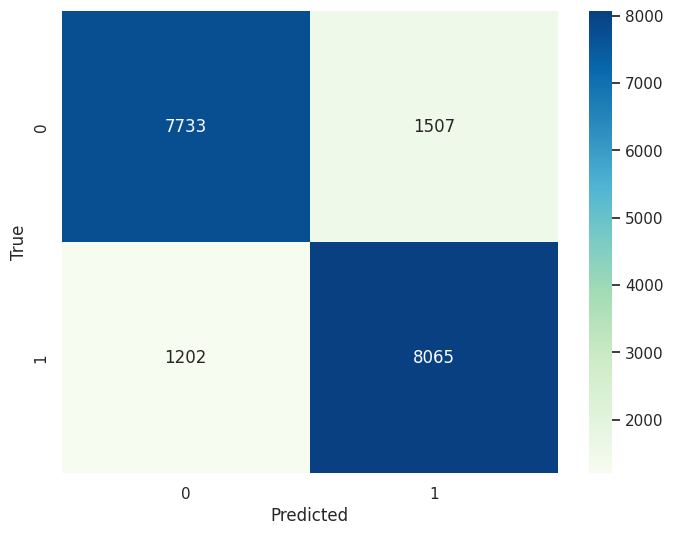

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.8536229534770627
Recall: 0.870292435523902
Precision: 0.8425616381111576
f1 score: 0.8562025585222146


### Graficamos el árbol

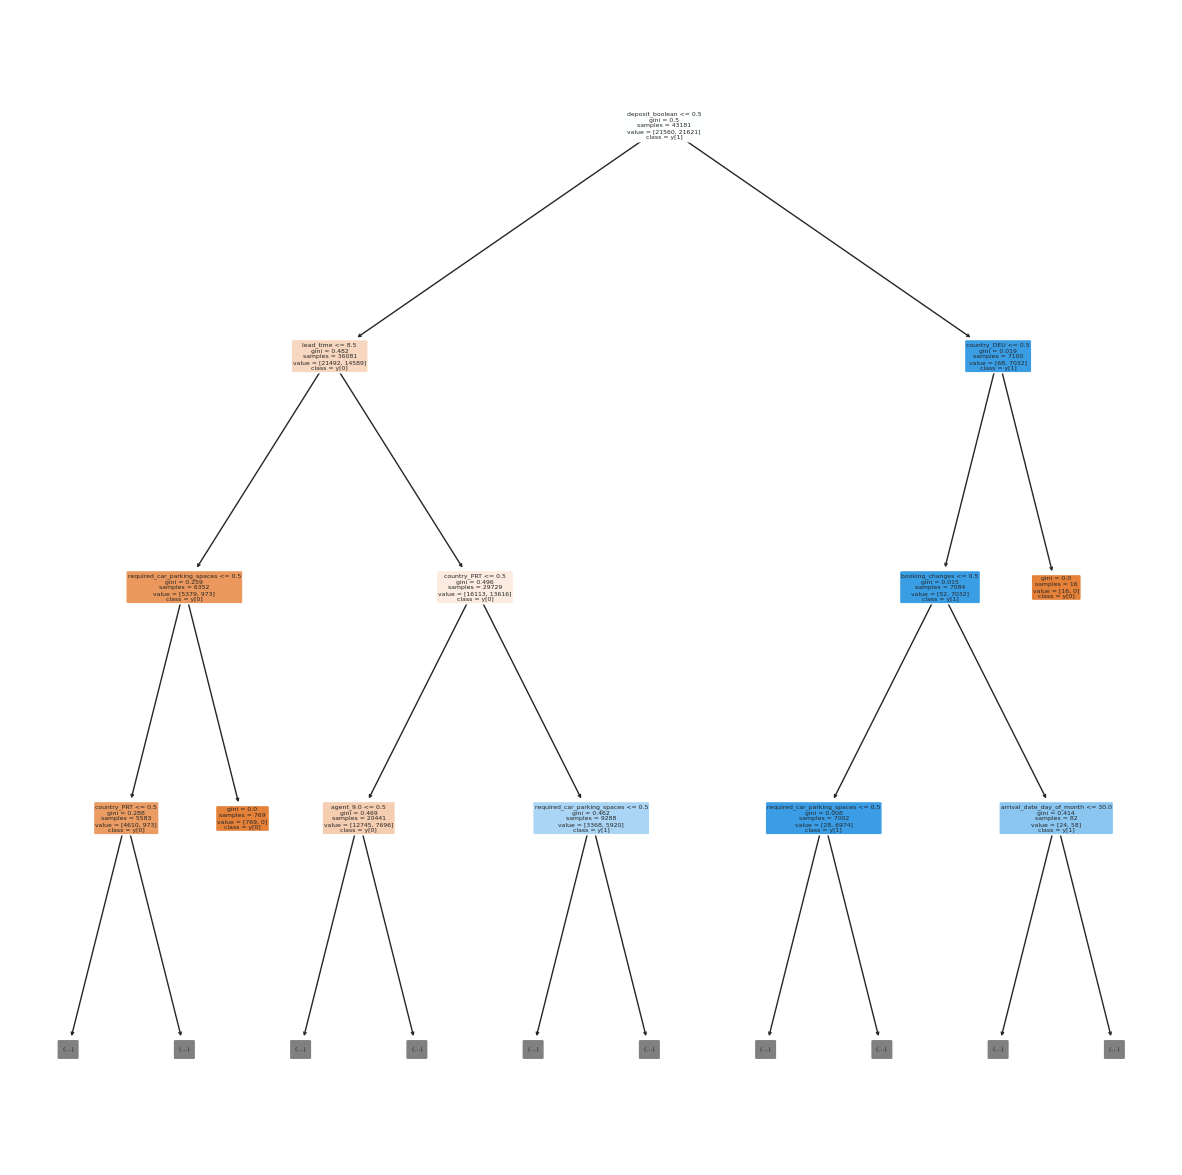

In [ ]:
plt.figure(figsize=(15,15))

tree_plot=tree.plot_tree(model,
                         max_depth=3,
                         feature_names=df_train_arboles_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

In [ ]:
#viz_cmodel = dtreeviz.model(model,
                          # tree_index=3,
                          # X_train=df_train_arboles_x,
                         #  y_train=df_train_arboles_y,
                         #  feature_names=df_train_arboles_x.columns.to_list(),
                        #   target_name='is_canceled',
                       #    class_names=['Not Canceled','Canceled'])


#display.set_matplotlib_formats('retina') # generate hires plots

#viz_cmodel.view(scale=1.2)

## Arboles con mejores hiperparametros

In [ ]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
import sklearn as sk

### Métrica F1

#### Grid Selection

Vamos a optimizar los hiperparámetros de nuestro arbol mediante k-fold Cross Validation. Como el conjunto de datos es relativamente grande, 5 folds serán suficientes para el entrenamiento. Probamos entre el criterio de gini o la entropy, con valores de ccp_alpha inferiores a 0.02 y a max_depth entre 6 y 20. 

In [ ]:

#Cantidad de combinaciones que quiero porbar
n= 10

#Conjunto de parámetros que quiero usar
params_grid = {#'criterion':['gini','entropy'],
               'criterion':['entropy', 'gini'],
               'ccp_alpha':np.linspace(0.0001,0.0002,n), 
               'max_depth':list(range(16,20))}
                
#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score)

#GridSearch CV
gridcv = GridSearchCV(estimator=base_tree ,param_grid=params_grid,scoring=scorer_fn,cv=kfoldcv,return_train_score='True') 

gridcv.fit(x_train,y_train)

#gridcv.cv_results_ 

#Mejores hiperparametros del arbol
print(gridcv.best_params_)
#Mejor métrica
print(gridcv.best_score_)

{'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_depth': 17}
0.8545986475981839


#### Random selection

Hacemos lo mismo con un random selection.

In [ ]:
#Cantidad de combinaciones que quiero porbar
n=50

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               'ccp_alpha':np.linspace(0,0.001,n), 
               'max_depth':list(range(8,30))
               }
                
#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n) 

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train);
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'max_depth': 29, 'criterion': 'entropy', 'ccp_alpha': 0.00022448979591836734}
0.853400835330014


### Resultados con F1

Selección entre grid y random

In [ ]:
searchcv = gridcv
#searchcv = randomcv

#####Mejores hiperparámetros

Aca podemos ver los hiperparametros que son elegidos y su score F1 por la grid selection.

In [ ]:
#Mejores hiperparametros del arbol
print(searchcv.best_params_)
#Mejor métrica
print(searchcv.best_score_)

{'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_depth': 17}
0.8545986475981839


#####Atributos elegidos y decisiones evaluadas

In [ ]:
#Atributos considerados y su importancia
best_tree = searchcv.best_estimator_
feat_imps = best_tree.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps,df_train_arboles_x.columns.to_list())):
    print('{}: {}'.format(feat,feat_imp))


adults: 0.0
agent_1.0: 0.0
agent_14.0: 0.0
agent_241.0: 0.0
agent_250.0: 0.0
agent_28.0: 0.0
agent_37.0: 0.0
agent_6.0: 0.0
agent_8.0: 0.0
agent_89.0: 0.0
assigned_room_type_C: 0.0
assigned_room_type_K: 0.0
babies: 0.0
children: 0.0
country_CHE: 0.0
country_USA: 0.0
customer_type_Group: 0.0
distribution_channel_Corporate: 0.0
market_segment_Complementary: 0.0
market_segment_Corporate: 0.0
meal_FB: 0.0
meal_HB: 0.0
meal_Undefined: 0.0
reserved_room_type_B: 0.0
reserved_room_type_C: 0.0
reserved_room_type_E: 0.0
reserved_room_type_F: 0.0
reserved_room_type_G: 0.0
hotel_Resort Hotel: 0.0002700254613789295
country_ESP: 0.00032801399394398267
assigned_room_type_B: 0.00033964584842213665
distribution_channel_GDS: 0.0003867167884917806
country_IRL: 0.00041424833910068203
country_BEL: 0.0004302260531912893
country_NLD: 0.0004523554007034262
assigned_room_type_G: 0.00047318004813663
market_segment_Aviation: 0.0005269788205700711
country_GBR: 0.0005636682705007037
agent_7.0: 0.000565949022050754

Veamos las primeras reglas obtenidas

In [ ]:
reglas = export_text(best_tree, feature_names=list(df_train_arboles_x))
print(reglas)

|--- deposit_boolean <= 0.50
|   |--- lead_time <= 8.50
|   |   |--- required_car_parking_spaces <= 0.50
|   |   |   |--- country_PRT <= 0.50
|   |   |   |   |--- agent_9.0 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- agent_9.0 >  0.50
|   |   |   |   |   |--- total_of_special_requests <= 0.50
|   |   |   |   |   |   |--- lead_time <= 2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- lead_time >  2.50
|   |   |   |   |   |   |   |--- customer_type_Transient-Party <= 0.50
|   |   |   |   |   |   |   |   |--- arrival_date_week_number <= 32.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- arrival_date_week_number >  32.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- customer_type_Transient-Party >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- total_of_special_requests >  0.50
|   |   |   |   |   |   |--- stays_in_weekend_nights <= 3.50
|

Acá logramos observar que los 4 atributos de mayor importancia son deposit_type_Non Refund, lead_time, market_segment_Online TA, country_numero

Donde se pregunta las siguientes reglas:
- Si el depósito de la reserva fue del tipo NonRefund o no
- Si el market_segment_online es TA o no
- Si el Lead time es menor o igual a 11.5
- Si el country_numero es menor igual a 4.5

#####Creación del Árbol con los mejores hiperparámetros

In [ ]:
arbol=DecisionTreeClassifier().set_params(**searchcv.best_params_)
#arbol=DecisionTreeClassifier(max_depth=16, criterion='entropy', ccp_alpha=0.0)
#Entreno el arbol en todo el set
arbol.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, max_depth=17)

#####Persistencia del modelo generado

In [ ]:
#import joblib
#joblib.dump(arbol, 'modelo_entrenado.joblib')

#####Visualizacion y métricas

F1-Score: 0.8563982555047335


Text(91.25, 0.5, 'True')

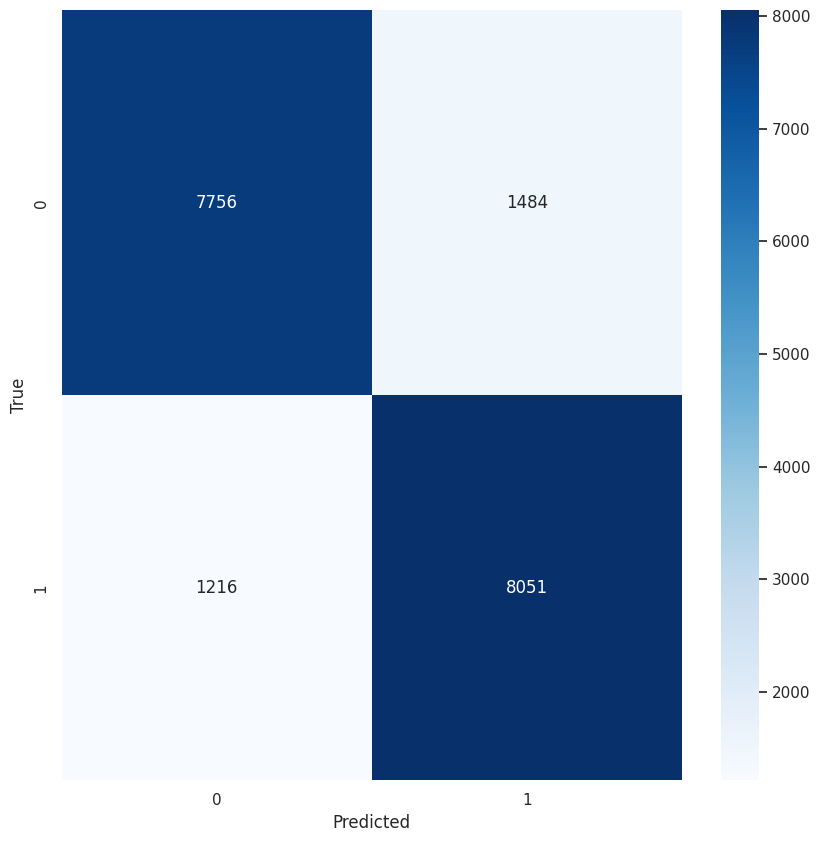

In [ ]:
#Hago predicción sobre el set de evaluacion
y_pred= arbol.predict(x_test)

#Arbol Reporte y Matriz de Confusion
#print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1
plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')

plt.xlabel('Predicted')
plt.ylabel('True')

Grafiquemos nuestro mejor arbol

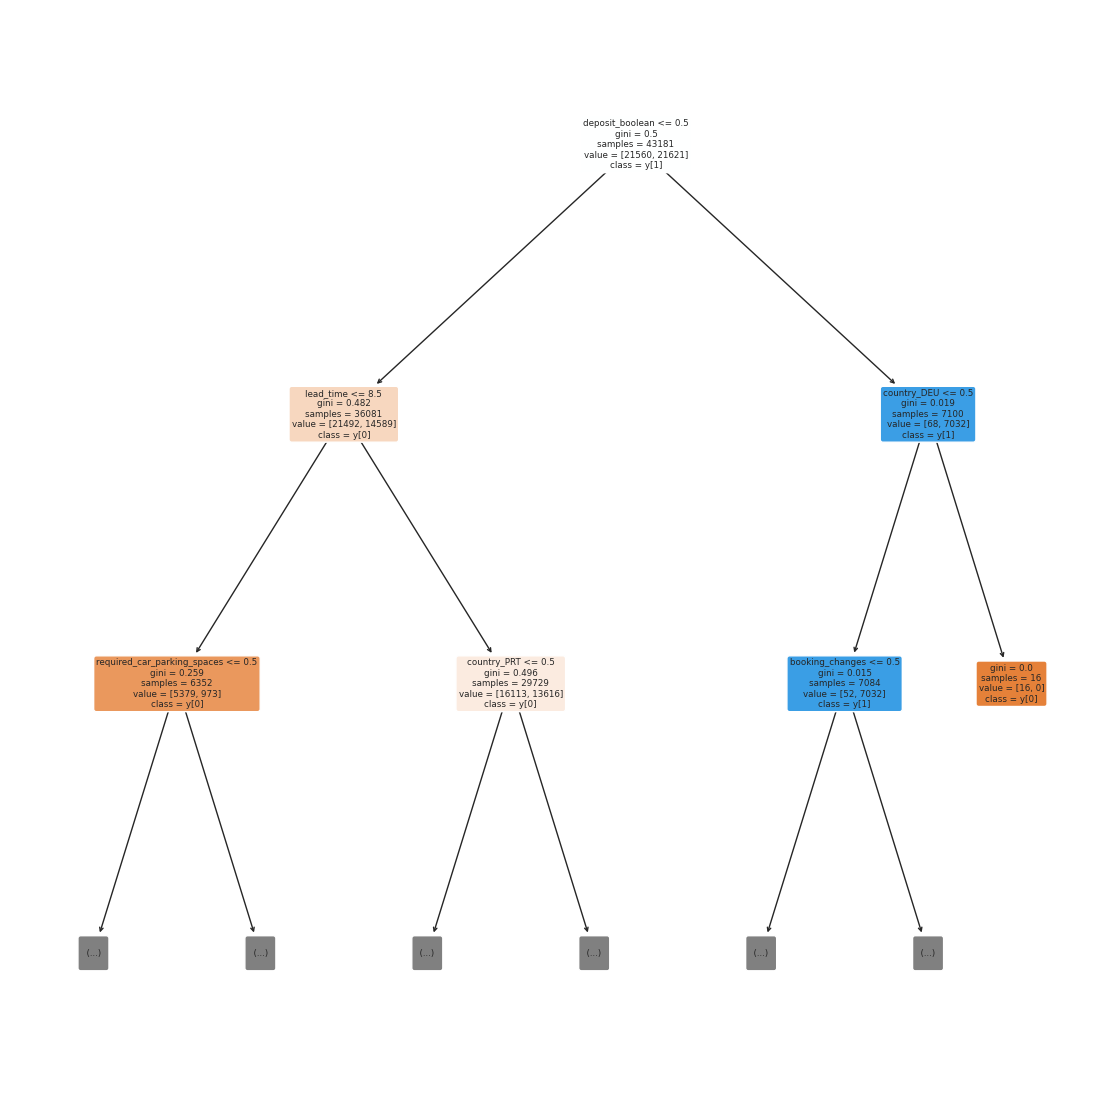

In [ ]:
plt.figure(figsize=(14,14))

tree_plot=tree.plot_tree(arbol,
                         max_depth=2,
                         feature_names=df_train_arboles_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

## Predicción para Kaggle

Vamos a utilizar los siguientes hiperparametros :

In [ ]:
df_test_arboles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26535 entries, 0 to 26534
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       26535 non-null  int64  
 1   arrival_date_year               26535 non-null  int64  
 2   arrival_date_week_number        26535 non-null  int64  
 3   arrival_date_day_of_month       26535 non-null  int64  
 4   stays_in_weekend_nights         26535 non-null  int64  
 5   stays_in_week_nights            26535 non-null  int64  
 6   adults                          26535 non-null  int64  
 7   children                        26535 non-null  float64
 8   babies                          26535 non-null  int64  
 9   is_repeated_guest               26535 non-null  int64  
 10  previous_cancellations          26535 non-null  int64  
 11  previous_bookings_not_canceled  26535 non-null  int64  
 12  booking_changes                 

In [ ]:
#Creo un dataset con los features que voy a usar para clasificar
df_train_arboles_x = df_train_arboles.drop(['is_canceled'], axis='columns', inplace=False)

#Creo un dataset con la variable target
df_train_arboles_y = df_train_arboles['is_canceled'].copy()

x_submission = df_test_arboles.drop(['id'], axis='columns', inplace=False)

In [ ]:
print(searchcv.best_params_)

{'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_depth': 17}


In [ ]:
tree_model = tree.DecisionTreeClassifier(**searchcv.best_params_)

#Entreno el modelo
model = tree_model.fit(X = df_train_arboles_x, y = df_train_arboles_y) 

In [ ]:
y_submission= model.predict(x_submission)

In [ ]:
df_submission = pd.DataFrame({"id":df_test_arboles['id'], "is_canceled" : y_submission})
print(df_submission.shape)
df_submission.head()

(26535, 2)


id  is_canceled
0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1  aba9aac2-4495-4645-a60e-90328713c999            1
2  b345b5dc-c804-4d77-a39f-1f4e65d1f1ad            0
3  ce1b400e-afa1-4946-bdff-004b859eb61c            1
4  c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214            1

In [ ]:
df_submission.to_csv("submission_8.csv",index=False)

In [ ]:
df_train_arboles.to_csv("dataset_train_arboles.csv", index=False)
df_test_arboles.to_csv("dataset_test_arboles.csv", index=False)

#Clusters

###Librerias necesarias

In [359]:
# Preprocessing
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Split
from sklearn.model_selection import train_test_split

# CV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# PCA
from sklearn.decomposition import PCA

# KNN
from sklearn.neighbors import KNeighborsClassifier

# SVM
from sklearn.svm import SVC

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# XGBoos
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# Stacking
from sklearn.ensemble import StackingClassifier

# Voting
from sklearn.ensemble import VotingClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from collections import defaultdict

import plotly.graph_objects as go
%matplotlib inline

# Metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, classification_report

##Preprocesamiento para los clusters

Creamos los dataframes para los clusters

In [360]:
df_test_clusters = df_hotels_test_copy.copy()

df_train_clusters = df_hotels_train_copy.copy()

####Usando OneHotEncoding para country

Tener en cuenta que categoría de pais se dropea, ya que si se dropea country_PTR por ejemplo, no permitiría al árbol hacer la pregunta si la reserva es de portugal o no.

In [361]:
# select columns to be one-hot encoded
columns_to_encode = ['country']

# create instance of OneHotEncoder
encoder = OneHotEncoder(categories=[
    ['AUT', 'PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BRA', 'BEL', 'USA', 'NLD', 'CHE', ],
   ], drop='first', sparse=False, handle_unknown='ignore')


Train

In [362]:
# store names of columns and index
column_names = df_train_clusters.columns
index = df_train_clusters.index

# fit and transform selected columns
one_hot_encoded_columns = encoder.fit_transform(df_train_clusters[columns_to_encode])

# create dataframe from encoded columns
one_hot_encoded_df = pd.DataFrame(data=one_hot_encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode), index=index)
# concatenate with original dataframe
df_restored = pd.concat([df_train_clusters[column_names], one_hot_encoded_df], axis=1)

# print the result
df_train_clusters = df_restored

Test

In [363]:
# store names of columns and index
column_names = df_test_clusters.columns
index = df_test_clusters.index

# fit and transform selected columns
one_hot_encoded_columns = encoder.transform(df_test_clusters[columns_to_encode])

# create dataframe from encoded columns
one_hot_encoded_df = pd.DataFrame(data=one_hot_encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode), index=index)
# concatenate with original dataframe
df_restored = pd.concat([df_test_clusters[column_names], one_hot_encoded_df], axis=1)

# print the result
df_test_clusters = df_restored

###One hot encoding other categories

Lo realizamos debido a que los modelos necesitan valores numericos

In [364]:
# select columns to be one-hot encoded
columns_to_one_hot_encode = ['hotel','customer_type','meal','distribution_channel','market_segment']

# create instance of OneHotEncoder
encoder = OneHotEncoder(categories=[
    df_train_clusters['hotel'].unique(), #hotel
    df_train_clusters['customer_type'].unique(), #customer_type
     [c for c in df_train_clusters['meal'].unique()], #meal
    [c for c in df_train_clusters['distribution_channel'].unique()], #distribution_channel
    [c for c in df_train_clusters['market_segment'].unique()] #market_segment
    ], drop='first', sparse=False, handle_unknown='ignore')

Train

In [365]:
# store names of columns and index
column_names = df_train_clusters.columns
index = df_train_clusters.index

# fit and transform selected columns
one_hot_encoded_columns = encoder.fit_transform(df_train_clusters[columns_to_one_hot_encode])

# create dataframe from encoded columns
one_hot_encoded_df = pd.DataFrame(data=one_hot_encoded_columns, columns=encoder.get_feature_names_out(columns_to_one_hot_encode), index=index)
# concatenate with original dataframe
df_restored = pd.concat([df_train_clusters[column_names], one_hot_encoded_df], axis=1)

# print the result
df_train_clusters = df_restored

Test

In [366]:
# store names of columns and index
column_names = df_test_clusters.columns
index = df_test_clusters.index

# fit and transform selected columns
one_hot_encoded_columns = encoder.transform(df_test_clusters[columns_to_one_hot_encode])

# create dataframe from encoded columns
one_hot_encoded_df = pd.DataFrame(data=one_hot_encoded_columns, columns=encoder.get_feature_names_out(columns_to_one_hot_encode), index=index)
# concatenate with original dataframe
df_restored = pd.concat([df_test_clusters[column_names], one_hot_encoded_df], axis=1)

# print the result
df_test_clusters = df_restored

###Room type ordinalEncoding

Utilizamos OrdinalEncoding para reserved_room_type y assigned_room_type, en vez de OneHotEncoding para reducir la cantidad de columnas y por ende el tiempo de entrenamiento para los clusters.

In [367]:
room_type_dict = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17,'R':18,'S':19,'T':20,'U':21,'V':22,'W':23,'X':24,'Y':25,'Z':26}
df_train_clusters['reserved_room_type'] = df_train_clusters['reserved_room_type'].map(room_type_dict,na_action=None)
df_train_clusters['assigned_room_type'] = df_train_clusters['assigned_room_type'].map(room_type_dict,na_action=None)

df_test_clusters['reserved_room_type'] = df_test_clusters['reserved_room_type'].map(room_type_dict,na_action=None)
df_test_clusters['assigned_room_type'] = df_test_clusters['assigned_room_type'].map(room_type_dict,na_action=None)

###Selección de atributos

Eliminamos algunas columnas luego de haber trabajado durante mucho tiempo ya que sino los procesos se hacian intermiables (varias horas)

In [368]:
columnas_eliminar_test = ['country','company','is_portuguese','special_request_boolean','special_request_and_changes_made','booking_changes_boolean','company_boolean','deposit_type','reservation_status_date','arrival_date_month', 'babies']
columnas_eliminar_test += columns_to_one_hot_encode 

columnas_eliminar_train = columnas_eliminar_test + ['id']

df_train_clusters.drop(columnas_eliminar_train, axis='columns', inplace=True)  #Elimina columna sobre el mismo dataframe
df_test_clusters.drop(columnas_eliminar_test, axis='columns', inplace=True)  #Elimina columna sobre el mismo dataframe

###Split de la data

In [369]:
#Creo un dataset con los features que voy a usar para clasificar
df_train_clusters_x = df_train_clusters.drop(['is_canceled'], axis='columns', inplace=False)

#Creo un dataset con la variable target
df_train_clusters_y = df_train_clusters['is_canceled'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(df_train_clusters_x, 
                                                    df_train_clusters_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2, #semilla
                                                    stratify=df_train_clusters_y)

###Normalización estandar

In [370]:
stand_scaler = StandardScaler()
x_train = stand_scaler.fit_transform(x_train)
x_test = stand_scaler.transform(x_test)
df_train_clusters_x = stand_scaler.transform(df_train_clusters_x)

Veamos que aspecto tiene nuestro df post procesamiento antes de entrenar los modelos

In [371]:
df_train_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61688 entries, 0 to 61687
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       61688 non-null  int64  
 1   arrival_date_year               61688 non-null  int64  
 2   arrival_date_week_number        61688 non-null  int64  
 3   arrival_date_day_of_month       61688 non-null  int64  
 4   stays_in_weekend_nights         61688 non-null  int64  
 5   stays_in_week_nights            61688 non-null  int64  
 6   adults                          61688 non-null  int64  
 7   children                        61688 non-null  float64
 8   is_repeated_guest               61688 non-null  int64  
 9   previous_cancellations          61688 non-null  int64  
 10  previous_bookings_not_canceled  61688 non-null  int64  
 11  reserved_room_type              61688 non-null  int64  
 12  assigned_room_type              

##KNN

Los outliers han sido tratados en la seccion dedicada a eso. Esto es importante ya que knn es sensible frente a estos.

### Random Search para mejor hiper parametros de KNN

In [329]:
#Cantidad de combinaciones que quiero porbar
n=6

#Grilla de Parámetros
params_grid={ 'n_neighbors':range(5,10), 
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }
                
#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
knn = KNeighborsClassifier()

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score)

#GridSearch CV
#Random Search Cross Validation
randomcv = sk.model_selection.RandomizedSearchCV(estimator=knn,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n) 

randomcv.fit(x_train,y_train)

#gridcv.cv_results_ 

#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'weights': 'distance', 'n_neighbors': 8, 'metric': 'euclidean', 'algorithm': 'ball_tree'}
0.8257618054570732


###Mejor clasificador y métricas

In [330]:
#Mejor estimador
best_knn=randomcv.best_estimator_

#Predicción con mejor estimador
y_pred=randomcv.predict(x_test)

#F1
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

F1-Score: 0.8338679989481987


Text(91.25, 0.5, 'True')

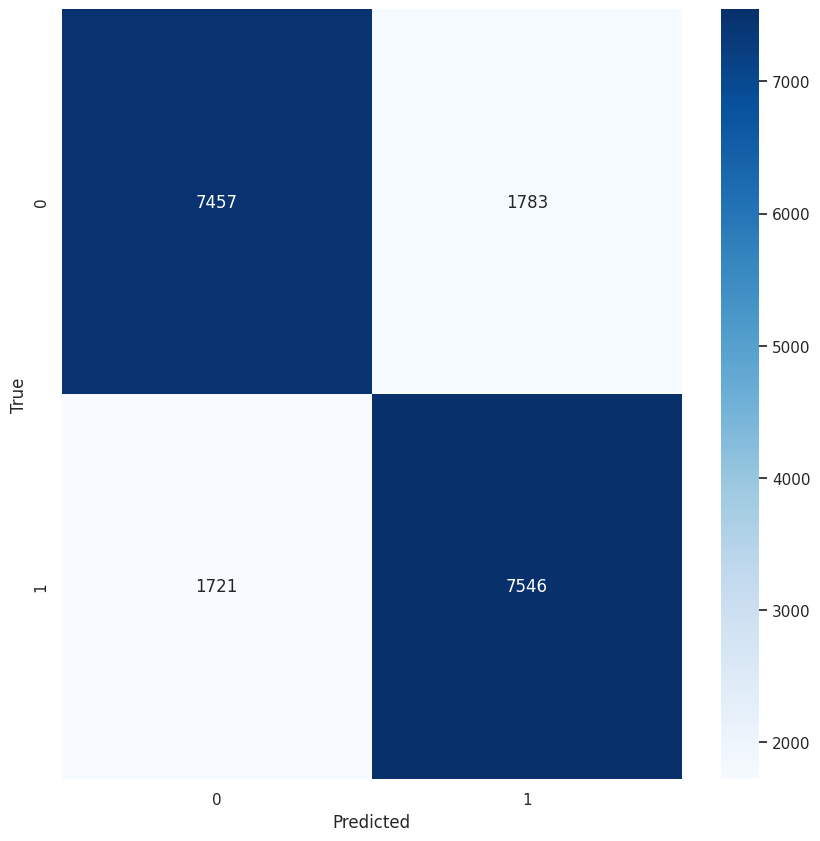

In [ ]:
plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')

plt.xlabel('Predicted')
plt.ylabel('True')

### Sumbit para Kaggle Prediccion

In [ ]:
x_submission = df_test_clusters.drop(['id'], axis='columns', inplace=False)

In [ ]:
#Creo un dataset con los features que voy a usar para clasificar
df_train_cluster_x = df_train_clusters.drop(['is_canceled'], axis='columns', inplace=False)

#Creo un dataset con la variable target
df_train_cluster_y = df_train_clusters['is_canceled'].copy()

KNN_model = KNeighborsClassifier(**randomcv.best_params_)

#Entreno el modelo
model = KNN_model.fit(X = df_train_cluster_x, y = df_train_cluster_y) 

In [ ]:
y_submission= model.predict(x_submission)

In [ ]:
df_submission = pd.DataFrame({"id":df_test_clusters['id'], "is_canceled" : y_submission})
print(df_submission.shape)
df_submission.head()

(26535, 2)


id  is_canceled
0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1  aba9aac2-4495-4645-a60e-90328713c999            1
2  b345b5dc-c804-4d77-a39f-1f4e65d1f1ad            0
3  ce1b400e-afa1-4946-bdff-004b859eb61c            1
4  c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214            1

In [ ]:
df_submission.to_csv("submission_KNN_V2.csv",index=False)

##SVM

###Preprocesamiento

Decidimos eliminar algunas columnas más ya que los modelos tardan varias horas y se hacía muy complicado trabajar así. 

In [351]:
columnas_eliminar_test = ['distribution_channel_GDS','distribution_channel_Corporate','distribution_channel_Direct','stays_in_weekend_nights','market_segment_Groups','market_segment_Offline TA/TO','market_segment_Direct','market_segment_Complementary','market_segment_Corporate','market_segment_Aviation','customer_type_Transient-Party','customer_type_Contract','customer_type_Group','meal_HB','meal_Undefined','meal_FB', 'agent']
paises_a_eliminar=['country_PRT', 'country_GBR', 'country_FRA', 'country_ESP', 'country_DEU' ,'country_IRL' ,'country_ITA' ,'country_BRA' ,'country_BEL' ,'country_USA' ,'country_NLD' ,'country_CHE']
columnas_eliminar_test += paises_a_eliminar
columnas_eliminar_train = columnas_eliminar_test

df_train_clusters.drop(columnas_eliminar_train, axis='columns', inplace=True)  #Elimina columna sobre el mismo dataframe
df_test_clusters.drop(columnas_eliminar_test, axis='columns', inplace=True)  #Elimina columna sobre el mismo dataframe
df_train_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61688 entries, 0 to 61687
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       61688 non-null  int64  
 1   arrival_date_year               61688 non-null  int64  
 2   arrival_date_week_number        61688 non-null  int64  
 3   arrival_date_day_of_month       61688 non-null  int64  
 4   stays_in_week_nights            61688 non-null  int64  
 5   adults                          61688 non-null  int64  
 6   children                        61688 non-null  float64
 7   is_repeated_guest               61688 non-null  int64  
 8   previous_cancellations          61688 non-null  int64  
 9   previous_bookings_not_canceled  61688 non-null  int64  
 10  reserved_room_type              61688 non-null  int64  
 11  assigned_room_type              61688 non-null  int64  
 12  booking_changes                 

In [352]:
df_train_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61688 entries, 0 to 61687
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       61688 non-null  int64  
 1   arrival_date_year               61688 non-null  int64  
 2   arrival_date_week_number        61688 non-null  int64  
 3   arrival_date_day_of_month       61688 non-null  int64  
 4   stays_in_week_nights            61688 non-null  int64  
 5   adults                          61688 non-null  int64  
 6   children                        61688 non-null  float64
 7   is_repeated_guest               61688 non-null  int64  
 8   previous_cancellations          61688 non-null  int64  
 9   previous_bookings_not_canceled  61688 non-null  int64  
 10  reserved_room_type              61688 non-null  int64  
 11  assigned_room_type              61688 non-null  int64  
 12  booking_changes                 

Realizamos el split nuevamente


In [353]:
#Creo un dataset con los features que voy a usar para clasificar
df_train_clusters_x = df_train_clusters.drop(['is_canceled'], axis='columns', inplace=False)

#Creo un dataset con la variable target
df_train_clusters_y = df_train_clusters['is_canceled'].copy()

#Genero los conjuntos de train y de test
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(df_train_clusters_x, 
                                                    df_train_clusters_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2, #semilla
                                                    stratify=df_train_clusters_y)

Normalizamos

In [354]:
stand_scaler = StandardScaler()
x_train_svm = stand_scaler.fit_transform(x_train_svm)
x_test_svm = stand_scaler.transform(x_test_svm)

###Kernel Lineal

In [355]:
#Creo un clasificador con kernel lineal y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='linear', C=5)
clf.fit(x_train_svm, y_train_svm)

#Hago la predicción y calculo las métricas
y_pred_lin=clf.predict(x_test_svm)


####Métricas

In [358]:
#test
print('F1-Score: {}'.format(f1_score(y_test_svm, y_pred_lin, average='binary'))) #binary considera la clase positiva por defecto 1

F1-Score: 0.7122136048783375


Text(91.25, 0.5, 'True')

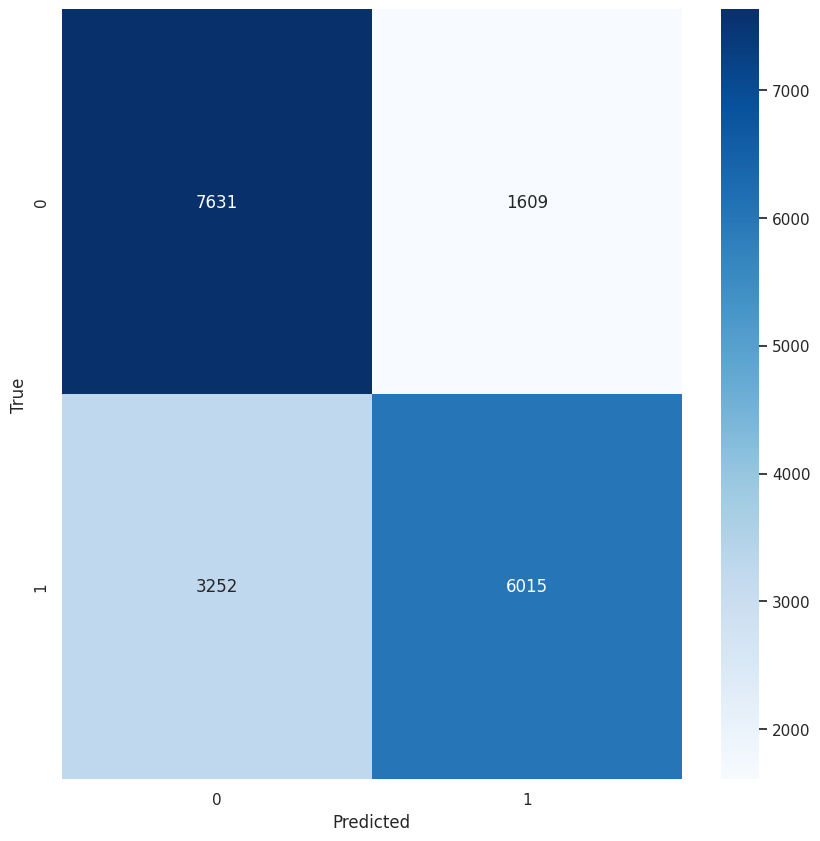

In [357]:
plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test_svm,y_pred_lin)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')

plt.xlabel('Predicted')
plt.ylabel('True')

###PCA para SVM

Text(0, 0.5, 'Varianza Explicada (%)')

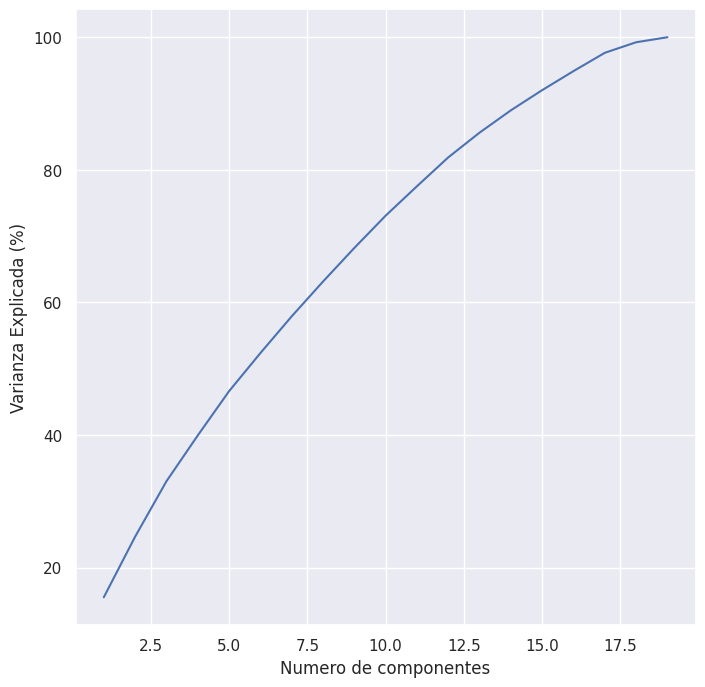

In [ ]:
# PCA sobre los datos escalados
pca = PCA(n_components = None)
pca.fit(x_train_svm)

#Cantidad de Componentes
componentes = len(pca.explained_variance_ratio_) 

plt.figure(figsize=(8, 8))
#Grafico la Varianza Explicada 
plt.plot(range(1,componentes+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Numero de componentes")
plt.ylabel("Varianza Explicada (%)")

Con 14 componentes abarcamos más de un 85% de la varianza, por lo que tomaremos esta cantidad

In [ ]:
pca = PCA(n_components = 14)
x_train_svm = pca.fit_transform(x_train_svm)
x_test_svm = pca.transform(x_test_svm)

###Kernel Polinómico

In [ ]:
#Creo un clasificador con kernel polinomico y lo entreno sobre los datos escalados
clf = SVC(kernel='poly', C=0.1, degree=10, gamma=5, coef0=10)
clf.fit(x_train_svm, y_train)

#Y si c=alto? bajar gamma o el degree
y_pred_pol=clf.predict(x_test_svm)

In [ ]:
#Creo un clasificador con kernel polinomico y lo entreno sobre los datos escalados
clf = SVC(kernel='poly', C=0.05, degree=3, gamma=1, coef0=10)
clf.fit(x_train_svm, y_train)

#Y si c=alto? bajar gamma o el degree
y_pred_pol=clf.predict(x_test_svm)

####Mejor clasificador y métricas

In [ ]:
#Mejor estimador
#best_knn=knn_gridcv.best_estimator_

#Predicción con mejor estimador
#y_pred=knn_gridcv.predict(x_test)

#Accuracy test
print('F1-Score: {}'.format(f1_score(y_test, y_pred_pol, average='binary'))) #binary considera la clase positiva por defecto 1

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')

plt.xlabel('Predicted')
plt.ylabel('True')

###Kernel Radial


También fundamental encontrar un buen C y un buen gamma

In [ ]:
#Creo un clasificador con kernel polinomico y lo entreno sobre los datos escalados
clf = SVC(kernel='poly', C=5, degree=10, gamma=10, coef0=10)
clf.fit(x_train, y_train)

y_pred_rad=clf.predict(x_test)

####Mejor clasificador y métricas

In [ ]:
#Mejor estimador
#best_knn=knn_gridcv.best_estimator_

#Predicción con mejor estimador
#y_pred=knn_gridcv.predict(x_test)

#Accuracy test
print('F1-Score: {}'.format(f1_score(y_test, y_pred_rad, average='binary'))) #binary considera la clase positiva por defecto 1

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')

plt.xlabel('Predicted')
plt.ylabel('True')

##Random Forest

###GridSearch para la búsqueda de hiperparámetros

In [372]:
rf_classifier = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
               "min_samples_split" : [8, 9, 10, 11, 12], 
               "n_estimators": list(range(55,60)) }
                               
#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

scorer_fn = make_scorer(metrics.f1_score)

#Probamos entrenando sólo con 1 métrica
RF_gridsearch = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring=scorer_fn, cv=kfoldcv, n_jobs=-1)
gs_fit = RF_gridsearch.fit(X = x_train, y = y_train)

### Mejor clasificador y métricas

In [373]:
#Mejor estimador
best_rf=RF_gridsearch.best_estimator_

#Predicción con mejor estimador
y_pred=best_rf.predict(x_test)

#Accuracy test
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

F1-Score: 0.8795475556038936


In [ ]:
RF_gridsearch.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

Text(91.25, 0.5, 'True')

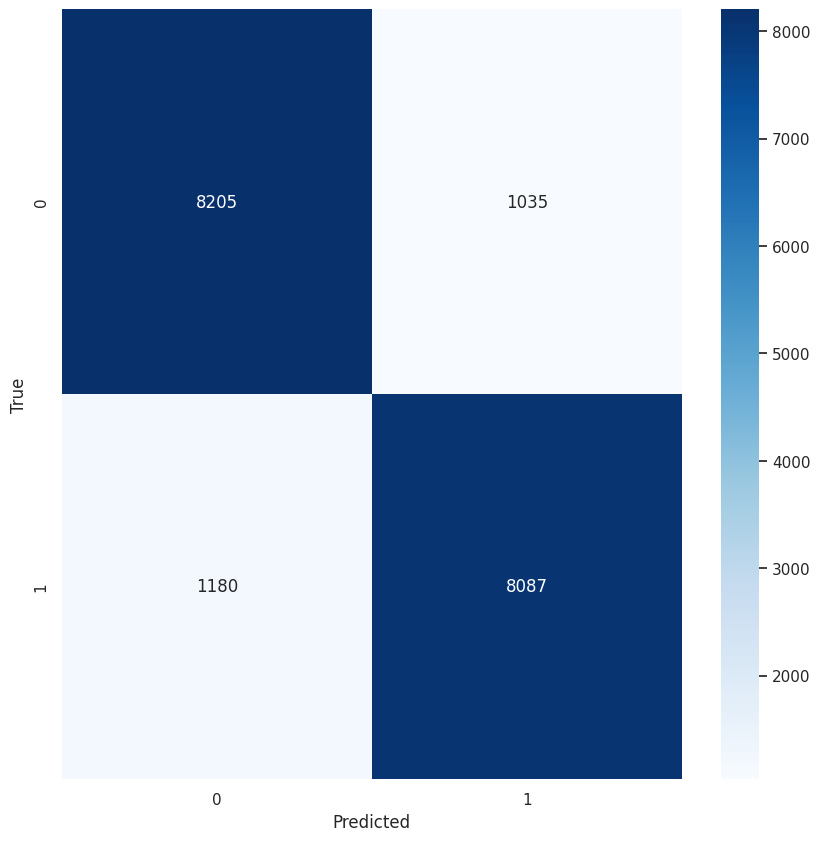

In [374]:
plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')

plt.xlabel('Predicted')
plt.ylabel('True')

### Sumbit para Kaggle Prediccion

In [ ]:
x_submission = df_test_clusters.drop(['id'], axis='columns', inplace=False)

In [ ]:
#Creo un dataset con los features que voy a usar para clasificar
df_train_cluster_x = df_train_clusters.drop(['is_canceled'], axis='columns', inplace=False)

#Creo un dataset con la variable target
df_train_cluster_y = df_train_clusters['is_canceled'].copy()

RF_model = RandomForestClassifier(**RF_gridsearch.best_params_)

#Entreno el modelo
model = RF_model.fit(X = df_train_cluster_x, y = df_train_cluster_y) 

In [ ]:
y_submission= model.predict(x_submission)

In [ ]:
df_submission = pd.DataFrame({"id":df_test_clusters['id'], "is_canceled" : y_submission})
print(df_submission.shape)
df_submission.head()

In [ ]:
df_submission.to_csv("submission_RF.csv",index=False)

##XGBoosting

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=0, n_estimators=100)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

AUC: 0.9504894654821817
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      9240
           1       0.87      0.88      0.87      9267

    accuracy                           0.87     18507
   macro avg       0.87      0.87      0.87     18507
weighted avg       0.87      0.87      0.87     18507



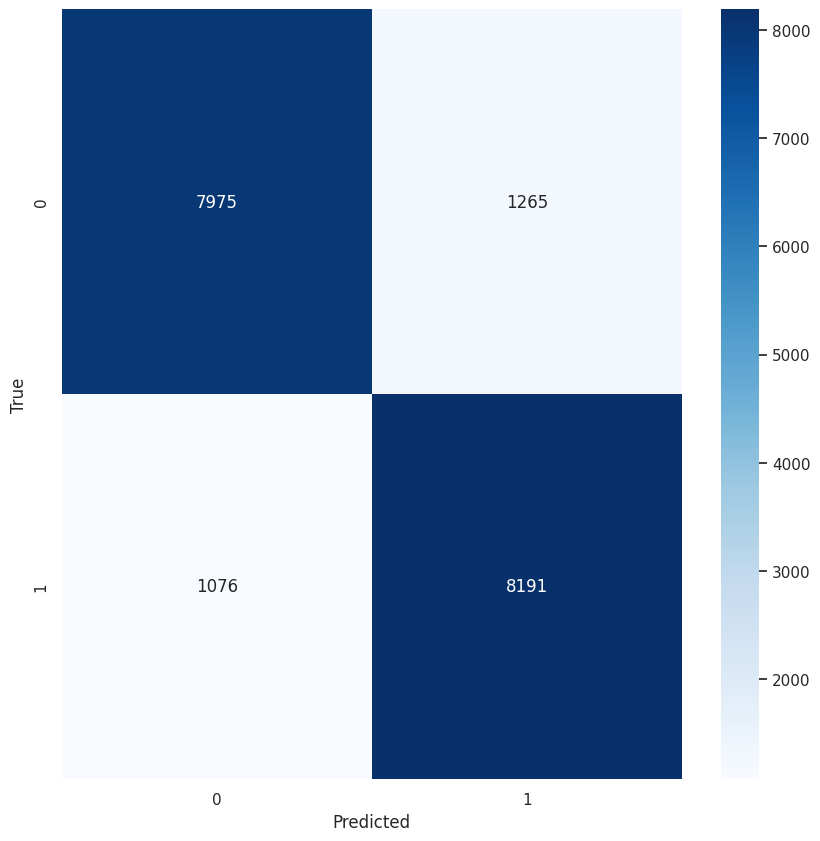

In [ ]:
#Evaluo en el set de test
y_pred_proba= xgb_model.predict_proba(x_test)[:, 1]
print('AUC:',roc_auc_score(y_test, y_pred_proba))

#Matriz de Confusion
plt.subplots(figsize=(10, 10))
y_pred=xgb_model.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred))

Con el método CV puedo entrenar el modelo y ver como impacta la modificacion de algun parámetro.

In [ ]:
# Convert the training data to DMatrix format
data_dmatrix = xgb.DMatrix(data=x_train, label=y_train)

# Define the parameters of the XGBoost classifier and the range of values to search
params = {'learning_rate': [0.01, 0.1, 0.2],
          'max_depth': [16],
          'min_child_weight': [1, 3, 5],
          'gamma': [0, 0.1, 1],
          'subsample': [0.5, 1],
          'colsample_bytree': [0.5, 0.7, 1],
          'n_estimators': [90, 100]}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=0)

# Perform a grid search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=params, cv=5, scoring='f1', n_iter=10)
#Busco los hiperparamtros que optimizan F1 Score
random_search.fit(x_train,y_train)

# Print the best hyperparameters and their corresponding F1 score
print(random_search.best_params_)
print(random_search.best_score_)



###Mejor clasificador y métricas

In [ ]:
#Mejor estimador
xgb_model_best=random_search.best_estimator_

#Predicción con mejor estimador
y_pred=xgb_model_best.predict(x_test)

#xgb_model_best = xgb.XGBClassifier(grid_search.best_params_)
#y_pred=xgb_model_best.predict(x_test)

#test
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

F1-Score: 0.8802665520206362


Text(91.25, 0.5, 'True')

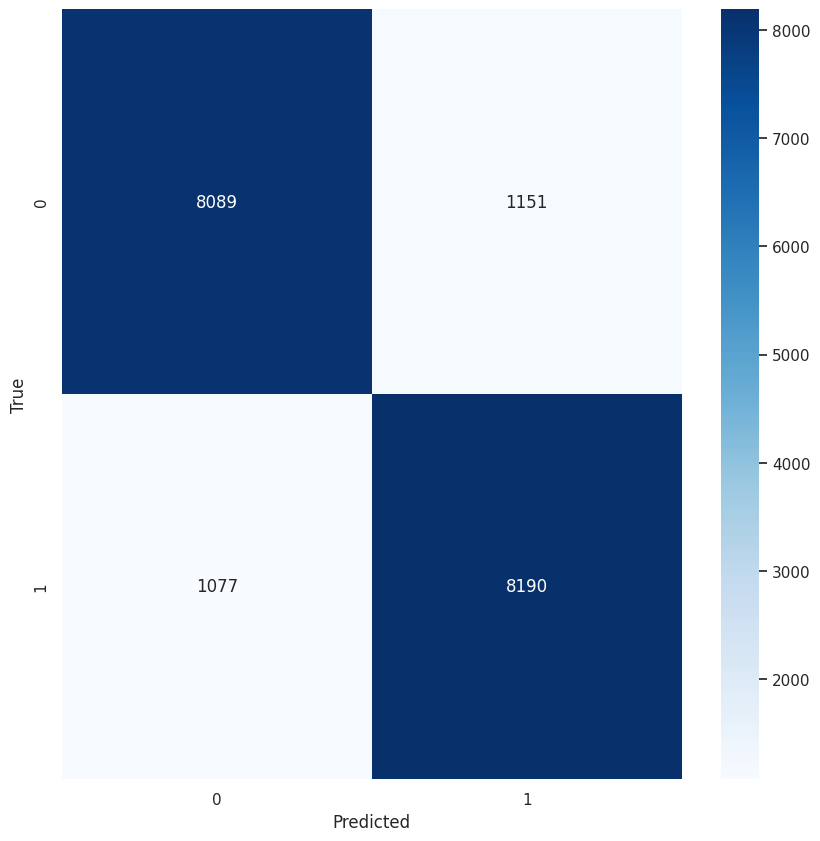

In [ ]:
plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')

plt.xlabel('Predicted')
plt.ylabel('True')

### Sumbit para Kaggle Prediccion

In [ ]:
x_submission = df_test_clusters.drop(['id'], axis='columns', inplace=False)

In [ ]:
#Creo un dataset con los features que voy a usar para clasificar
df_train_cluster_x = df_train_clusters.drop(['is_canceled'], axis='columns', inplace=False)

#Creo un dataset con la variable target
df_train_cluster_y = df_train_clusters['is_canceled'].copy()

XGDBoost_model = xgb.XGBClassifier(**random_search.best_params_)

#Entreno el modelo
model = XGDBoost_model.fit(X = df_train_cluster_x, y = df_train_cluster_y) 

In [ ]:
y_submission= model.predict(x_submission)

In [ ]:
df_submission = pd.DataFrame({"id":df_test_clusters['id'], "is_canceled" : y_submission})
print(df_submission.shape)
df_submission.head()

(26535, 2)


id  is_canceled
0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1  aba9aac2-4495-4645-a60e-90328713c999            1
2  b345b5dc-c804-4d77-a39f-1f4e65d1f1ad            0
3  ce1b400e-afa1-4946-bdff-004b859eb61c            1
4  c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214            1

In [ ]:
df_submission.to_csv("submission_XGDB.csv",index=False)

#####Persistencia del modelo generado

In [383]:
import joblib
joblib.dump(model, 'modelo_xgb.joblib')

NameError: ignored

Persistecia del dataframe prepocesado

In [ ]:
x_train.to_csv("dataset_train_clusters.csv", index=False)
x_test.to_csv("dataset_test_clusters.csv", index=False)

##Stacking

Librerias

In [308]:
from sklearn.linear_model import LogisticRegressionCV

In [309]:
#Funcion para evaluar los modelos 5fold -CV (repite 2 veces)
def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
    scores = cross_val_score(model, x, y, scoring='f1', cv=cv, verbose=1, n_jobs=3, error_score='raise')
    return scores

In [310]:
#Funcion para plotear a performance
def plot_results(model_scores, name):
    
    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            y=result,
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )
    
    fig.update_layout(
    title='Performance of Different Models Using 5-Fold Cross-Validation',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    xaxis_title='Model',
    yaxis_title='F1',
    showlegend=False)
    fig.show()

Elección de modelos

In [ ]:
#Modelos Base
base_models = {'random_forest':RandomForestClassifier(n_estimators=50),
               'svm': SVC(),
               'knn': KNeighborsClassifier(n_neighbors=11)}

#Guarda los scores de cada modelo
model_scores = defaultdict()

#Entreno los clasificadores
for name, model in base_models.items():
    print('Evaluating {}'.format(name))
    scores = evaluate_model(model, x_train, y_train)
    model_scores[name] = scores

Evaluating random_forest


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:  1.7min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Evaluating svm


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed: 11.0min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Evaluating knn


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   24.7s finished


In [311]:
#Meta Modelo
meta_model = LogisticRegressionCV()

#Modelos Base
base_models = [('random_forest', RandomForestClassifier(n_estimators=50)),
               ('svm', SVC()),
               ('knn', KNeighborsClassifier(n_neighbors=11))]

#Ensemble Stacking
stacking_model = StackingClassifier(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)

In [312]:
#Performance el modelo en entrenamiento
stacking_scores = evaluate_model(stacking_model, x_train, y_train)
model_scores['stacking'] = stacking_scores

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
#Grafico performance
plot_results(model_scores, name='stacking_model_cv')

In [313]:
#Evaluo en conjunto de test
#stacking_model.fit(x_train,y_train).score(x_test,y_test)
stacking_model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.5s finished


StackingClassifier(cv=5,
                   estimators=[('random_forest',
                                RandomForestClassifier(n_estimators=50)),
                               ('svm', SVC()),
                               ('knn', KNeighborsClassifier(n_neighbors=11))],
                   final_estimator=LogisticRegressionCV(), passthrough=True,
                   verbose=2)

### Mejor clasificador y métricas

In [314]:
#Predicción con mejor estimador
y_pred=stacking_model.predict(x_test)

#Accuracy test
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

F1-Score: 0.8796311364252781


Text(91.25, 0.5, 'True')

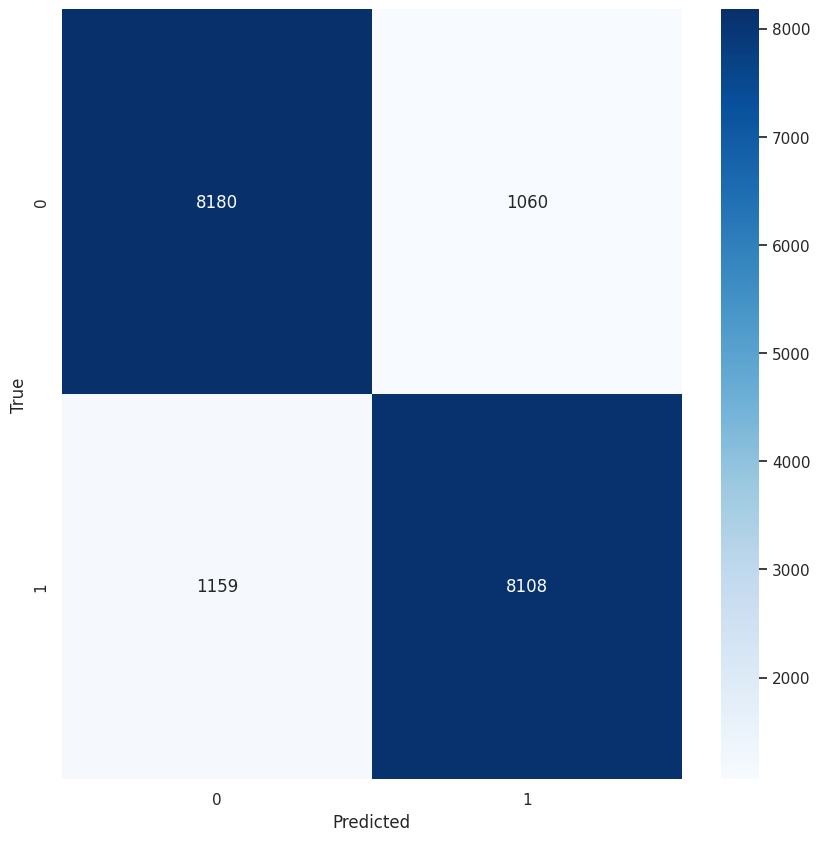

In [315]:
plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')

plt.xlabel('Predicted')
plt.ylabel('True')

### Sumbit para Kaggle Prediccion

In [375]:
x_submission = df_test_clusters.drop(['id'], axis='columns', inplace=False)

In [376]:
#Creo un dataset con los features que voy a usar para clasificar
df_train_cluster_x = df_train_clusters.drop(['is_canceled'], axis='columns', inplace=False)

#Creo un dataset con la variable target
df_train_cluster_y = df_train_clusters['is_canceled'].copy()


In [378]:
#Ensemble Stacking
stacking_model = StackingClassifier(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)
y_submission= stacking_model.fit(df_train_cluster_x, df_train_cluster_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 26.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   30.0s finished


In [379]:
submission= y_submission.predict(x_submission)

In [380]:
df_submission = pd.DataFrame({"id":df_test_clusters['id'], "is_canceled" : submission})
print(df_submission.shape)
df_submission.head()

(26535, 2)


id  is_canceled
0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1  aba9aac2-4495-4645-a60e-90328713c999            1
2  b345b5dc-c804-4d77-a39f-1f4e65d1f1ad            0
3  ce1b400e-afa1-4946-bdff-004b859eb61c            1
4  c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214            1

In [381]:
df_submission.to_csv("submission_Stackig.csv",index=False)

##Voting

In [305]:
#Creo clasificadores

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()

#Creo ensemble de Votación
vot_clf = VotingClassifier(estimators = [('lr', log_clf), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'hard')

#Armo conjunto entrenamiento y test 80-20
#x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.80)


#Entreno el ensemble
vot_clf.fit(x_train, y_train)

#Evaluo en conjunto de test
pred = vot_clf.predict(x_test)

### métricas

In [306]:
print('F1-Score: {}'.format(f1_score(y_test, pred, average='binary'))) #binary considera la clase positiva por defecto 1
pred

F1-Score: 0.8568961795812647


array([0, 0, 1, ..., 1, 1, 0])

Text(91.25, 0.5, 'True')

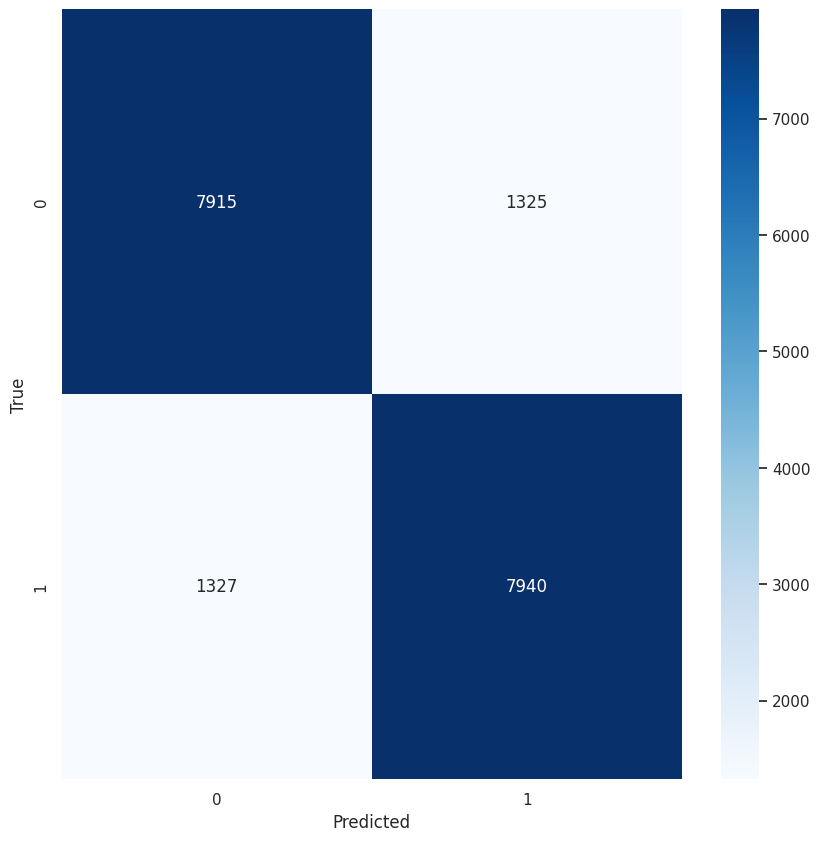

In [307]:
plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')

plt.xlabel('Predicted')
plt.ylabel('True')

### Sumbit para Kaggle Prediccion

In [ ]:
x_submission = df_test_clusters.drop(['id'], axis='columns', inplace=False)

In [ ]:
#Creo un dataset con los features que voy a usar para clasificar
df_train_cluster_x = df_train_clusters.drop(['is_canceled'], axis='columns', inplace=False)

#Creo un dataset con la variable target
df_train_cluster_y = df_train_clusters['is_canceled'].copy()


In [ ]:
y_submission= pred

In [ ]:
df_submission = pd.DataFrame({"id":df_test_clusters['id'], "is_canceled" : y_submission})
print(df_submission.shape)
df_submission.head()

In [ ]:
df_submission.to_csv("submission_Stackig.csv",index=False)